# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [124]:
import os
import xai
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.base import BaseEstimator, RegressorMixin
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.metrics import accuracy_score, plot_confusion_matrix, roc_auc_score, classification_report
from sklearn.metrics import log_loss


mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['font.size'] = 11.5
plt.rcParams['figure.figsize'] = (14,4)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import FactorAnalysis, PCA

# Analysis/Modeling
Do work here

In [125]:
starbucks_df = pd.read_excel('/Users/dhkim/PycharmProjects/starbucksDT/total/20200724_starbucksDT_beformNorm.xlsx')

In [126]:
starbucks_df.columns

Index(['지점명', '분류', '위도', '경도', '관광지_거리', '관광지_리뷰수', '교통량_점수', '교통량_점수_아침',
       '교통량_점수_저녁', '교통량_점수_점심', '교통량_점수_주말', '교통량_점수_평일', '맥도날드_거리', '아파트_거리',
       '아파트_매매가_상한', '아파트_세대수', '아파트_준공년월', '인근_스타벅스_거리', '주유소_거리',
       '1년_영수증_개수', '6개월_영수증_개수', '3개월_영수증_개수', '2개월_영수증_개수', '1개월_영수증_개수',
       '1년_점수', '6개월_점수', '3개월_점수', '2개월_점수', '1개월_점수', '최근접_대기업_거리',
       '최근접_대기업_자본금', '1km내_대기업_개수', '2km내_대기업_개수', '3km내_대기업_개수',
       '5km내_대기업_개수', '인근_교차로_거리', '오픈일', '리뷰점수', 'DT지수', 'score_A1',
       'score_A2', 'score_A3', 'score_B1', 'score_B2', 'score_B3', '관광지명',
       '동_아파트_세대수'],
      dtype='object')

In [127]:
starbucks_df

지점명    분류        위도         경도    관광지_거리  관광지_리뷰수    교통량_점수  \
0       강동구청DT   아파트  37.52914  127.12379  1.569519    70728  0.833333   
1       강동암사DT  IC근처  37.55504  127.13006  0.618279    45577  2.333333   
2       강릉송정DT    관광  37.77167  128.92311  2.146935    53753  1.333333   
3     경기광주송정DT  IC근처  37.40979  127.26021  2.511173    32675  1.833333   
4     경기광주신현DT  IC근처  37.40979  127.26021  2.560675   101122  1.833333   
5     경기광주쌍령DT   아파트  37.39875  127.26021  1.518413    19780  1.500000   
6       경남사천DT   사업체  34.94111  128.08639  0.710316    23449  1.500000   
7       경산중방DT   아파트  35.82724  128.73672  1.087163    20780  1.833333   
8    경인교대입구역DT  IC근처  37.53552  126.72215  0.526604    28795  2.666667   
9      경주보문로DT    관광  35.85322  129.26870  0.378324   216315  0.666667   
10    경주보문호수DT    관광  35.85322  129.26870  1.929562    52989  1.500000   
11     경주터미널DT  IC근처  35.83823  129.20331  0.724022    40495  2.333333   
12      계룡대로DT   아파트  36.28846  127.24440  1.745006    28374  0.333333   
13        고양DT  IC근처  37.70953  126.90531  0.672468    29109  1.833333   
14        공릉DT  IC근처  37.62069  127.07431  1.484336    30628  1.666667   
15     공주동학사DT  IC근처  36.36354  127.25388  1.261844    35879  1.000000   
16        과천DT   아파트  37.43919  126.99373  1.824194    51034  1.666667   
17      광명소하DT  IC근처  37.43482  126.87917  0.899461    50698  1.500000   
18      광주금호DT   아파트  35.14211  126.85769  0.117079    21117  1.666667   
19      광주매곡DT  IC근처  37.41599  126.89870  1.788551    32945  2.333333   
20      광주방림DT   아파트  35.13501  126.91760  0.651264    34026  2.666667   
21      광주산정DT   아파트  35.17343  126.80418  2.776707    26273  1.833333   
22      광주상무DT   아파트  35.14993  126.85483  0.846370    40772  2.500000   
23      광주선운DT   사업체  35.20305  126.81870  2.455710    28276  2.000000   
24      광주수완DT   사업체  35.20305  126.81870  2.431222    28276  2.000000   
25      광주신가DT  IC근처  35.17908  126.83014  2.039101    29754  2.000000   
26     광주신세계DT   사업체  35.15625  126.88280  0.493305    18870  2.500000   
27      광주신안DT  IC근처  35.17141  126.89484  1.549017    32945  1.333333   
28      광주연제DT   사업체  35.19717  126.86629  1.904331    29754  1.000000   
29      광주용두DT   사업체  35.21282  126.86856  2.434024    30431  2.000000   
..         ...   ...       ...        ...       ...      ...       ...   
222    천안IC DT  IC근처  36.82022  127.16152  1.047218    23922  2.666667   
223    천안두정역DT  IC근처  36.83287  127.14616  1.842047    23922  2.166667   
224     천안불당DT   아파트  36.80538  127.10628  0.578645        0  0.666667   
225   천안서부대로DT   아파트  36.80357  127.12718  2.542583    23922  2.166667   
226     천안성정DT  IC근처  36.82532  127.14023  1.333219    23922  2.666667   
227     청주봉명DT   사업체  36.64667  127.46454  1.235513    31548  1.166667   
228     청주비하DT   사업체  36.64667  127.42219  1.446397    24277  1.833333   
229     청주사직DT   사업체  36.63586  127.48118  0.759367    29945  1.833333   
230     청주용담DT   아파트  36.63421  127.50508  0.996172    37104  0.833333   
231     청주용암DT   아파트  36.60752  127.50391  2.357540    22398  2.333333   
232     청주율량DT   아파트  36.66623  127.49313  1.771071    40631  0.833333   
233     춘천석사DT   아파트  37.85661  127.73933  2.680921    40653  1.000000   
234     춘천후평DT   아파트  37.87935  127.75062  1.277632    23770  1.500000   
235     충남보령DT  IC근처  36.34083  126.58932  3.103198    24314  1.833333   
236     충주시청DT   사업체  36.99007  127.92876  2.010205    23687  1.333333   
237     충주호암DT    관광  36.95898  127.92370  0.830157    47739  0.666667   
238       평내DT   아파트  37.64778  127.23472  2.741285    30150  2.500000   
239      평촌역DT   사업체  37.39643  126.96943  3.053877    23536  2.166667   
240     평택서정DT   사업체  37.06598  127.06346  1.751853    32389  2.500000   
241     평택안중DT  IC근처  36.99082  126.91342  2.657162    29911  1.500000   
242       포천DT  IC근처  37.84827  127.16178  2.872044    17991  1.833333   
243     포항쌍용DT   사업체  36.01545  129.35305  2.360406    20222  1.333333   
244     포항장성DT 

In [128]:
feature_cols = starbucks_df.drop(['지점명', '분류', '위도', '경도', '1년_영수증_개수', '6개월_영수증_개수', '3개월_영수증_개수', '2개월_영수증_개수', '1개월_영수증_개수',
       '1년_점수', '6개월_점수', '3개월_점수', '2개월_점수', '1개월_점수', '리뷰점수',
       'DT지수', 'score_A1', 'score_A2', 'score_A3', 'score_B1', 'score_B2', '관광지명'], axis=1).columns
feature_cols

Index(['관광지_거리', '관광지_리뷰수', '교통량_점수', '교통량_점수_아침', '교통량_점수_저녁', '교통량_점수_점심',
       '교통량_점수_주말', '교통량_점수_평일', '맥도날드_거리', '아파트_거리', '아파트_매매가_상한', '아파트_세대수',
       '아파트_준공년월', '인근_스타벅스_거리', '주유소_거리', '최근접_대기업_거리', '최근접_대기업_자본금',
       '1km내_대기업_개수', '2km내_대기업_개수', '3km내_대기업_개수', '5km내_대기업_개수', '인근_교차로_거리',
       '오픈일', 'score_B3', '동_아파트_세대수'],
      dtype='object')

In [129]:
label_cols = ['1년_영수증_개수', '6개월_영수증_개수', '3개월_영수증_개수', '2개월_영수증_개수', '1개월_영수증_개수',
       '1년_점수', '6개월_점수', '3개월_점수', '2개월_점수', '1개월_점수', '리뷰점수',
       'DT지수', 'score_A1', 'score_A2', 'score_A3', 'score_B1', 'score_B2']

In [130]:
feature_len = len(feature_cols)
label_len = len(list(label_df.columns))
print(f'feature length : {feature_len}, label length : {label_len}')

feature length : 25, label length : 17


In [131]:

class CustomFeature(object):
    pass

each_feature_dfs = CustomFeature()

for group in starbucks_df['분류'].unique():
    each_feature_dfs.__setattr__(group, starbucks_df.loc[starbucks_df['분류']==group, :].drop(['분류', '위도', '경도', '관광지명'], axis=1).reset_index(drop=True))

## 관광지

In [132]:
each_feature_dfs.관광.columns

Index(['지점명', '관광지_거리', '관광지_리뷰수', '교통량_점수', '교통량_점수_아침', '교통량_점수_저녁',
       '교통량_점수_점심', '교통량_점수_주말', '교통량_점수_평일', '맥도날드_거리', '아파트_거리',
       '아파트_매매가_상한', '아파트_세대수', '아파트_준공년월', '인근_스타벅스_거리', '주유소_거리',
       '1년_영수증_개수', '6개월_영수증_개수', '3개월_영수증_개수', '2개월_영수증_개수', '1개월_영수증_개수',
       '1년_점수', '6개월_점수', '3개월_점수', '2개월_점수', '1개월_점수', '최근접_대기업_거리',
       '최근접_대기업_자본금', '1km내_대기업_개수', '2km내_대기업_개수', '3km내_대기업_개수',
       '5km내_대기업_개수', '인근_교차로_거리', '오픈일', '리뷰점수', 'DT지수', 'score_A1',
       'score_A2', 'score_A3', 'score_B1', 'score_B2', 'score_B3',
       '동_아파트_세대수'],
      dtype='object')

In [94]:
def draw_all_features(feature_nums, num_cols, feature_df):
    num_rows = int(np.ceil(feature_nums / num_cols))
    print(f'num_rows, num_cols : {num_rows}, {num_cols}')
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(25,25))
    for idx, col in enumerate(feature_df.columns[1:]):
        r, c = divmod(idx, num_cols)
        try:
            sns.boxplot(feature_df[col], ax=axs[r,c])
            axs[r,c].set_title(col)
        except:
            axs[r,c].set_title(col)
            continue
    fig.tight_layout()

def minmax_norm(df, row, col_name):
    return (row[col_name] - df[col_name].min())/(df[col_name].max() - df[col_name].min())

def upper_outliers_iqr(df, col_name, min_per, max_per):
    quartile_1, quartile_3 = np.percentile(df[col_name], [min_per, max_per])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    max_value = df.reset_index(drop=True).loc[np.where((df[col_name] <= upper_bound))][col_name].values.max()
    return np.concatenate(np.where((df[col_name] > upper_bound))), max_value

def down_outliers_iqr(df, col_name, min_per, max_per):
    quartile_1, quartile_3 = np.percentile(df[col_name], [min_per, max_per])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    min_value = df.reset_index(drop=True).loc[np.where((df[col_name] >= lower_bound))][col_name].values.min()
    return np.concatenate(np.where((df[col_name] < lower_bound))), min_value

def outlier_make_one_value(df, col_name, min_per=25, max_per=75):
    temp_df = df.copy()
    outlier_up_idx, one_max = upper_outliers_iqr(temp_df, col_name, min_per, max_per)
    temp_df = temp_df.reset_index(drop=True)
    temp_df.loc[outlier_up_idx, col_name] = one_max
    outlier_dw_idx, one_min = down_outliers_iqr(temp_df, col_name, min_per, max_per)
    temp_df.loc[outlier_dw_idx, col_name] = one_min
    sns.boxplot(temp_df[col_name])
    return temp_df

def check_box_plot(src_df, target_df, col_name):
    plt.figure(figsize=(14,4))
    sns.boxplot(src_df[col_name])
    plt.figure(figsize=(14,4))
    target_df = outlier_make_one_value(target_df, col_name)
    return target_df

num_rows, num_cols : 7, 8


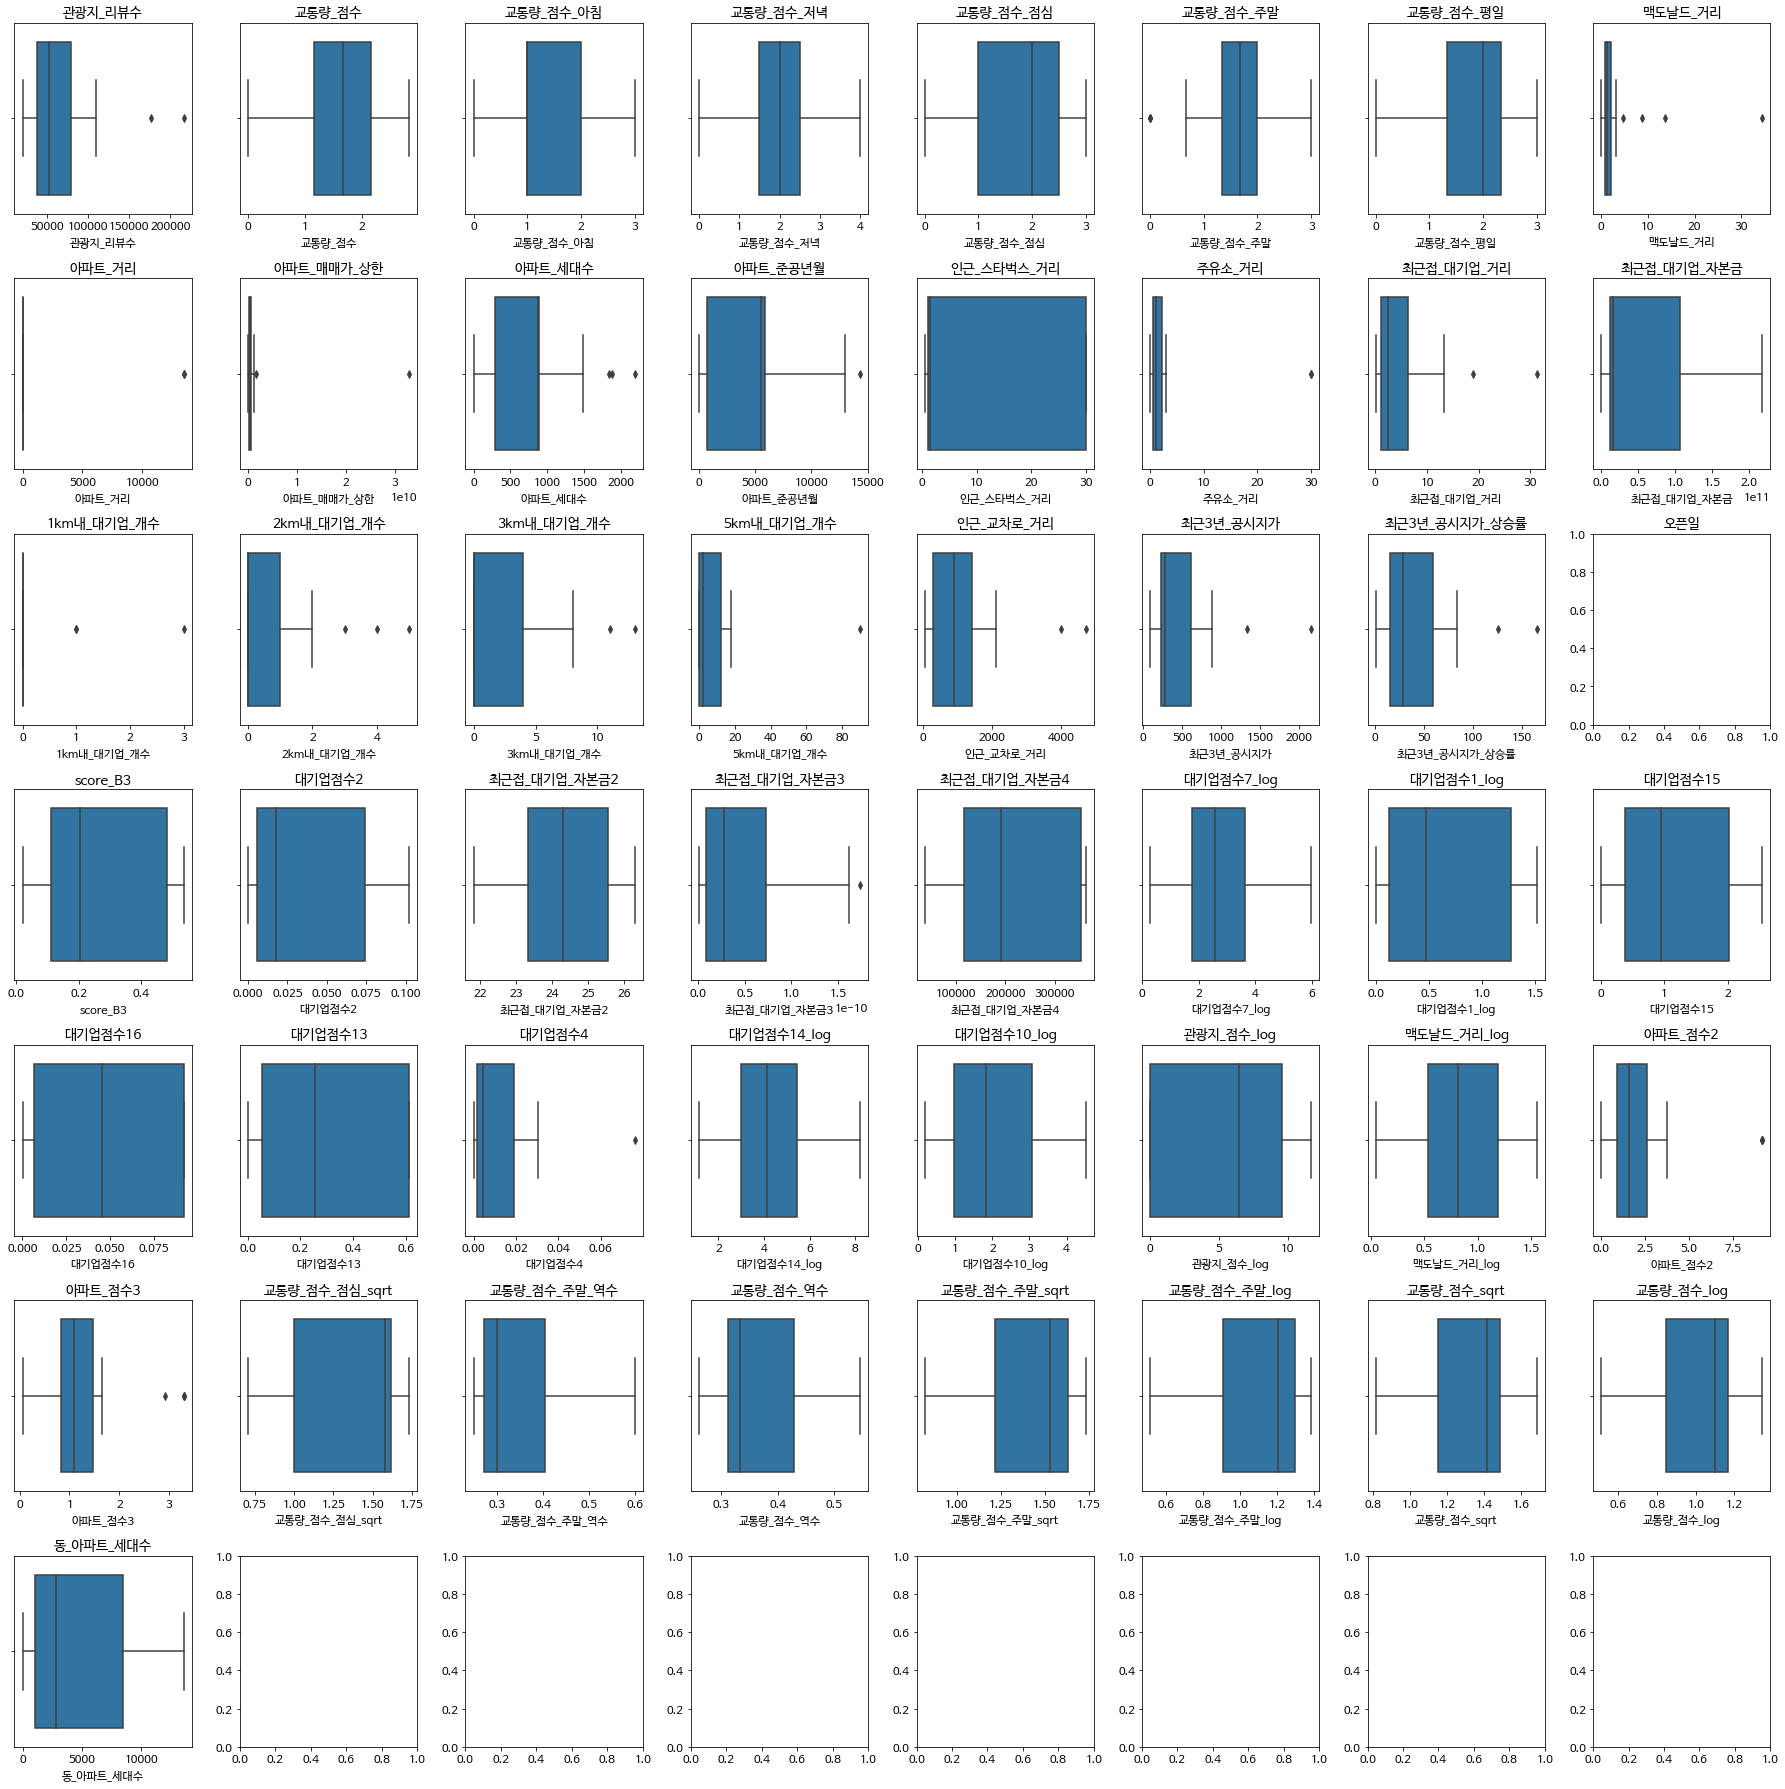

In [95]:
draw_all_features(feature_len, 8, each_feature_dfs.관광[feature_cols])

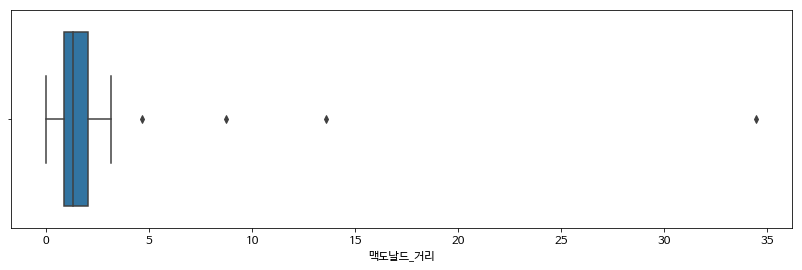

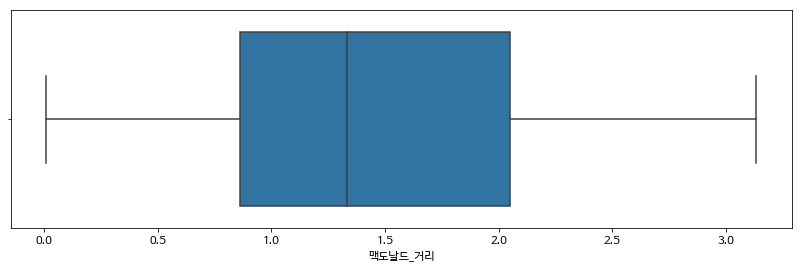

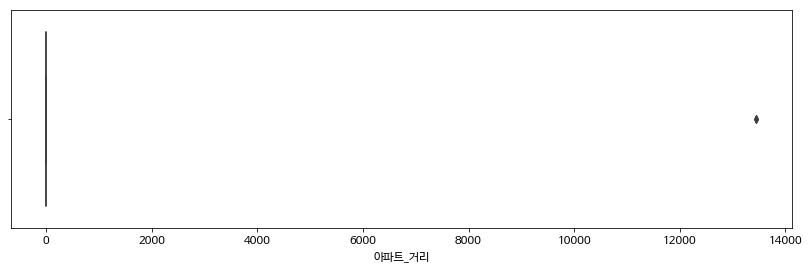

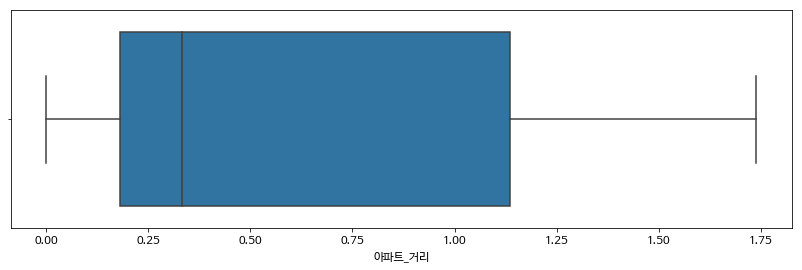

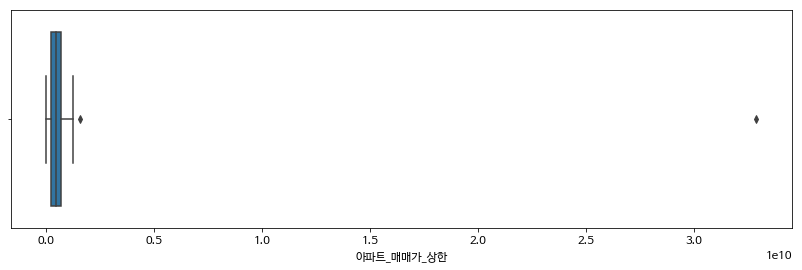

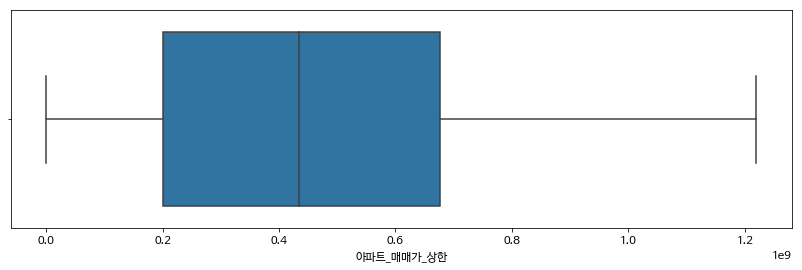

In [96]:
each_feature_dfs.관광 = check_box_plot(each_feature_dfs.관광, each_feature_dfs.관광, '맥도날드_거리')
each_feature_dfs.관광 = check_box_plot(each_feature_dfs.관광, each_feature_dfs.관광, '아파트_거리')
each_feature_dfs.관광 = check_box_plot(each_feature_dfs.관광, each_feature_dfs.관광, '아파트_매매가_상한')

num_rows, num_cols : 8, 7


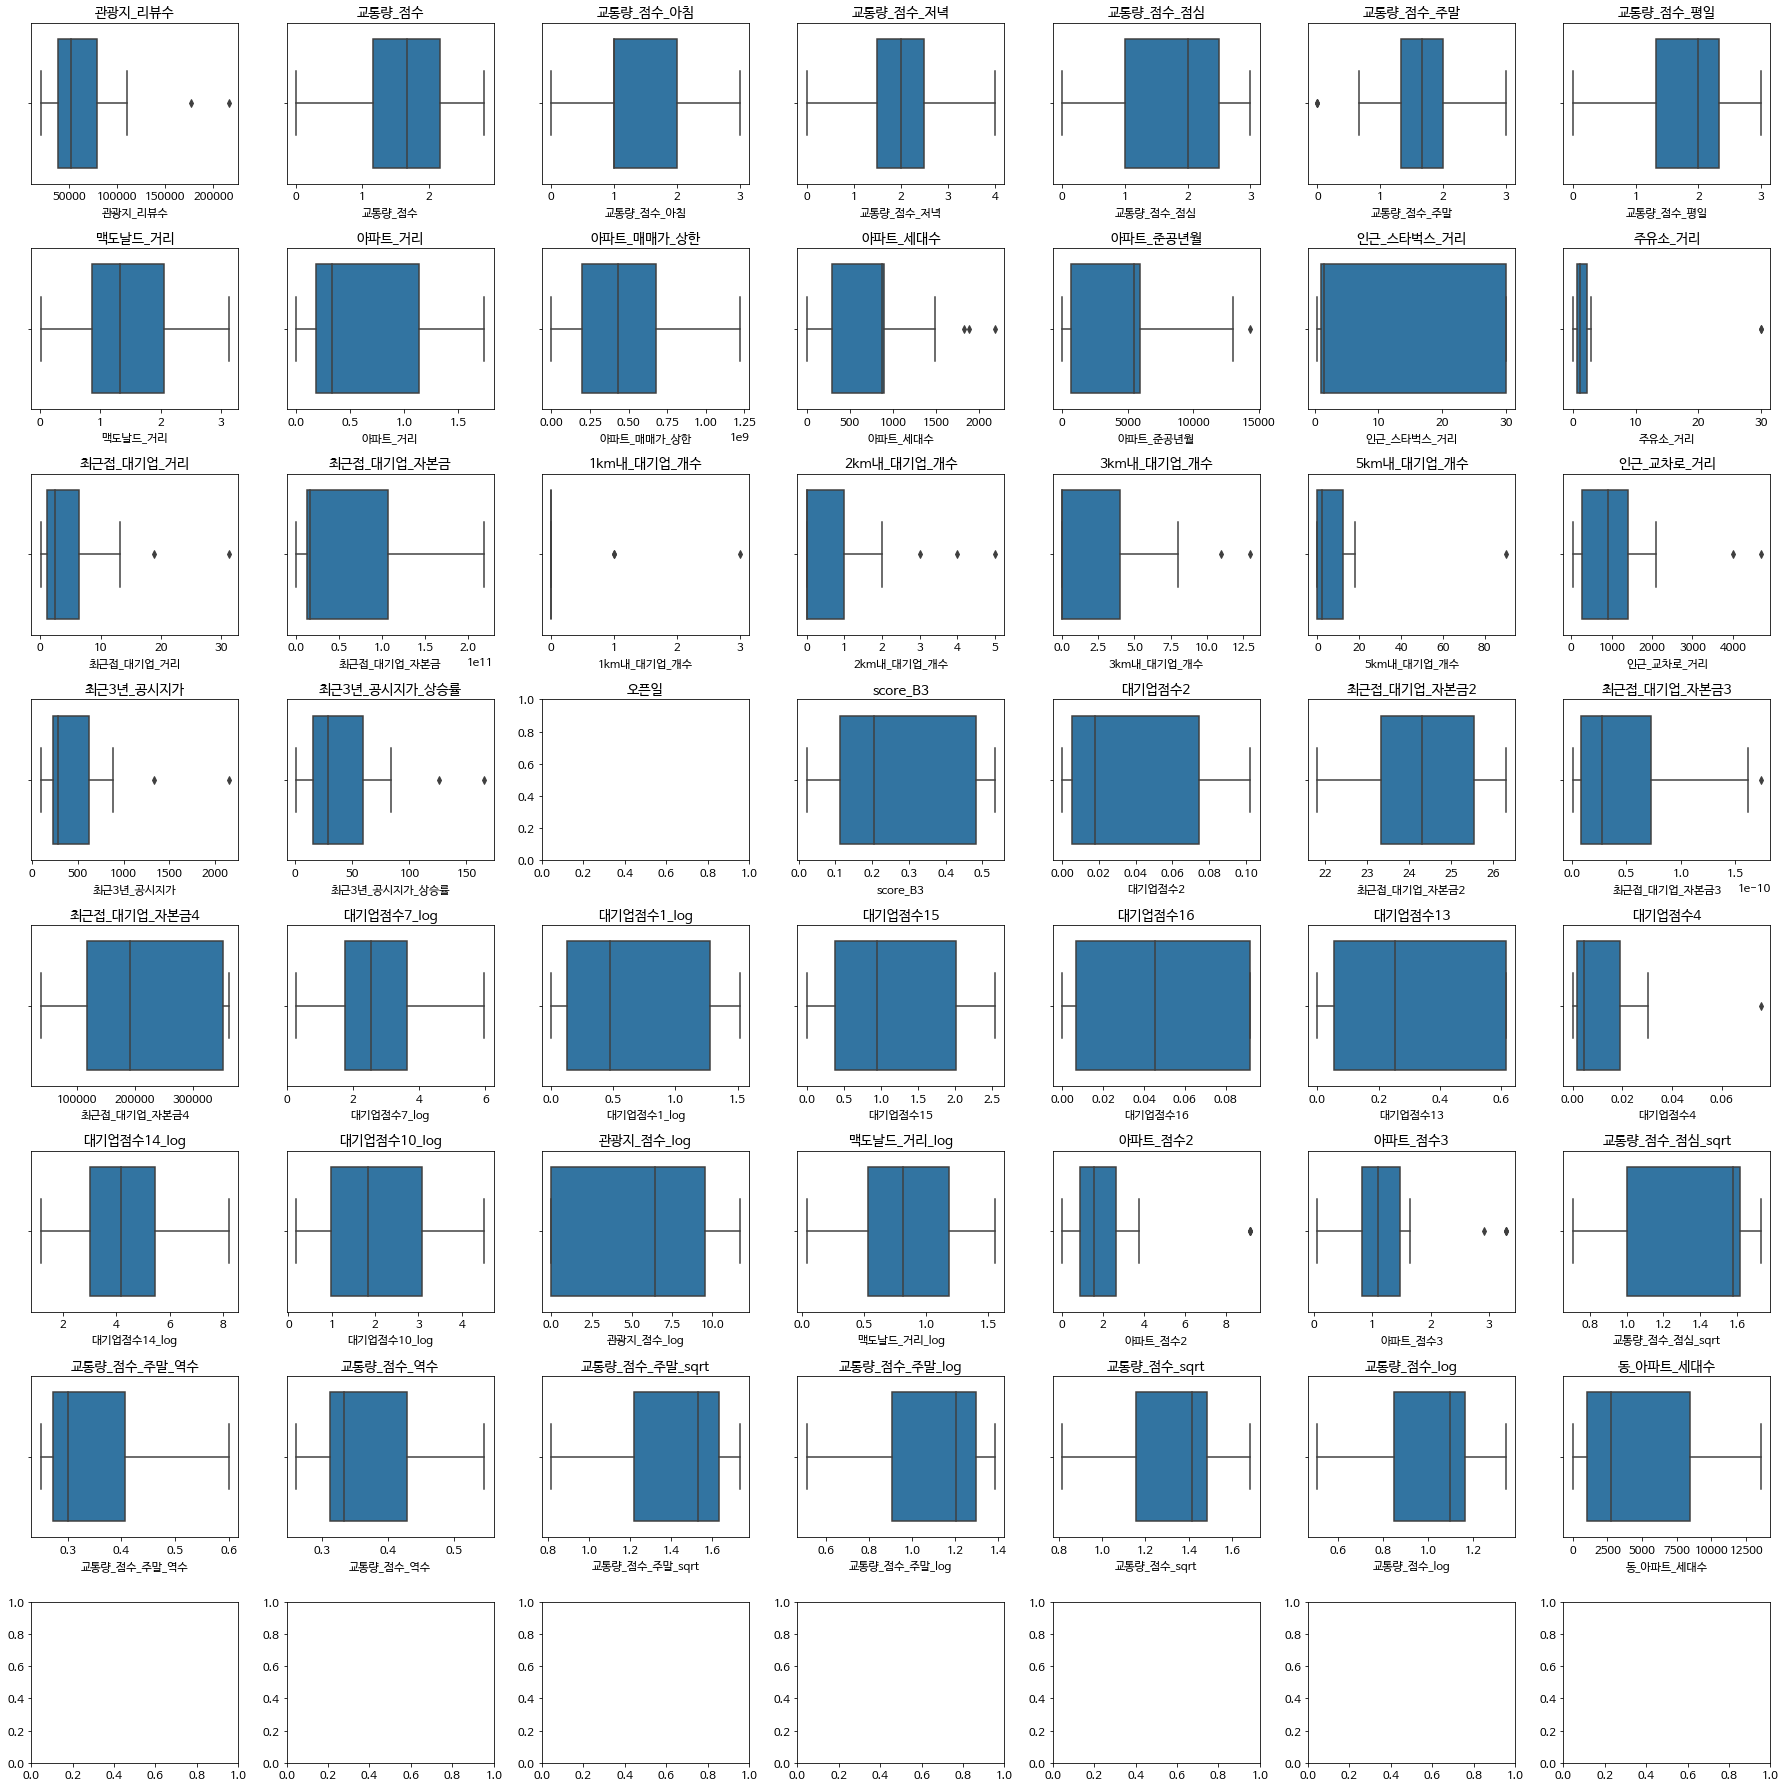

In [97]:
draw_all_features(feature_len, 7, each_feature_dfs.관광[feature_cols])

In [121]:
each_feature_dfs.관광.drop(['지점명','오픈일'], axis=1).loc[:, condition_mask]

관광지_거리  관광지_리뷰수  교통량_점수_아침  교통량_점수_저녁   맥도날드_거리    아파트_거리    아파트_매매가_상한  \
0   2.146935    53753        1.0        2.0  0.944571  0.000072  0.000000e+00   
1   0.378324   216315        1.0        1.0  1.330699  1.739006  6.758046e+08   
2   1.929562    52989        1.0        1.5  0.939125  1.739006  6.758046e+08   
3   2.179587    61351        1.0        2.0  1.703612  1.435135  4.150000e+08   
4   0.649568    65653        3.0        2.5  3.134450  0.271275  1.220000e+09   
5   1.963295    38654        2.0        2.5  0.008311  0.000057  6.730418e-03   
6   1.098382    64700        2.0        2.0  0.497919  1.136467  3.400000e+08   
7   0.106738    45547        2.5        2.5  1.969391  0.349419  2.600000e+08   
8   0.995539    50208        1.5        2.0  1.001267  0.146233  1.000000e+08   
9   0.326725    89180        2.0        2.0  1.678761  0.274882  1.220000e+09   
10  1.235527   176960        2.0        2.0  0.853624  0.919034  6.758046e+08   
11  0.510683   106386        0.0        0.0  0.092128  0.168835  1.050000e+08   
12  3.121822    27119        2.0        4.0  3.134450  1.251109  5.200000e+08   
13  0.307375    52199        1.0        1.5  1.131195  0.169291  2.600000e+08   
14  1.519889    38639        1.0        2.5  0.860338  0.328012  4.500000e+08   
15  0.225017    50029        1.0        3.0  0.038866  0.310061  1.125000e+08   
16  0.503173    36357        0.0        1.5  3.134450  0.181645  4.350000e+08   
17  1.720308    38639        1.5        3.0  1.618621  0.332261  4.900000e+08   
18  1.578392    45084        1.0        2.0  3.134450  0.695508  6.758046e+08   
19  1.593031    26169        1.0        1.0  3.134450  0.472123  6.758046e+08   
20  1.998110    20570        0.5        1.0  0.176931  0.000031  1.732237e-02   
21  2.638941    90099        1.5        1.5  2.050795  1.739006  6.758046e+08   
22  0.349134   110149        1.0        2.0  1.848109  1.271643  2.990000e+08   
23  0.830157    47739        1.0        1.0  2.296501  0.501892  2.000000e+08   
24  0.649213    78917        3.0        1.5  1.144530  0.226686  1.220000e+09   

        아파트_세대수      아파트_준공년월  인근_스타벅스_거리      ...         대기업점수15   대기업점수16  \
0      0.178500      0.884172       1.000      ...        0.540659  0.035325   
1    868.472081   5494.497462       0.684      ...        2.544297  0.092030   
2    868.472081   5494.497462      30.000      ...        0.222563  0.007915   
3   1878.000000   4727.000000       2.900      ...        1.133827  0.081477   
4    854.000000    678.000000       0.809      ...        0.001746  0.000006   
5      0.319632      0.557945       1.000      ...        2.544297  0.092030   
6   2181.000000   9809.000000       2.200      ...        0.097854  0.001582   
7    204.000000   8410.000000       0.432      ...        0.150357  0.003538   
8     41.000000  14345.000000       1.500      ...        2.025093  0.092030   
9   1411.000000   4118.000000       1.300      ...        0.948318  0.012225   
10   868.472081   5494.497462       1.300      ...        0.761952  0.016795   
11   150.000000  13035.000000      30.000      ...        2.008938  0.061486   
12  1488.000000   8045.000000       5.900      ...        0.437850  0.003674   
13   536.000000   2201.000000       2.800      ...        0.942924  0.092030   
14   750.000000    890.000000       1.400      ...        2.544297  0.092030   
15  1030.000000   9141.000000       4.000      ...        2.009436  0.092030   
16   582.000000    466.000000      30.000      ...        0.176810  0.002279   
17  1828.000000   5914.000000       1.400      ...        0.681583  0.009893   
18   868.472081   5494.497462      30.000      ...        1.346494  0.055171   
19   868.472081   5494.497462      30.000      ...        2.544297  0.092030   
20     0.007761      0.316876       1.000      ...             NaN       NaN   
21   868.472081   5494.497462      30.000      ...             NaN       NaN   
22   290.000000   1347.000000       0.672      ...         

In [122]:
each_feature_dfs.관광

지점명    관광지_거리  관광지_리뷰수    교통량_점수  교통량_점수_아침  교통량_점수_저녁  교통량_점수_점심  \
0       강릉송정DT  2.146935    53753  1.333333        1.0        2.0        1.0   
1      경주보문로DT  0.378324   216315  0.666667        1.0        1.0        0.0   
2     경주보문호수DT  1.929562    52989  1.500000        1.0        1.5        2.0   
3      구미금오산DT  2.179587    61351  1.000000        1.0        2.0        0.0   
4         구의DT  0.649568    65653  2.666667        3.0        2.5        2.5   
5        기장역DT  1.963295    38654  2.500000        2.0        2.5        3.0   
6        다대포DT  1.098382    64700  2.166667        2.0        2.0        2.5   
7       대구공평DT  0.106738    45547  2.666667        2.5        2.5        3.0   
8       대구두류DT  0.995539    50208  2.000000        1.5        2.0        2.5   
9       대구상동DT  0.326725    89180  2.000000        2.0        2.0        2.0   
10       동부산DT  1.235527   176960  2.000000        2.0        2.0        2.0   
11        동해DT  0.510683   106386  0.000000        0.0        0.0        0.0   
12  리버사이드팔당DTR  3.121822    27119  2.833333        2.0        4.0        2.5   
13    마산해안대로DT  0.307375    52199  1.500000        1.0        1.5        2.0   
14      명지강변DT  1.519889    38639  2.000000        1.0        2.5        2.5   
15        속초DT  0.225017    50029  2.166667        1.0        3.0        2.5   
16    울산정자비치DT  0.503173    36357  0.833333        0.0        1.5        1.0   
17     을숙도강변DT  1.720308    38639  2.166667        1.5        3.0        2.0   
18      제주성산DT  1.578392    45084  1.666667        1.0        2.0        2.0   
19      제주애월DT  1.593031    26169  0.666667        1.0        1.0        0.0   
20      제주외도DT  1.998110    20570  1.166667        0.5        1.0        2.0   
21      제주용담DT  2.638941    90099  1.666667        1.5        1.5        2.0   
22      제주중문DT  0.349134   110149  1.333333        1.0        2.0        1.0   
23      충주호암DT  0.830157    47739  0.666667        1.0        1.0        0.0   
24    해운대달맞이DT  0.649213    78917  2.333333        3.0        1.5        2.5   

    교통량_점수_주말  교통량_점수_평일   맥도날드_거리    ...       아파트_점수2   아파트_점수3  \
0    1.333333   1.333333  0.944571    ...      9.193436  3.292118   
1    0.000000   1.333333  1.330699    ...      9.193436  3.292118   
2    1.666667   1.333333  0.939125    ...      0.903454  0.837995   
3    0.666667   1.333333  1.703612    ...      1.697549  1.320014   
4    2.333333   3.000000  3.134450    ...      1.421104  1.110344   
5    2.666667   2.333333  0.008311    ...      0.843666  1.067138   
6    2.000000   2.333333  0.497919    ...      9.193436  2.914123   
7    2.333333   3.000000  1.969391    ...      1.046133  0.949018   
8    1.666667   2.333333  1.001267    ...      1.609055  0.781220   
9    2.000000   2.000000  1.678761    ...      0.291640  0.855584   
10   2.000000   2.000000  0.853624    ...      0.252765  0.648700   
11   0.000000   0.000000  0.092128    ...      0.047324  0.352946   
12   3.000000   2.666667  3.134450    ...      1.584900  0.768650   
13   1.333333   1.666667  1.131195    ...      9.193436  3.292118   
14   2.000000   2.000000  0.860338    ...      2.221121  1.650794   
15   1.666667   2.666667  0.038866    ...      3.770780  1.422108   
16   1.666667   0.000000  3.134450    ...      1.636240  1.139490   
17   2.000000   2.333333  1.618621    ...      0.000000  0.056654   
18   1.333333   2.000000  3.134450    ...      1.553278  1.167943   
19   0.000000   1.333333  3.134450    ...      0.937790  0.989247   
20   1.666667   0.666667  0.176931    ...           NaN       NaN   
21   2.000000   1.333333  2.050795    ...           NaN       NaN   
22   1.333333   1.333333  1.848109    ...           NaN       NaN   
23   1.333333   0.000000  2.296501    ...           NaN       NaN   
24   2.666667   2.000000  1.144530    ...           NaN       NaN   

    교통량_점수_점심_sqrt  교통량_점수_주말_역수  교통량_점수_역수  교통량_점수_주말_sqrt  교통량_점수_주말_log  \
0         1.581139      0.272727   0.260870        1.6329

In [120]:
each_feature_dfs.관광.drop(['지점명','오픈일'], axis=1).columns

Index(['관광지_거리', '관광지_리뷰수', '교통량_점수', '교통량_점수_아침', '교통량_점수_저녁', '교통량_점수_점심',
       '교통량_점수_주말', '교통량_점수_평일', '맥도날드_거리', '아파트_거리', '아파트_매매가_상한', '아파트_세대수',
       '아파트_준공년월', '인근_스타벅스_거리', '주유소_거리', '1년_영수증_개수', '6개월_영수증_개수',
       '3개월_영수증_개수', '2개월_영수증_개수', '1개월_영수증_개수', '1년_점수', '6개월_점수', '3개월_점수',
       '2개월_점수', '1개월_점수', '최근접_대기업_거리', '최근접_대기업_자본금', '1km내_대기업_개수',
       '2km내_대기업_개수', '3km내_대기업_개수', '5km내_대기업_개수', '인근_교차로_거리', '최근3년_공시지가',
       '최근3년_공시지가_상승률', '리뷰점수', 'DT지수', 'score_A1', 'score_A2', 'score_A3',
       'score_B1', 'score_B2', 'score_B3', '대기업점수2', '최근접_대기업_자본금2',
       '최근접_대기업_자본금3', '최근접_대기업_자본금4', '대기업점수7_log', '대기업점수1_log', '대기업점수15',
       '대기업점수16', '대기업점수13', '대기업점수4', '대기업점수14_log', '대기업점수10_log',
       '관광지_점수_log', '맥도날드_거리_log', '아파트_점수2', '아파트_점수3', '교통량_점수_점심_sqrt',
       '교통량_점수_주말_역수', '교통량_점수_역수', '교통량_점수_주말_sqrt', '교통량_점수_주말_log',
       '교통량_점수_sqrt', '교통량_점수_log', '동_아파트_세대수'],
      dtype='object')

In [116]:
condition_mask.shape

(66,)

In [112]:
each_feature_dfs.관광.corr().loc[condition_mask, condition_mask]

관광지_거리   관광지_리뷰수  교통량_점수_아침  교통량_점수_저녁   맥도날드_거리    아파트_거리  \
관광지_거리          1.000000 -0.326995  -0.028181   0.275496  0.098418  0.299612   
관광지_리뷰수        -0.326995  1.000000   0.059262  -0.304887 -0.172488  0.454533   
교통량_점수_아침      -0.028181  0.059262   1.000000   0.486772  0.119337 -0.008181   
교통량_점수_저녁       0.275496 -0.304887   0.486772   1.000000  0.166120  0.009193   
맥도날드_거리         0.098418 -0.172488   0.119337   0.166120  1.000000  0.183623   
아파트_거리          0.299612  0.454533  -0.008181   0.009193  0.183623  1.000000   
아파트_매매가_상한     -0.107633  0.276837   0.535098   0.053345  0.468059  0.242020   
아파트_세대수         0.173243  0.026084   0.237541   0.335333  0.230409  0.448641   
아파트_준공년월       -0.072055  0.123929  -0.039044   0.042549 -0.158467  0.189410   
인근_스타벅스_거리      0.143344 -0.158446  -0.492877  -0.491552  0.377051  0.190058   
주유소_거리          0.008031  0.125196  -0.335763  -0.433236 -0.240104  0.237684   
1년_영수증_개수       0.301199 -0.311759   0.098097   0.471641  0.625090  0.201783   
6개월_영수증_개수      0.321302 -0.353594   0.039820   0.476277  0.563506  0.126395   
3개월_영수증_개수      0.230205 -0.307288  -0.050389   0.383576  0.510385  0.052289   
2개월_영수증_개수      0.184789 -0.301311  -0.133584   0.260049  0.464946  0.022586   
1개월_영수증_개수      0.051423 -0.171531  -0.148844   0.080793  0.473034  0.054327   
3개월_점수         -0.314913  0.148163   0.166006  -0.425869 -0.088211 -0.185832   
1개월_점수         -0.063898  0.079392  -0.006377  -0.409923 -0.217861  0.005014   
최근접_대기업_거리     -0.154628  0.098213  -0.429682  -0.212376  0.191698  0.053892   
최근접_대기업_자본금    -0.068202  0.530062  -0.083619  -0.394281 -0.098626  0.544416   
2km내_대기업_개수    -0.329566 -0.127216   0.448906   0.144338 -0.005070 -0.126504   
최근3년_공시지가      -0.408926  0.105441   0.789301   0.355830  0.230814 -0.270188   
최근3년_공시지가_상승률  -0.264324  0.546689   0.732483   0.225364 -0.042426 -0.160794   
리뷰점수           -0.134235  0.019544  -0.299209  -0.394566 -0.051734 -0.132028   
DT지수           -0.252885 -0.001049   0.140661  -0.207680  0.136060 -0.169947   
score_A1        0.083596 -0.215150  -0.231465   0.028423  0.344847 -0.046883   
score_A2        0.395395 -0.424201  -0.229772   0.186132  0.195811 -0.257719   
score_A3        0.181921 -0.287171  -0.131076   0.255661  0.471620  0.013122   
score_B1       -0.096726 -0.182293  -0.240105  -0.159145  0.254016 -0.122374   
score_B2        0.058682 -0.300406  -0.163965   0.107920  0.400942 -0.080600   
score_B3       -0.061617 -0.230742  -0.224228  -0.083461  0.302413 -0.124522   
대기업점수2         -0.048374  0.257691  -0.228957  -0.106493 -0.152805 -0.026321   
최근접_대기업_자본금2   -0.112629  0.127707  -0.533847  -0.287809 -0.441479  0.066547   
최근접_대기업_자본금4   -0.106554  0.148069  -0.482562  -0.228280 -0.402925  0.084931   
대기업점수1_log     -0.167635  0.281758  -0.361315  -0.227313 -0.213899 -0.024518   
대기업점수15        -0.044167  0.169254  -0.347846  -0.276949 -0.332375 -0.133270   
대기업점수16        -0.064053  0.058945  -0.399376  -0.274097 -0.348902 -0.130688   
대기업점수13        -0.075896  0.108993  -0.368989  -0.255874 -0.366377 -0.148657   
대기업점수4         -0.047333  0.072169  -0.233616   0.027627 -0.213224 -0.070736   
관광지_점수_log     -0.005510 -0.374154  -0.296333  -0.037031 -0.078068 -0.388640   
맥도날드_거리_log    -0.229119 -0.062636  -0.110319   0.189160 -0.000532 -0.299631   
교통량_점수_점심_sqrt  0.085545  0.255609   0.118355  -0.048210 -0.266867  0.150695   
교통량_점수_주말_역수   -0.157409 -0.323997   0.011167  -0.021192  0.403831 -0.264157   
교통량_점수_주말_sqrt  0.146646  0.312753  -0.006683   0.025090 -0.406320  0.259938   
교통량_점수_주말_log   0.150209  0.315335  -0.006203   0.025316 -0.407126  0.261702   

                아파트_매매가_상한   아파트_세대수  아파트_준공년월  인근_스타벅스_거리      ...        \
관광지_거리           -0.107633  0.173243 -0.072055    0.143344      ...         
관광지_리뷰수           0.276837  0.026084  0.123929   -0.158446      ...         
교통량_점수_아침         0.535098  0.237541 -0.039044   -0.492877      ...         
교통량_점수_저녁         0.053345  0

In [111]:
condition_mask = each_feature_dfs.관광.corr()['score_A2'].map(lambda x:abs(x) > 0.15)

In [103]:
each_feature_dfs.관광.corr()[each_feature_dfs.관광.corr()['score_A2'].map(lambda x: abs(x) > 0.15)]

관광지_거리   관광지_리뷰수    교통량_점수  교통량_점수_아침  교통량_점수_저녁  교통량_점수_점심  \
관광지_거리          1.000000 -0.326995  0.122385  -0.028181   0.275496   0.068011   
관광지_리뷰수        -0.326995  1.000000 -0.230523   0.059262  -0.304887  -0.305849   
교통량_점수_아침      -0.028181  0.059262  0.809745   1.000000   0.486772   0.612498   
교통량_점수_저녁       0.275496 -0.304887  0.826526   0.486772   1.000000   0.631345   
맥도날드_거리         0.098418 -0.172488  0.016185   0.119337   0.166120  -0.190940   
아파트_거리          0.299612  0.454533 -0.101511  -0.008181   0.009193  -0.224108   
아파트_매매가_상한     -0.107633  0.276837  0.252746   0.535098   0.053345   0.098496   
아파트_세대수         0.173243  0.026084  0.197403   0.237541   0.335333  -0.020949   
아파트_준공년월       -0.072055  0.123929  0.024595  -0.039044   0.042549   0.049829   
인근_스타벅스_거리      0.143344 -0.158446 -0.551662  -0.492877  -0.491552  -0.433680   
주유소_거리          0.008031  0.125196 -0.395183  -0.335763  -0.433236  -0.258499   
1년_영수증_개수       0.301199 -0.311759  0.261292   0.098097   0.471641   0.117045   
6개월_영수증_개수      0.321302 -0.353594  0.222231   0.039820   0.476277   0.072535   
3개월_영수증_개수      0.230205 -0.307288  0.124366  -0.050389   0.383576   0.002187   
2개월_영수증_개수      0.184789 -0.301311  0.025122  -0.133584   0.260049  -0.051698   
1개월_영수증_개수      0.051423 -0.171531 -0.105646  -0.148844   0.080793  -0.182320   
3개월_점수         -0.314913  0.148163 -0.136339   0.166006  -0.425869  -0.083688   
1개월_점수         -0.063898  0.079392 -0.198979  -0.006377  -0.409923  -0.100929   
최근접_대기업_거리     -0.154628  0.098213 -0.351589  -0.429682  -0.212376  -0.268610   
최근접_대기업_자본금    -0.068202  0.530062 -0.292099  -0.083619  -0.394281  -0.258430   
2km내_대기업_개수    -0.329566 -0.127216  0.370341   0.448906   0.144338   0.349927   
최근3년_공시지가      -0.408926  0.105441  0.652328   0.789301   0.355830   0.510072   
최근3년_공시지가_상승률  -0.264324  0.546689  0.581259   0.732483   0.225364   0.498099   
리뷰점수           -0.134235  0.019544 -0.365289  -0.299209  -0.394566  -0.252333   
DT지수           -0.252885 -0.001049 -0.058951   0.140661  -0.207680  -0.070409   
score_A1        0.083596 -0.215150 -0.144767  -0.231465   0.028423  -0.162075   
score_A2        0.395395 -0.424201 -0.031117  -0.229772   0.186132  -0.041159   
score_A3        0.181921 -0.287171  0.016973  -0.131076   0.255661  -0.067996   
score_B1       -0.096726 -0.182293 -0.240531  -0.240105  -0.159145  -0.214197   
score_B2        0.058682 -0.300406 -0.055320  -0.163965   0.107920  -0.081995   
score_B3       -0.061617 -0.230742 -0.189728  -0.224228  -0.083461  -0.176024   
대기업점수2         -0.048374  0.257691 -0.160809  -0.228957  -0.106493  -0.104131   
최근접_대기업_자본금2   -0.112629  0.127707 -0.396002  -0.533847  -0.287809  -0.257405   
최근접_대기업_자본금4   -0.106554  0.148069 -0.360395  -0.482562  -0.228280  -0.264389   
대기업점수1_log     -0.167635  0.281758 -0.287256  -0.361315  -0.227313  -0.190508   
대기업점수15        -0.044167  0.169254 -0.338083  -0.347846  -0.276949  -0.273344   
대기업점수16        -0.064053  0.058945 -0.357016  -0.399376  -0.274097  -0.280220   
대기업점수13        -0.075896  0.108993 -0.324891  -0.368989  -0.255874  -0.245622   
대기업점수4         -0.047333  0.072169 -0.043268  -0.233616   0.027627   0.052043   
관광지_점수_log     -0.005510 -0.374154 -0.126017  -0.296333  -0.037031  -0.033915   
맥도날드_거리_log    -0.229119 -0.062636  0.020437  -0.110319   0.189160  -0.028959   
교통량_점수_점심_sqrt  0.085545  0.255609  0.100392   0.118355  -0.048210   0.177542   
교통량_점수_주말_역수   -0.157409 -0.323997 -0.051560   0.011167  -0.021192  -0.106213   
교통량_점수_주말_sqrt  0.146646  0.312753  0.059769  -0.006683   0.025090   0.118091   
교통량_점수_주말_log   0.150209  0.315335  0.059332  -0.006203   0.025316   0.116574   

                교통량_점수_주말  교통량_점수_평일   맥도날드_거리    아파트_거리    ...       아파트_점수2  \
관광지_거리           0.205710   0.020200  0.098418  0.299612    ...     -0.149221   
관광지_리뷰수         -0.325759  -0.094755 -0.172488  0.454533    ...      0.234136   
교통량_점수_아침        0.673882   0.765061  0.119337 -

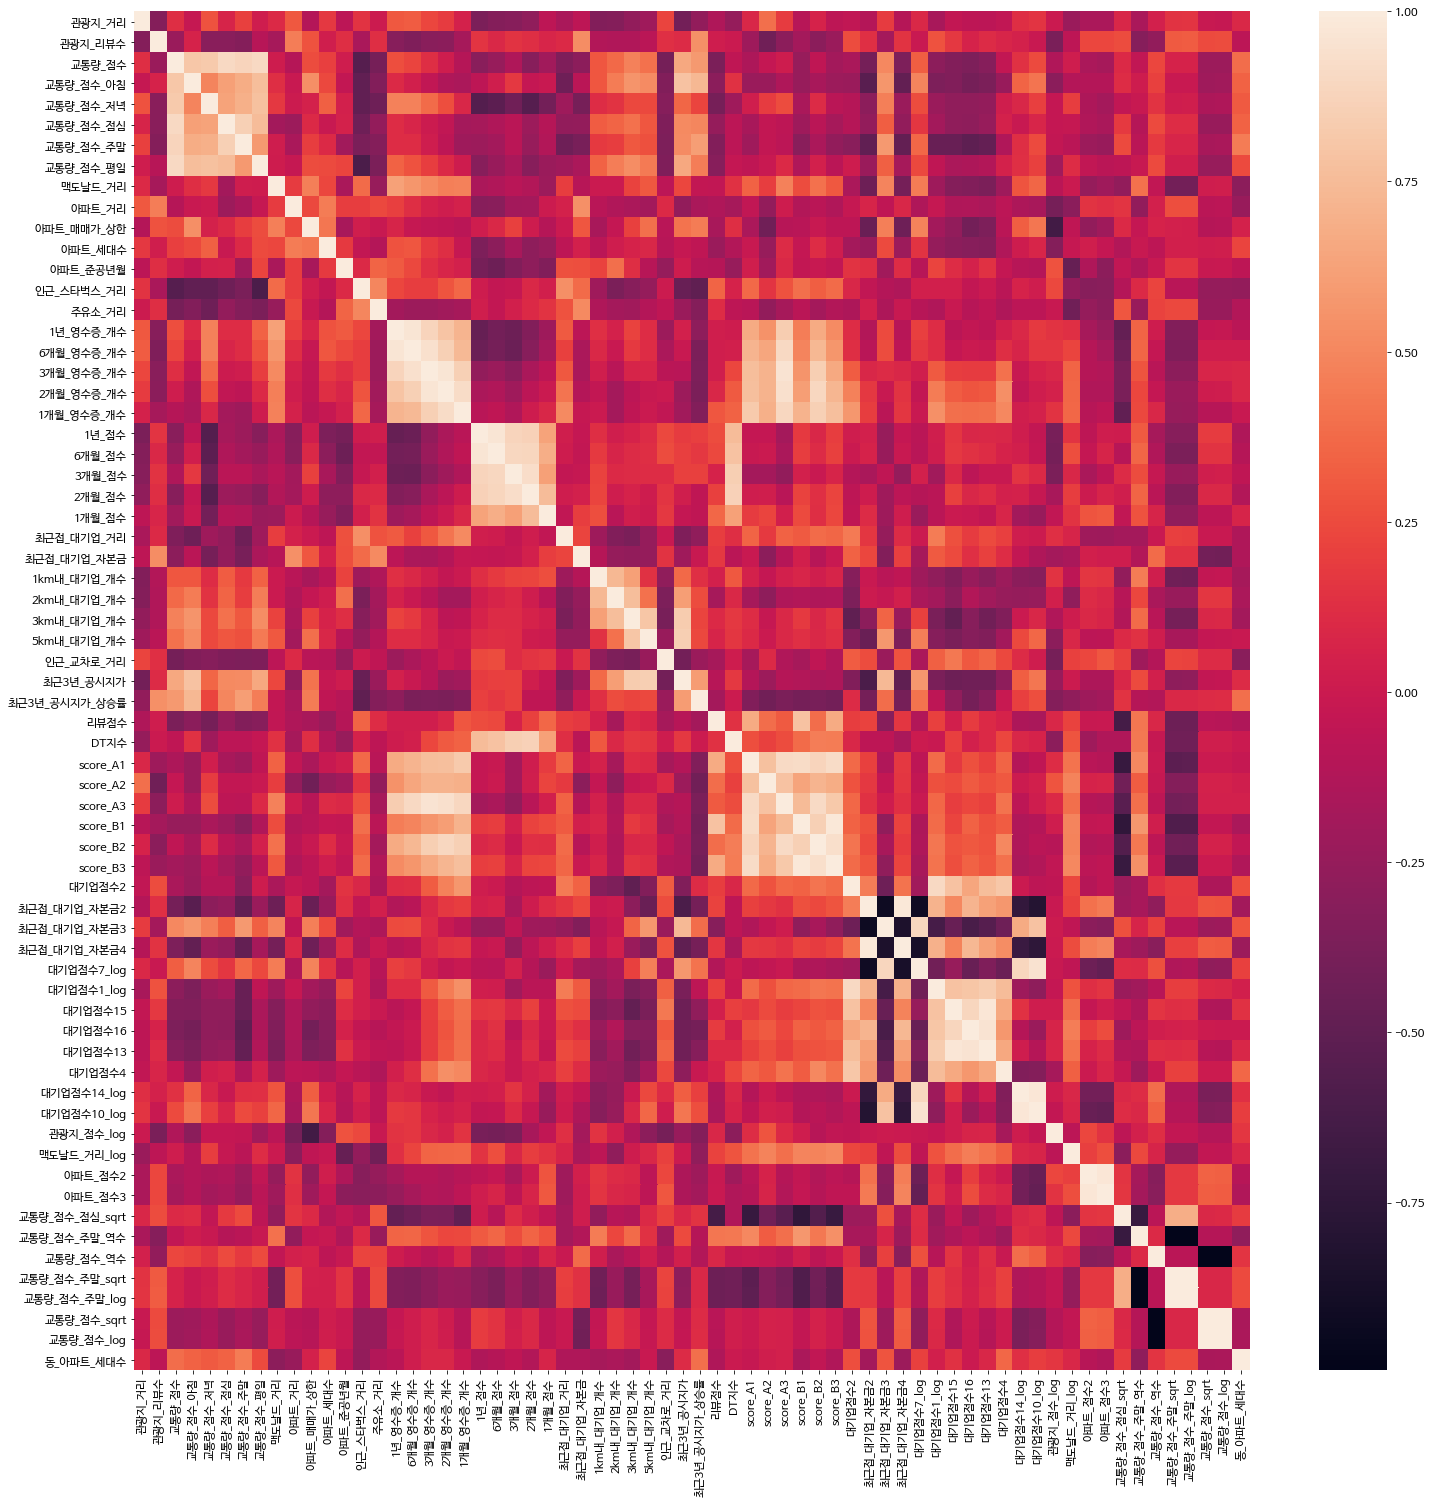

In [98]:
plt.figure(figsize=(25,25))
sns.heatmap(each_feature_dfs.관광.corr())

In [554]:
df = starbucks_df.copy()
feature_names = starbucks_df.drop('지점명', axis=1).columns
df = df.rename(columns={x:'_'.join(x.split(' ')) for x in feature_names.values})
df = df.rename(columns={'5km내_대기업_개수':'대기업개수'})
feature_names = df.drop(['지점명', 'score_A2', 'class3', 'class5', 'class10'], axis=1).columns
feature_names

Index(['맥도날드_거리', '관광지_리뷰수', '관광지_거리', '아파트_준공년월', '아파트_세대수', '아파트_거리',
       '아파트_매매가_상한', '주유소_거리', '인근_스타벅스_거리', '교통량_점수', '최근접_대기업_거리',
       '최근접_대기업_자본금', '대기업개수'],
      dtype='object')

In [555]:
label_names = ['class3', 'class5', 'class10']

In [556]:
def normalization_train_test(df_train, df_test, method='standard', except_cols=['지점명']):
    if method=='standard':
        sc = StandardScaler()
    elif method=='minmax':
        sc = MinMaxScaler()

    df_train_sc = sc.fit_transform(df_train.drop(except_cols, axis=1))
    df_test_sc = sc.transform(df_test.drop(except_cols, axis=1))

    df_train_sc = pd.DataFrame(df_train_sc, columns=df_train.drop(except_cols, axis=1).columns, index=list(df_train.index.values))
    df_test_sc = pd.DataFrame(df_test_sc, columns=df_test.drop(except_cols, axis=1).columns, index=list(df_test.index.values))

    df_train_sc[except_cols] = df_train[except_cols]
    df_test_sc[except_cols] = df_test[except_cols]
    return df_train_sc, df_test_sc

In [557]:
from sklearn.model_selection import train_test_split

In [558]:
df_train, df_test = train_test_split(df, test_size=0.1, random_state=0)

In [559]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
x_train = df_train[feature_names]
y_train = df_train['class3']
x_test = df_test[feature_names]
y_test = df_test['class3']

In [560]:
qda = QDA()
qda.fit(x_train, y_train)
print(qda.predict(x_test))

lda = LDA()
lda.fit(x_train, y_train)
print(lda.predict(x_test))

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[3 1 1 1 3 3 3 2 1 1 1 2 1 3 3 1 3 2 3 3 1 1]


In [561]:
minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()
x_train_mm = minmax_scaler.fit_transform(x_train, y_train)
x_test_mm = minmax_scaler.transform(x_test)

In [562]:
x_train_std = std_scaler.fit_transform(x_train, y_train)
x_test_std = std_scaler.transform(x_test)

In [563]:
lr_std = LogisticRegression()
lr_std = lr_std.fit(x_train_std, y_train)
lr_mm = LogisticRegression()
lr_mm = lr_mm.fit(x_train_mm, y_train)

# standard scale Logistic regression

In [564]:
y_pred_lr_std=lr_std.predict(x_test_std) #예측한 분류값을 보고싶을 때
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_lr_std))

Accuracy: 0.27


# minmax scale Logistic regression

In [20]:
y_pred_lr_mm=lr_mm.predict(x_test_mm) #예측한 분류값을 보고싶을 때
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_lr_mm))

Accuracy: 0.23


# LDA

In [21]:
# minmax_scaler_y = MinMaxScaler()
# y_train_std = minmax_scaler_y.fit_transform(y_train.values.reshape((-1,1)))
# y_test_std = minmax_scaler_y.transform(y_test.values.reshape((-1,1)))

In [22]:
lda = LDA(n_components=2) # 2개의 에이겐 쌍을 선택
x_train_lda = lda.fit_transform(x_train, y_train) # 축소된 훈련, 테스트 데이터 생성
x_test_lda = lda.fit_transform(x_test, y_test)

In [23]:
from sklearn.linear_model import LogisticRegression # 로지스틱 분류로 성능 테스트
lr_lda = LogisticRegression()
lr_lda = lr_lda.fit(x_train_lda, y_train)

In [24]:
y_pred_lr_lda=lr_lda.predict(x_test_lda) #예측한 분류값을 보고싶을 때
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_lr_lda))

Accuracy: 0.45


## PCA

In [25]:
pca = PCA(n_components=2, random_state=0) # 2개의 에이겐 쌍을 선택
x_train_pca = pca.fit_transform(x_train_std, y_train)
x_test_pca = pca.transform(x_test_std) # 축소된 훈련, 테스트 데이터 생성

In [26]:
lr_pca = LogisticRegression()
lr_pca = lr_pca.fit(x_train_pca, y_train)

In [27]:
y_pred_lr_pca =lr_pca.predict(x_test_pca) #예측한 분류값을 보고싶을 때
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_lr_pca))

Accuracy: 0.23


# XGboost

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
from xgboost import XGBClassifier, XGBRFClassifier

In [30]:
xgb_clf = XGBClassifier()

In [32]:
xgb_clf.fit(x_train_lda, y_train)
y_pred_xgclf_lda =xgb_clf.predict(x_test_lda) #예측한 분류값을 보고싶을 때
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_xgclf_lda))

Accuracy: 0.50


In [34]:
xgb_clf.fit(x_train_pca, y_train)
y_pred_xgclf_pca =xgb_clf.predict(x_test_pca) #예측한 분류값을 보고싶을 때
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_xgclf_pca))

Accuracy: 0.45


In [40]:
xgb_clf.fit(x_train_std, y_train)
y_pred_xgclf_std = xgb_clf.predict(x_test_std) #예측한 분류값을 보고싶을 때
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_xgclf_std))

Accuracy: 0.41


In [41]:
xgbrf_clf = XGBRFClassifier()

In [43]:
xgbrf_clf.fit(x_train_std, y_train)
y_pred_xgbrf_clf_std =xgbrf_clf.predict(x_test_std) #예측한 분류값을 보고싶을 때
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_xgbrf_clf_std))

Accuracy: 0.32


In [45]:
xgbrf_clf.fit(x_train_lda, y_train)
y_pred_xgbrf_clf_pca =xgbrf_clf.predict(x_test_pca) #예측한 분류값을 보고싶을 때
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_xgbrf_clf_pca))

Accuracy: 0.36


In [46]:
xgbrf_clf.fit(x_train_lda, y_train)
y_pred_xgbrf_clf_lda =xgbrf_clf.predict(x_test_lda) #예측한 분류값을 보고싶을 때
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_xgbrf_clf_lda))

Accuracy: 0.50


In [47]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [383]:
#brute force scan for all parameters, here are the tricks
#usually max_depth is 6,7,8
#learning rate is around 0.05, but small changes may make big diff
#tuning min_child_weight subsample colsample_bytree can have 
#much fun of fighting against overfit 
#n_estimators is how many round of boosting
#finally, ensemble xgboost with multiple seeds may reduce variance
parameters = {'clf__nthread':[4], #when use hyperthread, xgboost may become slower
              'clf__objective':['binary:logistic'],
              'clf__learning_rate': [0.004, 0.003, 0.02, 0.05], #so called `eta` value
              'clf__max_depth': [5,6,7,8],
              'clf__min_child_weight': [11,30],
              'clf__subsample': [0.8, 0.9, 1.0, 1.1],
              'clf__colsample_bytree': [0.7],
              'clf__n_estimators': [5, 20, 17, 18, 19, 50], #number of trees, change it to 1000 for better results
              'clf__missing':[-999],
              'clf__seed': [1337]}

xgb_mm = Pipeline([('scaler', MinMaxScaler()), ('clf', xgb_clf)])
xgb_std = Pipeline([('scaler', StandardScaler()), ('clf', xgb_clf)])
xgbrf_mm = Pipeline([('scaler', MinMaxScaler()), ('clf', xgbrf_clf)])
xgbrf_std = Pipeline([('scaler', StandardScaler()), ('clf', xgbrf_clf)])
xgb_lda = Pipeline([('lda', LDA(n_components=2)), ('clf', xgb_clf)])
xgb_lda_std = Pipeline([('lda', LDA(n_components=2)), ('scaler', StandardScaler()), ('clf', xgb_clf)])
xgb_mm_clf = GridSearchCV(xgb_mm,
                          parameters, n_jobs=5, 
                          cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0), 
                          scoring='accuracy',
                          verbose=2, refit=True)
xgb_std_clf = GridSearchCV(xgb_std,
                          parameters, n_jobs=5, 
                          cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0), 
                          scoring='accuracy',
                          verbose=2, refit=True)
xgb_clf_no = GridSearchCV(xgb_clf,
                        parameters, n_jobs=5, 
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0), 
                        scoring='accuracy',
                        verbose=2, refit=True)
xgb_clf_lda = GridSearchCV(xgb_lda,
                        parameters, n_jobs=5, 
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0), 
                        scoring='accuracy',
                        verbose=2, refit=True)
xgb_clf_lda_std = GridSearchCV(xgb_lda_std,
                        parameters, n_jobs=5, 
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0), 
                        scoring='accuracy',
                        verbose=2, refit=True)
                        
xgbrf_std_clf = GridSearchCV(xgbrf_std,
                        parameters, n_jobs=5, 
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0), 
                        scoring='accuracy',
                        verbose=2, refit=True)
                        
xgbrf_mm_clf = GridSearchCV(xgbrf_mm,
                        parameters, n_jobs=5, 
                        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0), 
                        scoring='accuracy',
                        verbose=2, refit=True)

In [375]:
def fit_xgb(xgb_model, train_x, train_y):
    xgb_model.fit(train_x, train_y)
    #trust your CV!
    #print('score:', xgb_model.cv_results_['mean_test_score'])
    pprint(xgb_model.best_params_)
    pprint(f'best score : {xgb_model.best_score_}')

In [381]:
fit_xgb(xgbrf_std_clf, df[feature_names], df['class3'])

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 1942 tasks      | elapsed:    5.9s


[19:49:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


{'clf__colsample_bytree': 0.7,
 'clf__learning_rate': 0.004,
 'clf__max_depth': 5,
 'clf__min_child_weight': 30,
 'clf__missing': -999,
 'clf__n_estimators': 50,
 'clf__nthread': 4,
 'clf__objective': 'binary:logistic',
 'clf__seed': 1337,
 'clf__silent': 1,
 'clf__subsample': 1.0}
'best score : 0.4651162790697674'


[Parallel(n_jobs=5)]: Done 3840 out of 3840 | elapsed:   11.8s finished


In [382]:
fit_xgb(xgbrf_mm_clf, df[feature_names], df['class3'])

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 1942 tasks      | elapsed:    5.8s


[19:49:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


{'clf__colsample_bytree': 0.7,
 'clf__learning_rate': 0.004,
 'clf__max_depth': 5,
 'clf__min_child_weight': 30,
 'clf__missing': -999,
 'clf__n_estimators': 50,
 'clf__nthread': 4,
 'clf__objective': 'binary:logistic',
 'clf__seed': 1337,
 'clf__silent': 1,
 'clf__subsample': 1.0}
'best score : 0.4651162790697674'


[Parallel(n_jobs=5)]: Done 3840 out of 3840 | elapsed:   11.1s finished


In [384]:
fit_xgb(xgb_clf_lda, df[feature_names], df['class3'])

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 1942 tasks      | elapsed:    7.4s


{'clf__colsample_bytree': 0.7,
 'clf__learning_rate': 0.05,
 'clf__max_depth': 5,
 'clf__min_child_weight': 30,
 'clf__missing': -999,
 'clf__n_estimators': 17,
 'clf__nthread': 4,
 'clf__objective': 'binary:logistic',
 'clf__seed': 1337,
 'clf__subsample': 0.9}
'best score : 0.37087486157253596'


[Parallel(n_jobs=5)]: Done 3840 out of 3840 | elapsed:   15.0s finished


In [385]:
fit_xgb(xgb_clf_lda_std, df[feature_names], df['class3'])

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 1942 tasks      | elapsed:    7.8s


{'clf__colsample_bytree': 0.7,
 'clf__learning_rate': 0.05,
 'clf__max_depth': 5,
 'clf__min_child_weight': 30,
 'clf__missing': -999,
 'clf__n_estimators': 17,
 'clf__nthread': 4,
 'clf__objective': 'binary:logistic',
 'clf__seed': 1337,
 'clf__subsample': 0.9}
'best score : 0.37087486157253596'


[Parallel(n_jobs=5)]: Done 3840 out of 3840 | elapsed:   15.7s finished


In [386]:
fit_xgb(xgb_clf_no, df[feature_names], df['class3'])

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  52 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 294 tasks      | elapsed:    8.0s
[Parallel(n_jobs=5)]: Done 700 tasks      | elapsed:   20.6s
[Parallel(n_jobs=5)]: Done 1266 tasks      | elapsed:   40.6s
[Parallel(n_jobs=5)]: Done 1996 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 2886 tasks      | elapsed:  1.7min


[19:53:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { clf__colsample_bytree, clf__learning_rate, clf__max_depth, clf__min_child_weight, clf__missing, clf__n_estimators, clf__nthread, clf__objective, clf__seed, clf__subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


{'clf__colsample_bytree': 0.7,
 'clf__learning_rate': 0.004,
 'clf__max_depth': 5,
 'clf__min_child_weight': 11,
 'clf__missing': -999,
 'clf__n_estimators': 5,
 'clf__nthread': 4,
 'clf__objective': 'binary:logistic',
 'clf__seed': 1337,
 'clf__subsample': 0.8}
'best score : 0.375968992248062'


[Parallel(n_jobs=5)]: Done 3840 out of 3840 | elapsed:  2.2min finished


In [387]:
fit_xgb(xgb_mm_clf, df[feature_names], df['class3'])

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    5.3s
[Parallel(n_jobs=5)]: Done 2670 tasks      | elapsed:   13.9s


{'clf__colsample_bytree': 0.7,
 'clf__learning_rate': 0.05,
 'clf__max_depth': 5,
 'clf__min_child_weight': 30,
 'clf__missing': -999,
 'clf__n_estimators': 50,
 'clf__nthread': 4,
 'clf__objective': 'binary:logistic',
 'clf__seed': 1337,
 'clf__subsample': 1.0}
'best score : 0.46987818383167224'


[Parallel(n_jobs=5)]: Done 3831 out of 3840 | elapsed:   20.2s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 3840 out of 3840 | elapsed:   20.3s finished


In [388]:
fit_xgb(xgb_std_clf, df[feature_names], df['class3'])

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    6.0s
[Parallel(n_jobs=5)]: Done 2670 tasks      | elapsed:   15.1s


{'clf__colsample_bytree': 0.7,
 'clf__learning_rate': 0.05,
 'clf__max_depth': 5,
 'clf__min_child_weight': 30,
 'clf__missing': -999,
 'clf__n_estimators': 50,
 'clf__nthread': 4,
 'clf__objective': 'binary:logistic',
 'clf__seed': 1337,
 'clf__subsample': 1.0}
'best score : 0.46987818383167224'


[Parallel(n_jobs=5)]: Done 3831 out of 3840 | elapsed:   21.7s remaining:    0.1s
[Parallel(n_jobs=5)]: Done 3840 out of 3840 | elapsed:   21.8s finished


In [389]:
fit_xgb(xgb_std_clf, df[feature_names], df['class5'])

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    5.3s
[Parallel(n_jobs=5)]: Done 2670 tasks      | elapsed:   13.1s


{'clf__colsample_bytree': 0.7,
 'clf__learning_rate': 0.003,
 'clf__max_depth': 5,
 'clf__min_child_weight': 11,
 'clf__missing': -999,
 'clf__n_estimators': 50,
 'clf__nthread': 4,
 'clf__objective': 'binary:logistic',
 'clf__seed': 1337,
 'clf__subsample': 1.0}
'best score : 0.29557032115171655'


[Parallel(n_jobs=5)]: Done 3831 out of 3840 | elapsed:   19.3s remaining:    0.0s
[Parallel(n_jobs=5)]: Done 3840 out of 3840 | elapsed:   19.4s finished


In [390]:
fit_xgb(xgb_std_clf, df[feature_names], df['class10'])

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 1046 tasks      | elapsed:    8.2s
[Parallel(n_jobs=5)]: Done 2670 tasks      | elapsed:   21.5s
[Parallel(n_jobs=5)]: Done 3831 out of 3840 | elapsed:   31.8s remaining:    0.1s
[Parallel(n_jobs=5)]: Done 3840 out of 3840 | elapsed:   32.0s finished


{'clf__colsample_bytree': 0.7,
 'clf__learning_rate': 0.05,
 'clf__max_depth': 5,
 'clf__min_child_weight': 11,
 'clf__missing': -999,
 'clf__n_estimators': 18,
 'clf__nthread': 4,
 'clf__objective': 'binary:logistic',
 'clf__seed': 1337,
 'clf__subsample': 0.9}
'best score : 0.15968992248062014'


# Results
Show graphs and stats here

In [48]:
df

지점명    맥도날드_거리  관광지_리뷰수    관광지_거리      아파트_준공년월  \
0       스타벅스 영등포신길DT점   3.284522     2981  0.578471   1683.000000   
1        스타벅스 원주명륜DT점   1.056879      268  0.340500   4970.000000   
2       스타벅스 경주터미널DT점   0.162548        0  0.326158   5494.497462   
3         스타벅스 창원역DT점   0.165656     1725  1.577312    405.000000   
4          스타벅스 화곡DT점   2.077286        0  0.572333   6887.000000   
5        스타벅스 김포감정DT점   0.056433    18720  0.070225   2778.000000   
6        스타벅스 명지강변DT점   0.860338      379  1.519889    890.000000   
7        스타벅스 제주성산DT점  34.486777      386  0.000000   5494.497462   
8       스타벅스 을숙도강변DT점   1.618621      379  1.352507   5914.000000   
9        스타벅스 제주애월DT점  13.609995     1945  1.593031   5494.497462   
10       스타벅스 강동구청DT점   1.197120     6187  0.994486   6584.000000   
11         스타벅스 방화DT점   3.738341    23277  0.325010  10052.000000   
12   스타벅스 리버사이드팔당DTR점   3.134450        0  2.726833   8045.000000   
13       스타벅스 구미상모DT점   6.377537     2140  0.948050   1713.000000   
14   스타벅스 안양운동장사거리DT점   1.086299    20062  1.632523   9962.000000   
15       스타벅스 충주호암DT점   2.296501        0  0.830157    344.000000   
16     스타벅스 마산해안대로DT점   1.131195        0  0.307375   2201.000000   
17       스타벅스 제주용담DT점   2.050795     3418  0.851116   5494.497462   
18       스타벅스 수원망포DT점   1.197106    19403  1.555749   3631.000000   
19         스타벅스 공릉DT점   2.567223        0  0.239760   7741.000000   
20      스타벅스 인천서구청DT점   0.128919    20481  2.196912   8379.000000   
21        스타벅스 역곡역DT점   2.485987    28523  1.346247   3266.000000   
22       스타벅스 춘천석사DT점   0.774754      439  1.404319   6645.000000   
23       스타벅스 인천송도DT점   2.415508     1122  1.160342   3812.000000   
24       스타벅스 전남광양DT점  15.538136        0  5.105623   1500.000000   
25       스타벅스 전주효자DT점   0.073915        0  1.055994   2413.000000   
26      스타벅스 의정부신곡DT점   2.851879        0  2.292341   5494.497462   
27     스타벅스 북오산IC DT점   2.631968        0  0.509645    375.000000   
28        스타벅스 동명대DT점   1.088033    41927  0.579334  11148.000000   
29       스타벅스 인천동춘DT점   1.668632        0  0.519723    982.000000   
..                ...        ...      ...       ...           ...   
183        스타벅스 과천DT점   5.423097      294  0.364454  13493.000000   
184      스타벅스 이천증포DT점   2.585736     3232  2.164551   1439.000000   
185      스타벅스 당진시곡DT점   5.033109     2332  4.609146   8622.000000   
186      스타벅스 광주금호DT점   1.143453    17609  0.117079   3327.000000   
187      스타벅스 대구만촌DT점   0.049512        0  0.255050   5494.497462   
188      스타벅스 마산회원DT점   2.524550     2698  0.793056   2017.000000   
189      스타벅스 김천시청DT점   0.505588     1905  2.008445   8622.000000   
190      스타벅스 대구도원DT점   0.382213    15358  0.212222   2017.000000   
191    스타벅스 경주보문호수DT점   0.939125     8838  0.650093   5494.497462   
192      스타벅스 광주흑석DT점   1.371802    16808  0.853008   6280.000000   
193      스타벅스 광주산정DT점   0.885752    16808  1.224178   6188.000000   
194      스타벅스 대구중동DT점   0.182574     3454  0.844493  15197.000000   
195   스타벅스 대구수성도서관DT점   2.037841     2263  0.536679   6400.000000   
196      스타벅스 인천갈산DT점   0.107915    21507  0.865838   4727.000000   
197      스타벅스 용인상하DT점   1.556082     9170  1.865404   5273.000000   
198      스타벅스 충주시청DT점   1.199674     3138  2.010205    921.000000   
199    스타벅스 대구칠곡대로DT점   0.440944     2001  1.126716   4605.000000   
200        스타벅스 여주DT점  17.013875     4369  1.771745   7496.000000   
201      스타벅스 대구평리DT점   0.000000     1721  0.869421   7436.000000   
202      스타벅스 진주칠암DT점   0.084486        0  0.578556   7191.000000   
203      스타벅스 안성석정DT점  10.735775    19807  0.576178   4635.000000   
204      스타벅스 광주수완DT점   4.451412    16808  1.987825   4239.000000   
205      스타벅스 대구황금DT점   0.089395     2315  0.864914   3600.000000   
206   스타벅스 대구중동네거리DT점   0.639026     3454  0.247517   6400.000000   
207      스타벅스 대구월곡DT점   0.756697     3182  0.579752   9871.000000   
208    스타벅스 천안서부대로DT점   1.112797        0  1.886180   9748.000000   
209      스타벅스 인천

In [565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 18 columns):
지점명            213 non-null object
맥도날드_거리        213 non-null float64
관광지_리뷰수        213 non-null int64
관광지_거리         213 non-null float64
아파트_준공년월       213 non-null float64
아파트_세대수        213 non-null float64
아파트_거리         213 non-null float64
아파트_매매가_상한     213 non-null float64
주유소_거리         213 non-null float64
인근_스타벅스_거리     213 non-null float64
교통량_점수         213 non-null float64
최근접_대기업_거리     213 non-null float64
최근접_대기업_자본금    213 non-null int64
대기업개수          213 non-null int64
score_A2       213 non-null float64
class3         213 non-null int64
class5         213 non-null int64
class10        213 non-null int64
dtypes: float64(11), int64(6), object(1)
memory usage: 30.0+ KB


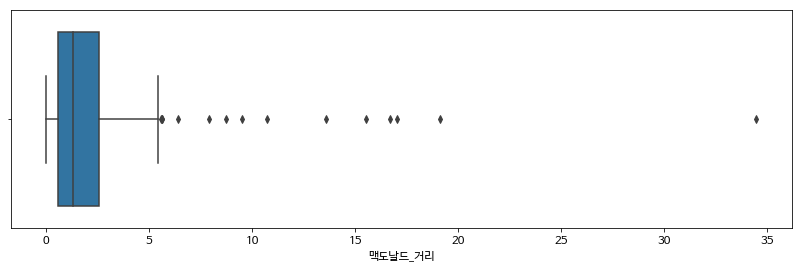

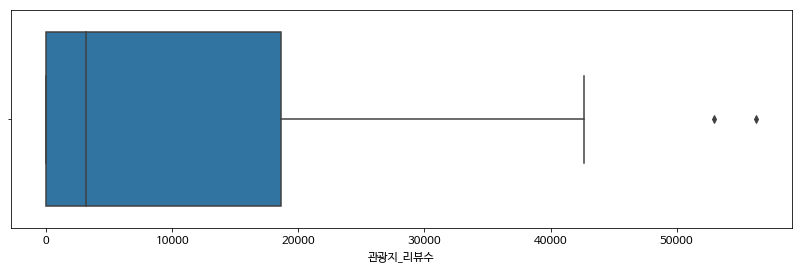

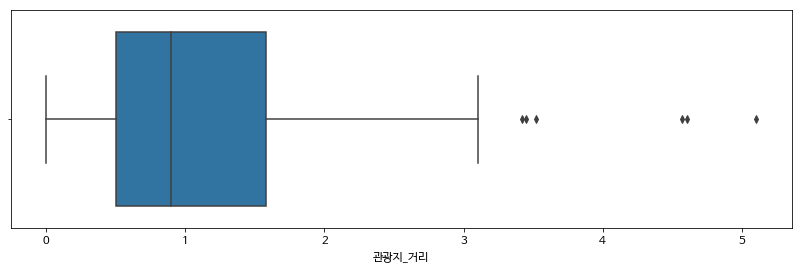

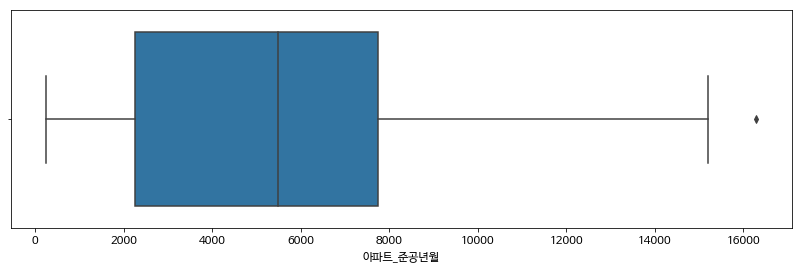

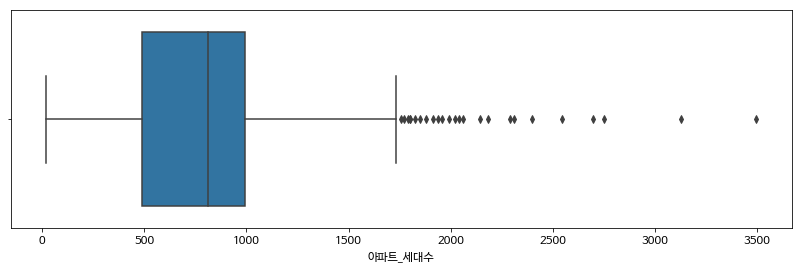

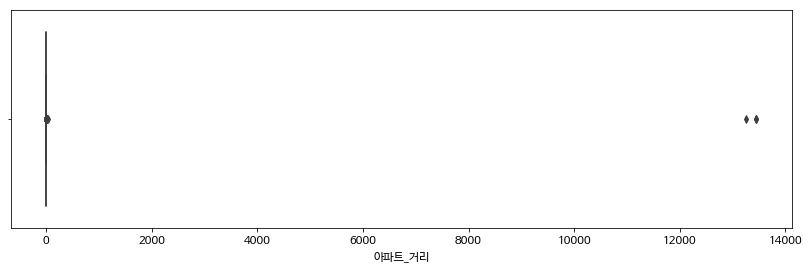

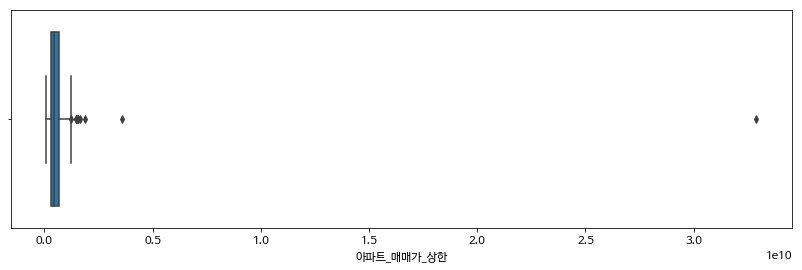

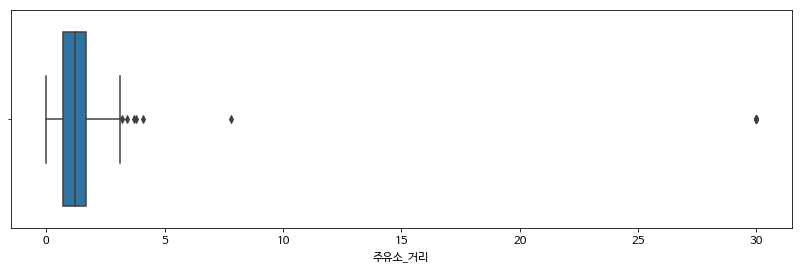

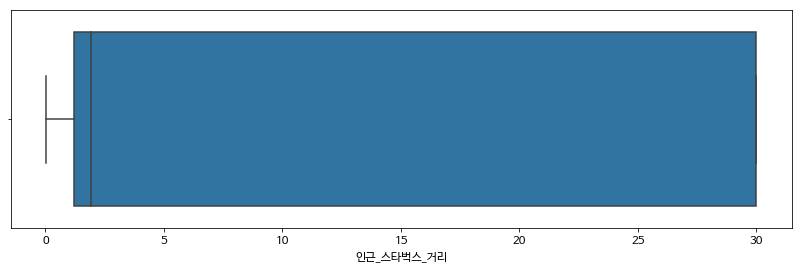

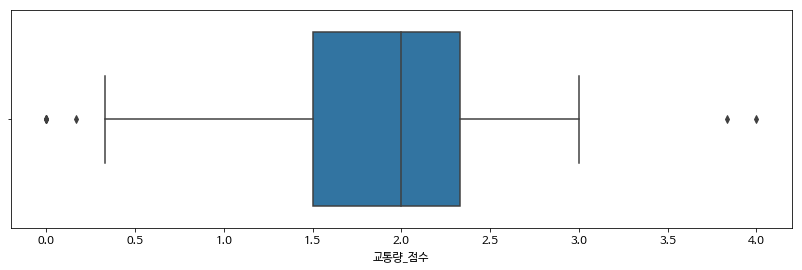

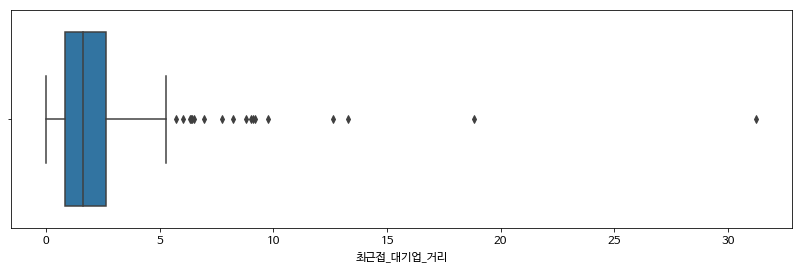

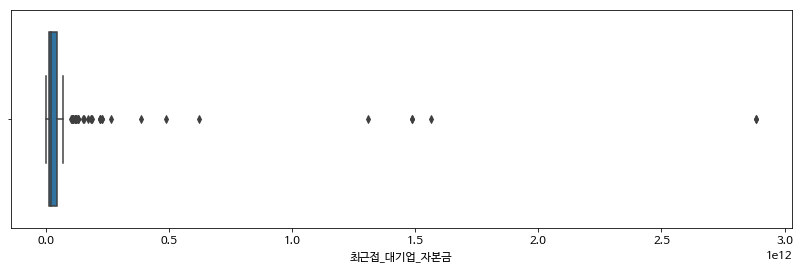

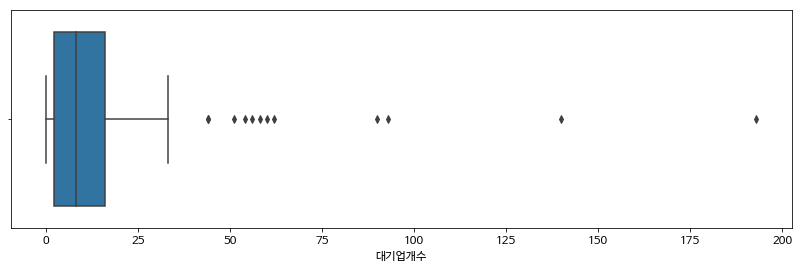

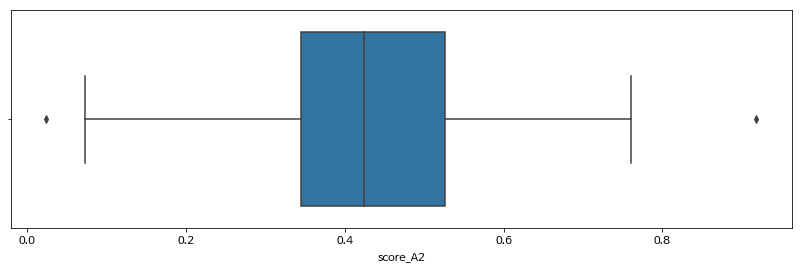

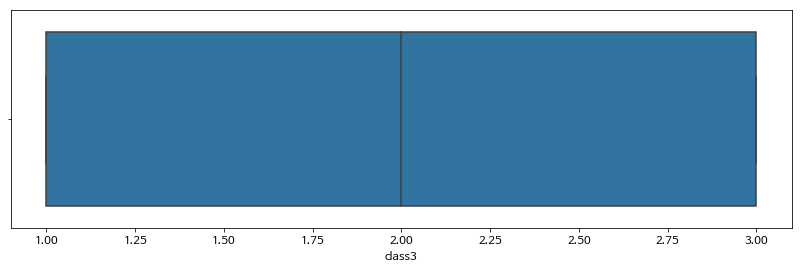

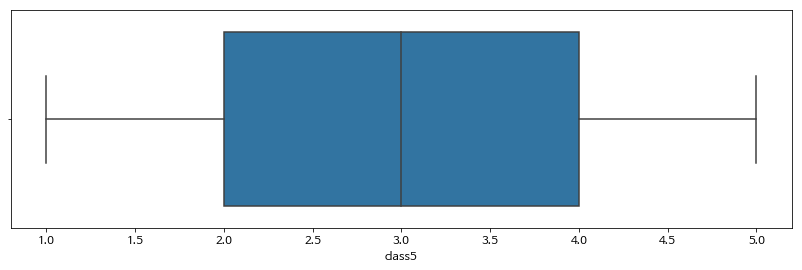

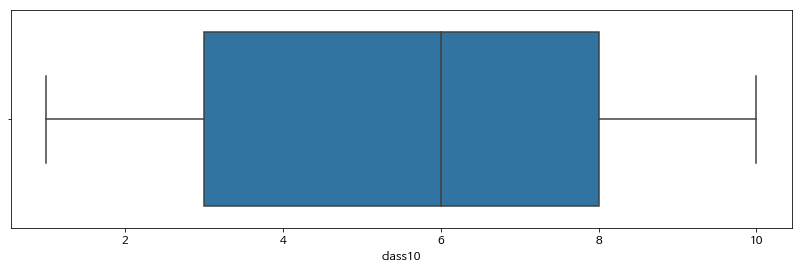

In [566]:
for col_ in df.columns[1:]:
    plt.figure(figsize=(14,4))
    # plt.xlim(-100, 3000)
    sns.boxplot(x=df[col_])

#     plt.figure(figsize=(14,4))
    # plt.xlim(df.관광지_리뷰수.min(), df.관광지_리뷰수.max()*1.1)
#     sns.boxplot(x=df.col)

# Conclusions and Next Steps
Summarize findings here

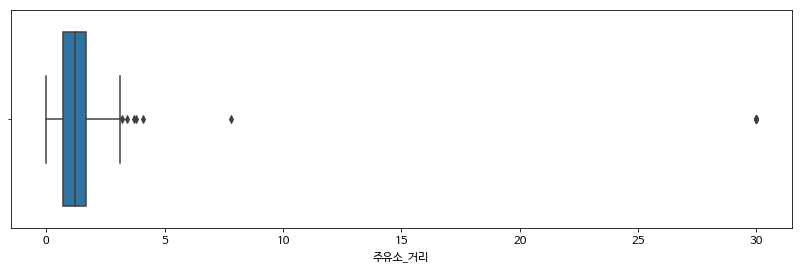

In [567]:
sns.boxplot(df['주유소_거리'])

In [568]:
#df.loc[df['주유소_거리']>6, '주유소_거리'].min()

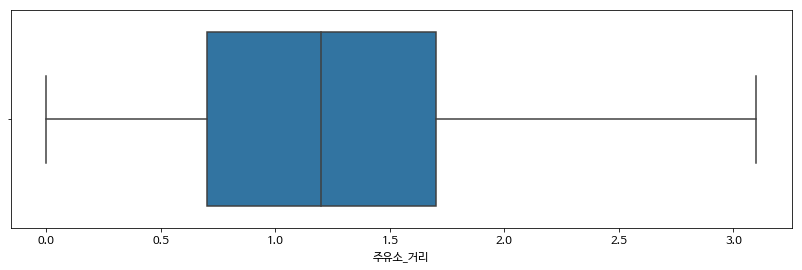

In [569]:
temp_df = outlier_make_one_value(df, '주유소_거리')

In [463]:
#df.loc[df['주유소_거리']> df.loc[df['주유소_거리']>6, '주유소_거리'].min(), '주유소_거리'] = 8

In [570]:
df['주유소_거리2'] = df.주유소_거리.map(lambda x:np.log(x+1))
temp_df['주유소_거리2'] = df.주유소_거리.map(lambda x:np.log(x+1))

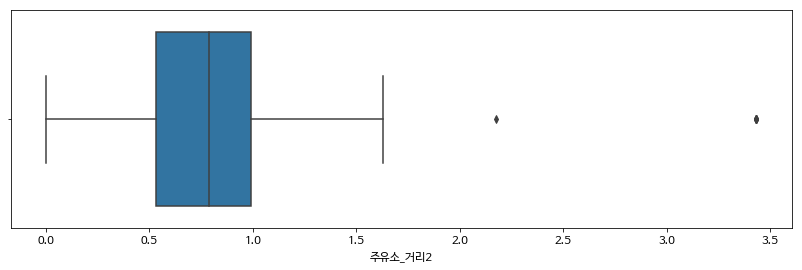

In [571]:
sns.boxplot(x=temp_df['주유소_거리2'])

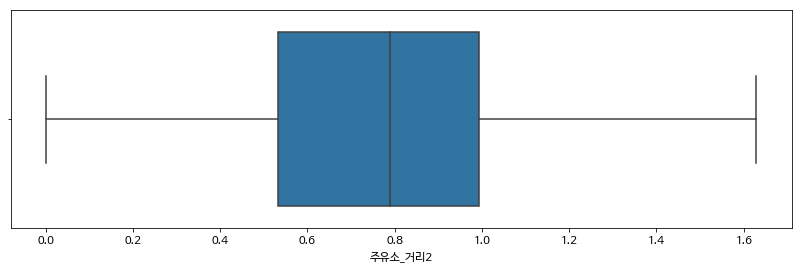

In [572]:
temp_df = outlier_make_one_value(temp_df, '주유소_거리2')

In [575]:
df['주유소_거리3'] = df.주유소_거리.map(lambda x:1/x)
temp_df['주유소_거리3'] = df.주유소_거리.map(lambda x:1/x)

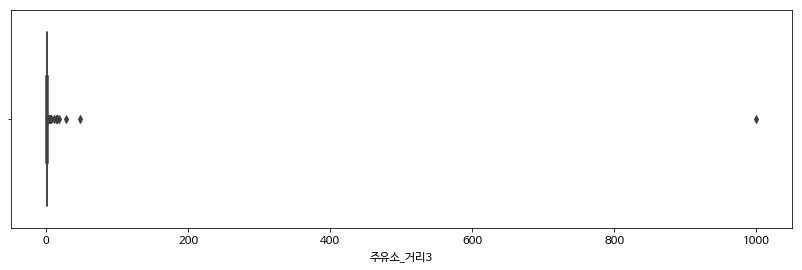

In [576]:
sns.boxplot(x=temp_df['주유소_거리3'])

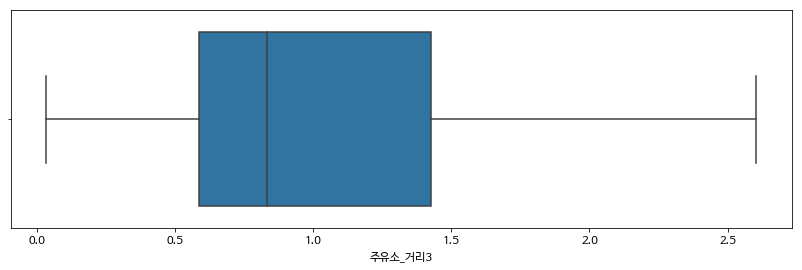

In [577]:
temp_df = outlier_make_one_value(temp_df, '주유소_거리3')

In [134]:
# df.loc[df['주유소_거리3'] > 800, '주유소_거리3'] = df.loc[df['주유소_거리3'] < 800, '주유소_거리3'].max()

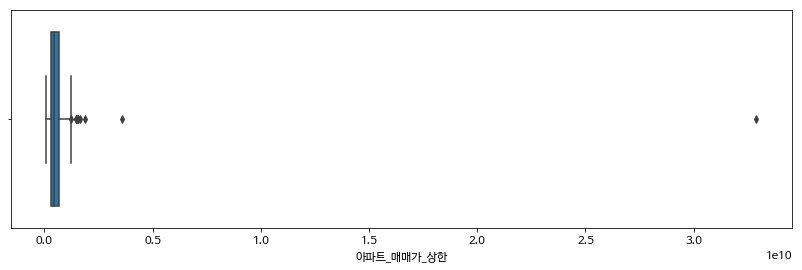

In [578]:
sns.boxplot(df['아파트_매매가_상한'])

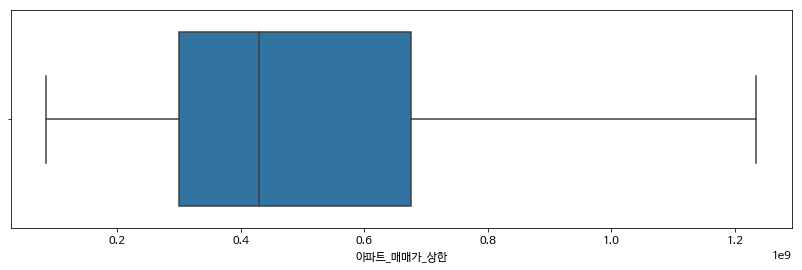

In [579]:
temp_df = outlier_make_one_value(temp_df, '아파트_매매가_상한')

In [580]:
df['아파트_매매가_log'] = df['아파트_매매가_상한'].map(lambda x:np.log(x))
temp_df['아파트_매매가_log'] = df['아파트_매매가_상한'].map(lambda x:np.log(x))

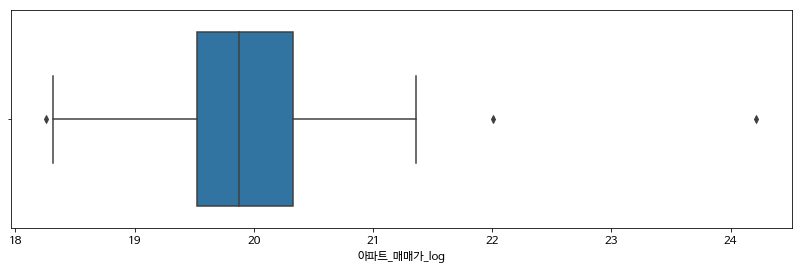

In [581]:
sns.boxplot(df['아파트_매매가_log'])

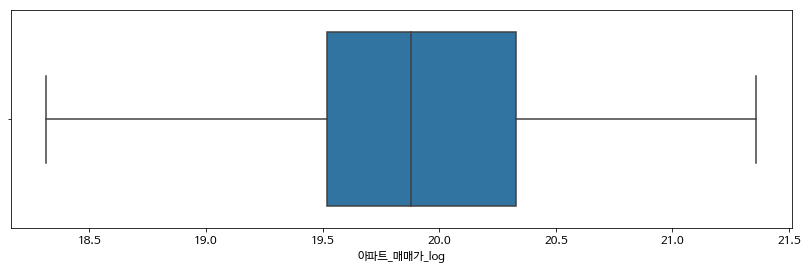

In [582]:
temp_df = outlier_make_one_value(temp_df, '아파트_매매가_log')

In [583]:
df['아파트_매매가_역수'] = df['아파트_매매가_상한'].map(lambda x:1/x)
temp_df['아파트_매매가_역수'] = df['아파트_매매가_상한'].map(lambda x:1/x)

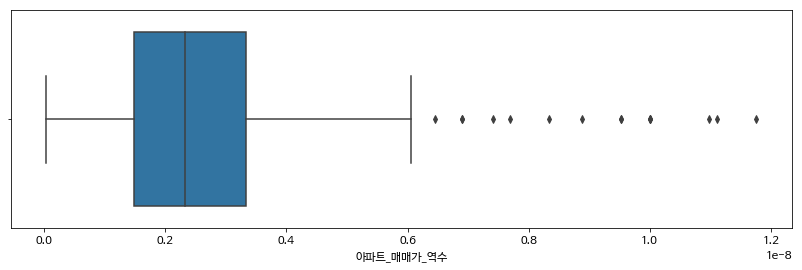

In [584]:
sns.boxplot(df['아파트_매매가_역수'])

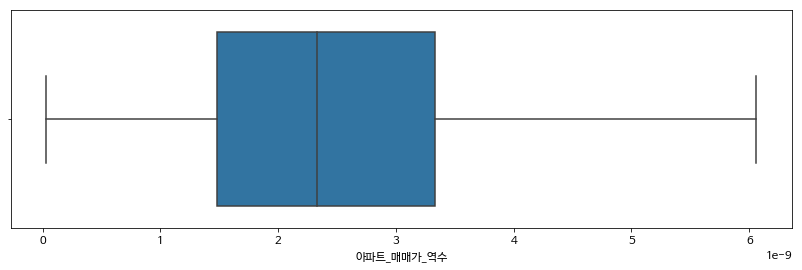

In [585]:
temp_df = outlier_make_one_value(temp_df, '아파트_매매가_역수')

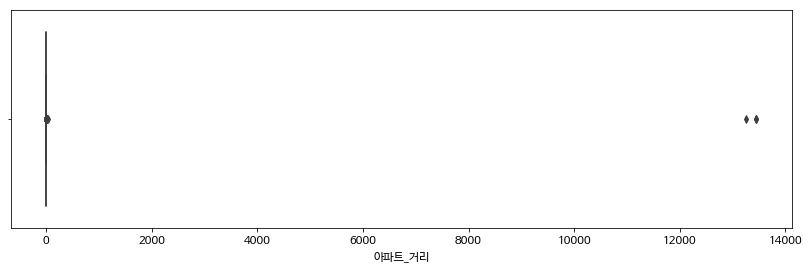

In [586]:
sns.boxplot(df['아파트_거리'])

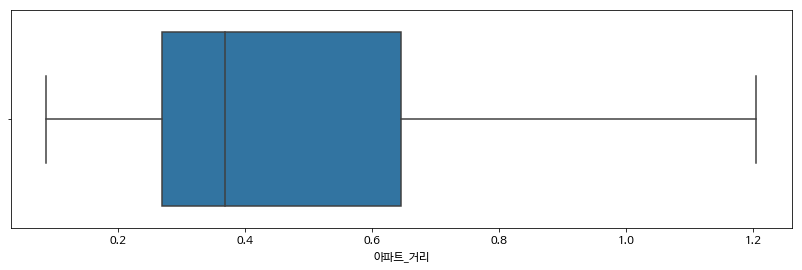

In [587]:
temp_df = outlier_make_one_value(temp_df, '아파트_거리')

In [588]:
df['아파트_거리_log'] = df['아파트_거리'].map(lambda x:np.log(x))
df['아파트_거리_역수'] = df['아파트_거리'].map(lambda x:1/x)
temp_df['아파트_거리_log'] = df['아파트_거리'].map(lambda x:np.log(x))
temp_df['아파트_거리_역수'] = df['아파트_거리'].map(lambda x:1/x)

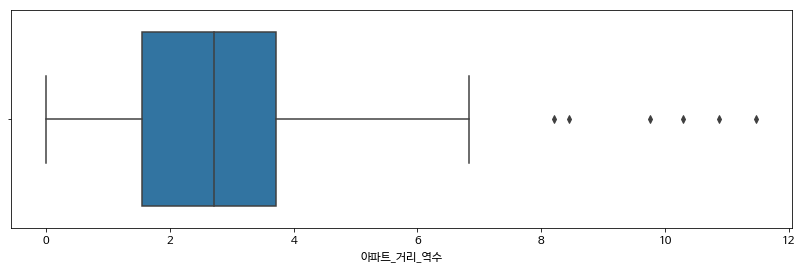

In [589]:
sns.boxplot(df['아파트_거리_역수'])

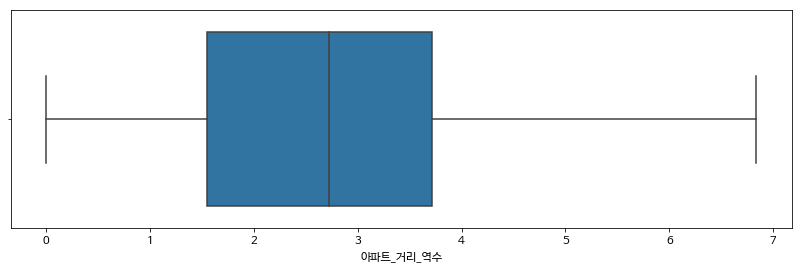

In [590]:
temp_df = outlier_make_one_value(temp_df, '아파트_거리_역수')

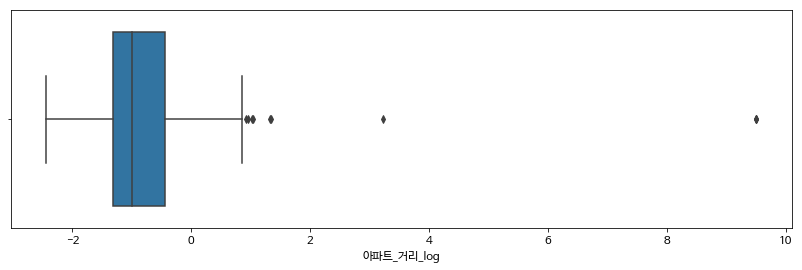

In [591]:
sns.boxplot(df['아파트_거리_log'])

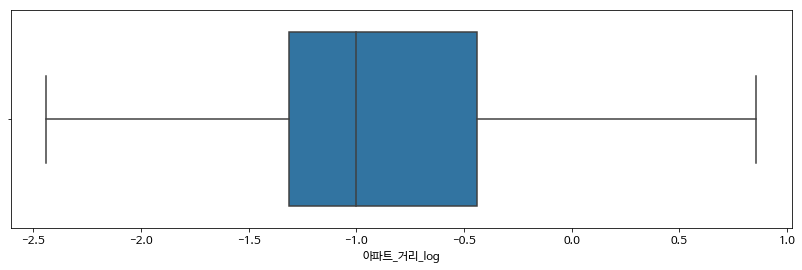

In [592]:
temp_df = outlier_make_one_value(temp_df, '아파트_거리_log')

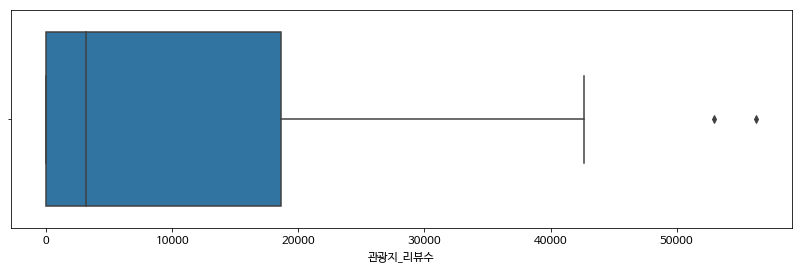

In [593]:
sns.boxplot(df['관광지_리뷰수'])

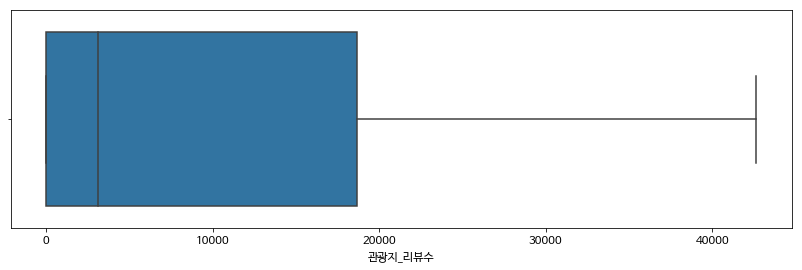

In [594]:
temp_df = outlier_make_one_value(temp_df, '관광지_리뷰수')

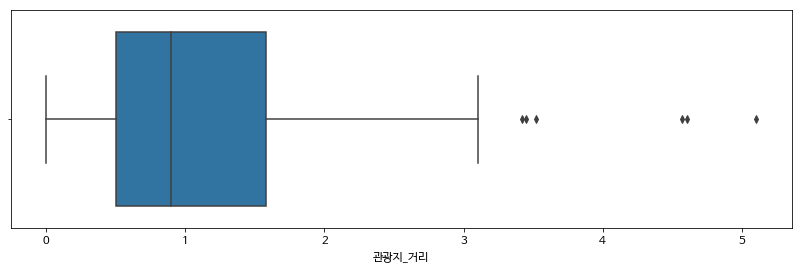

In [595]:
sns.boxplot(df['관광지_거리'])

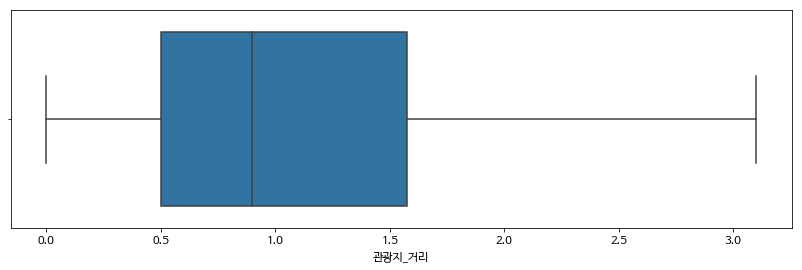

In [596]:
temp_df = outlier_make_one_value(temp_df, '관광지_거리')

In [597]:
df['관광지_점수'] = df.apply(lambda row:row['관광지_리뷰수']/(row['관광지_거리']+1e-7), axis=1)
temp_df['관광지_점수'] = df.apply(lambda row:row['관광지_리뷰수']/(row['관광지_거리']+1e-7), axis=1)

In [600]:
df['관광지_점수2'] = df.apply(lambda row:minmax_norm(df, row, '관광지_리뷰수')/(minmax_norm(df, row, '관광지_거리')+1e-7), axis=1)
temp_df['관광지_점수2'] = df.apply(lambda row:minmax_norm(df, row, '관광지_리뷰수')/(minmax_norm(df, row, '관광지_거리')+1e-7), axis=1)

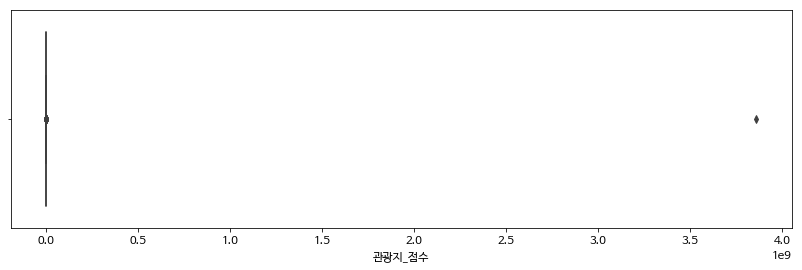

In [601]:
sns.boxplot(df['관광지_점수'])

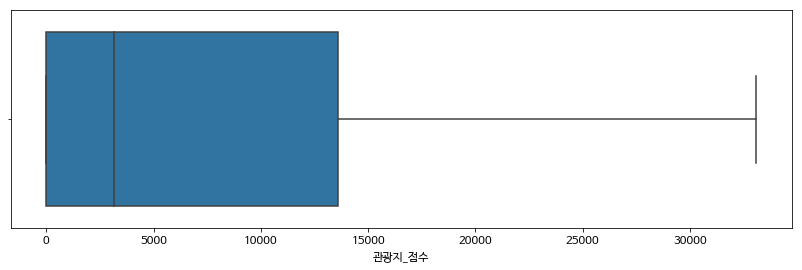

In [602]:
temp_df = outlier_make_one_value(temp_df, '관광지_점수')

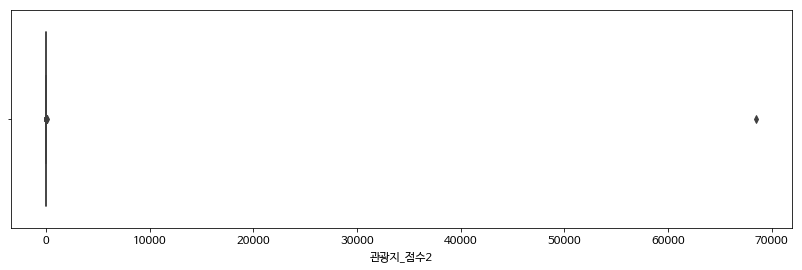

In [603]:
sns.boxplot(df['관광지_점수2'])

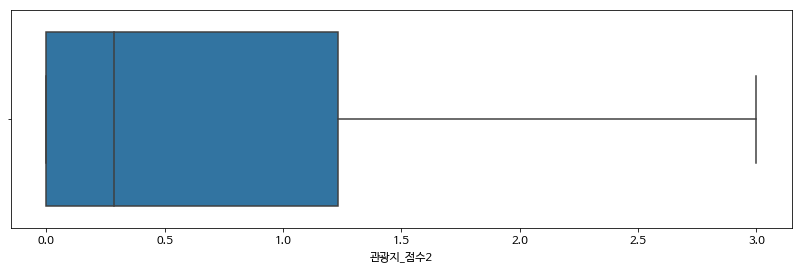

In [604]:
temp_df = outlier_make_one_value(temp_df, '관광지_점수2')

In [495]:
# df.loc[df['관광지_점수']>2e5, '관광지_점수'] = df.loc[df['관광지_점수']>2e5,'관광지_점수'].min()

In [496]:
# sns.boxplot(df.loc[df['관광지_점수']<3.5e9,'관광지_점수'])

In [605]:
df['관광지_점수_log'] = df['관광지_점수'].map(lambda x:np.log(x+1))
temp_df['관광지_점수_log'] = df['관광지_점수'].map(lambda x:np.log(x+1))

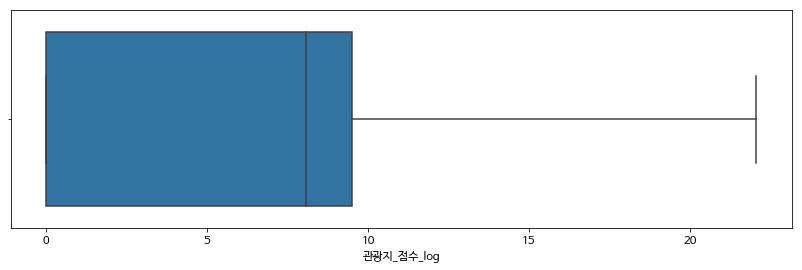

In [606]:
sns.boxplot(df['관광지_점수_log'])

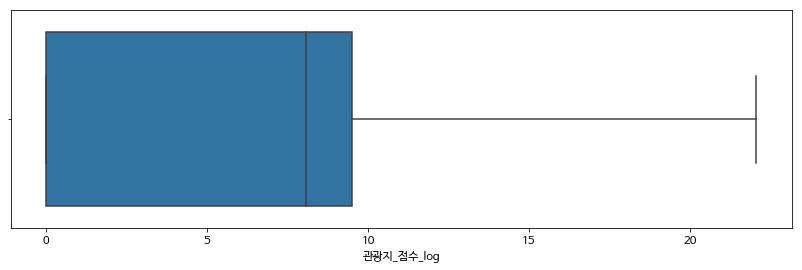

In [607]:
temp_df = outlier_make_one_value(temp_df, '관광지_점수_log')

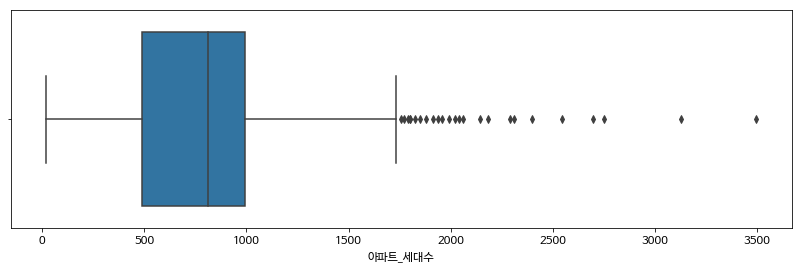

In [608]:
sns.boxplot(df['아파트_세대수'])

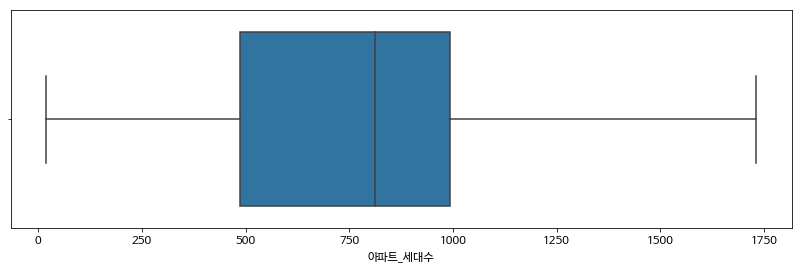

In [609]:
temp_df = outlier_make_one_value(temp_df, '아파트_세대수')

In [610]:
df['아파트_세대수_log'] = df['아파트_세대수'].map(lambda x:np.log(x+1))
temp_df['아파트_세대수_log'] = df['아파트_세대수'].map(lambda x:np.log(x+1))

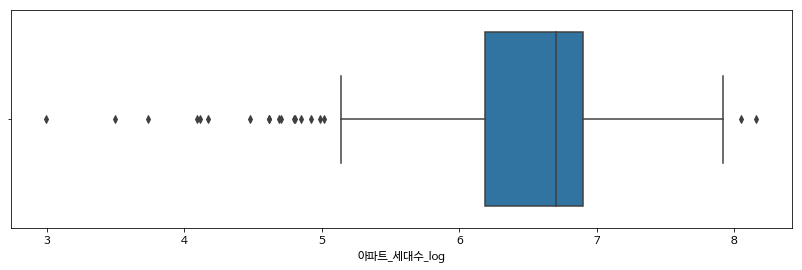

In [611]:
sns.boxplot(df['아파트_세대수_log'])

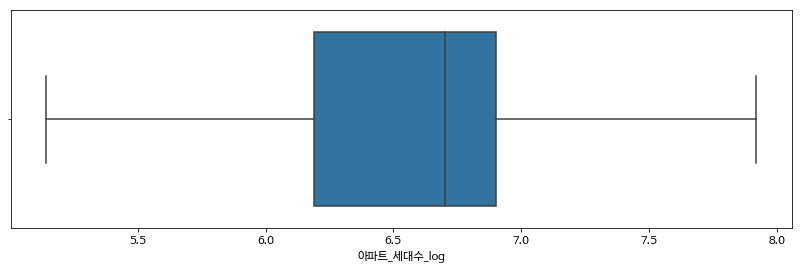

In [612]:
temp_df = outlier_make_one_value(temp_df, '아파트_세대수_log')

In [613]:
df['아파트_세대수_sqrt'] = df['아파트_세대수'].map(lambda x:np.sqrt(x))
temp_df['아파트_세대수_sqrt'] = df['아파트_세대수'].map(lambda x:np.sqrt(x))

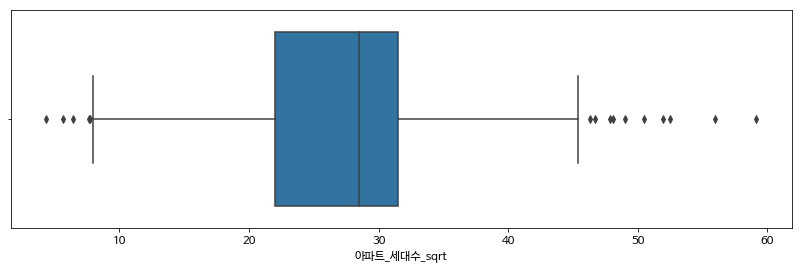

In [614]:
sns.boxplot(df['아파트_세대수_sqrt'])

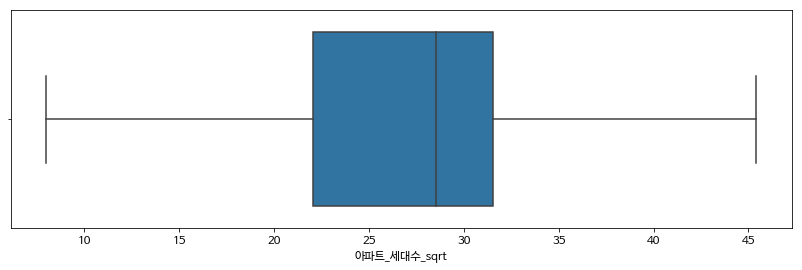

In [615]:
temp_df = outlier_make_one_value(temp_df, '아파트_세대수_sqrt')

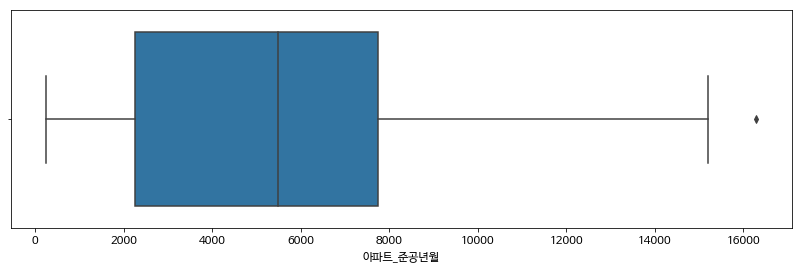

In [616]:
sns.boxplot(df['아파트_준공년월'])

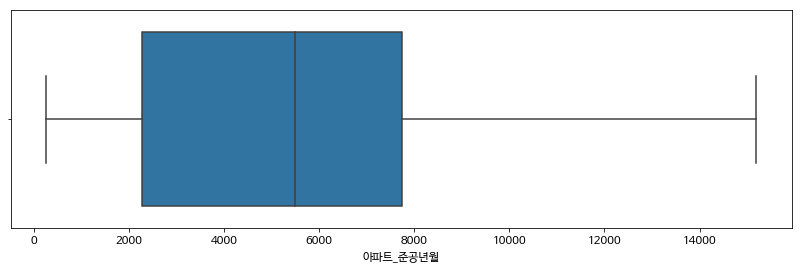

In [617]:
temp_df = outlier_make_one_value(temp_df, '아파트_준공년월')

In [618]:
df['아파트_점수1'] = df.apply(lambda row:(row['아파트_세대수']*row['아파트_매매가_log'])/(row['아파트_준공년월']*row['아파트_거리_log']+1e-7), axis=1)
temp_df['아파트_점수1'] = df.apply(lambda row:(row['아파트_세대수']*row['아파트_매매가_log'])/(row['아파트_준공년월']*row['아파트_거리_log']+1e-7), axis=1)

In [619]:
df['아파트_점수2'] = df.apply(lambda row:(minmax_norm(df,row,'아파트_세대수')*minmax_norm(df,row,'아파트_매매가_log'))/(minmax_norm(df, row, '아파트_준공년월')*minmax_norm(df, row, '아파트_거리_log')+1e-7), axis=1)
temp_df['아파트_점수2'] = df.apply(lambda row:(minmax_norm(df,row,'아파트_세대수')*minmax_norm(df,row,'아파트_매매가_log'))/(minmax_norm(df, row, '아파트_준공년월')*minmax_norm(df, row, '아파트_거리_log')+1e-7), axis=1)

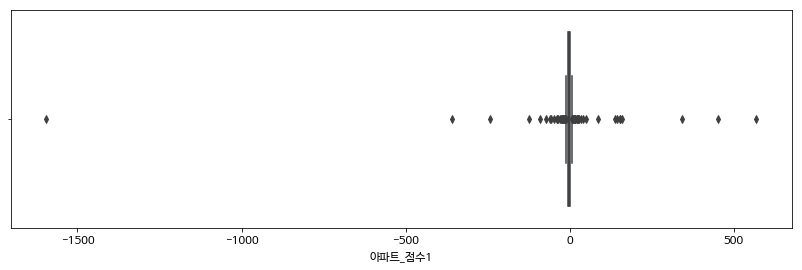

In [620]:
sns.boxplot(df['아파트_점수1'])

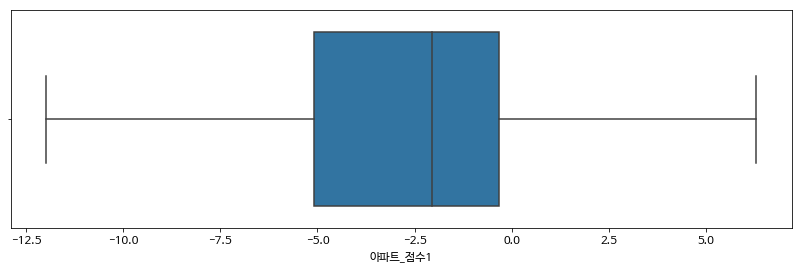

In [621]:
temp_df = outlier_make_one_value(temp_df, '아파트_점수1')

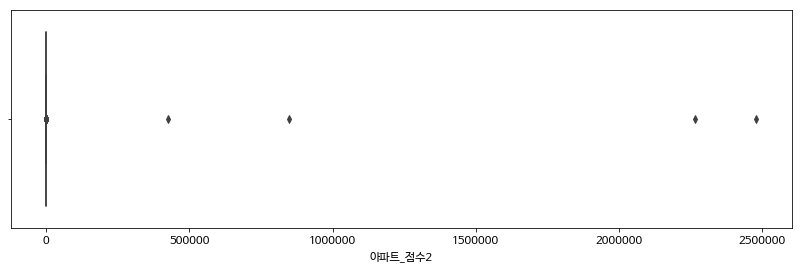

In [622]:
sns.boxplot(df['아파트_점수2'])

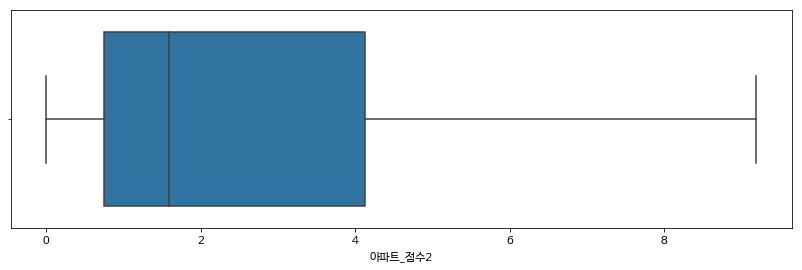

In [623]:
temp_df = outlier_make_one_value(temp_df, '아파트_점수2')

In [624]:
df['아파트_점수3'] = df.apply(lambda row:(minmax_norm(df,row,'아파트_세대수')+minmax_norm(df,row,'아파트_매매가_log'))/(minmax_norm(df, row, '아파트_준공년월')+minmax_norm(df, row, '아파트_거리_log')+1e-7), axis=1)
temp_df['아파트_점수3'] = df.apply(lambda row:(minmax_norm(df,row,'아파트_세대수')+minmax_norm(df,row,'아파트_매매가_log'))/(minmax_norm(df, row, '아파트_준공년월')+minmax_norm(df, row, '아파트_거리_log')+1e-7), axis=1)

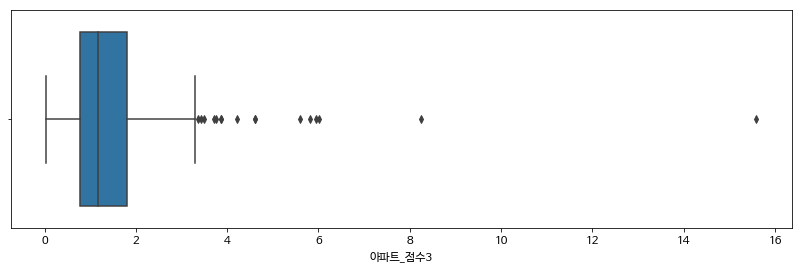

In [625]:
sns.boxplot(df['아파트_점수3'])

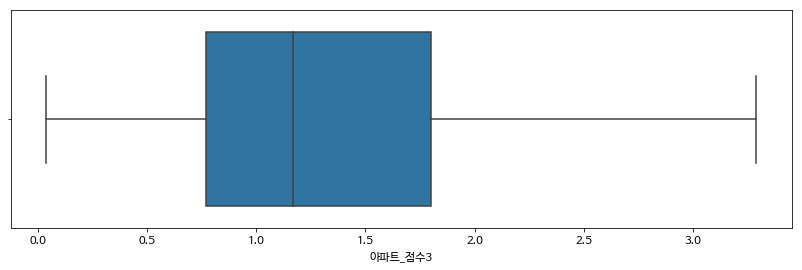

In [626]:
temp_df = outlier_make_one_value(temp_df, '아파트_점수3')

In [627]:
df['아파트_점수4'] = df.apply(lambda row:(minmax_norm(df,row,'아파트_세대수')+minmax_norm(df,row,'아파트_매매가_log')*2)/(minmax_norm(df, row, '아파트_준공년월')+minmax_norm(df, row, '아파트_거리_log')*2+1e-7), axis=1)
temp_df['아파트_점수4'] = df.apply(lambda row:(minmax_norm(df,row,'아파트_세대수')+minmax_norm(df,row,'아파트_매매가_log')*2)/(minmax_norm(df, row, '아파트_준공년월')+minmax_norm(df, row, '아파트_거리_log')*2+1e-7), axis=1)

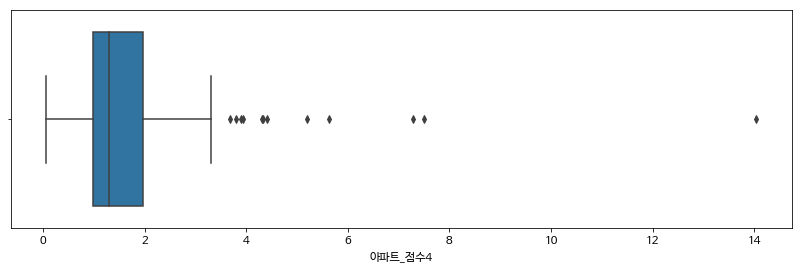

In [628]:
sns.boxplot(df['아파트_점수4']) 

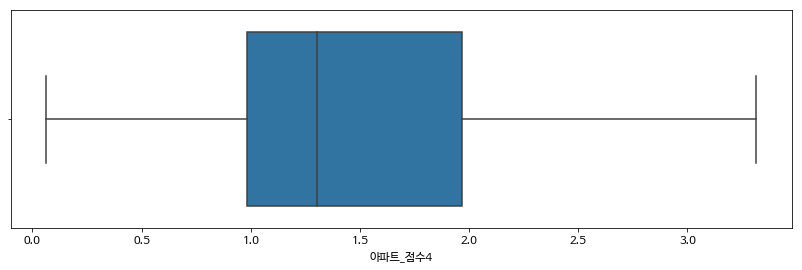

In [629]:
temp_df = outlier_make_one_value(temp_df, '아파트_점수4')

In [630]:
df['아파트_점수5'] = df['아파트_점수4'].map(lambda x:np.log(x+1))
temp_df['아파트_점수5'] = df['아파트_점수4'].map(lambda x:np.log(x+1))

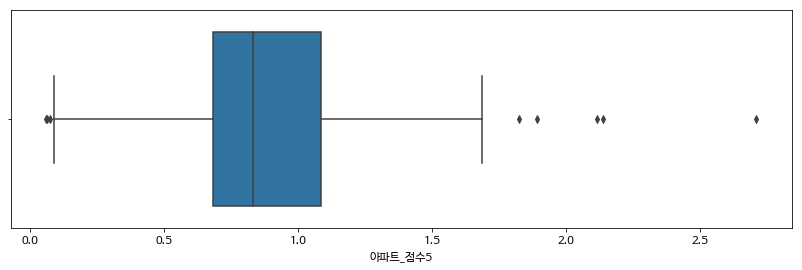

In [631]:
sns.boxplot(df['아파트_점수5']) 

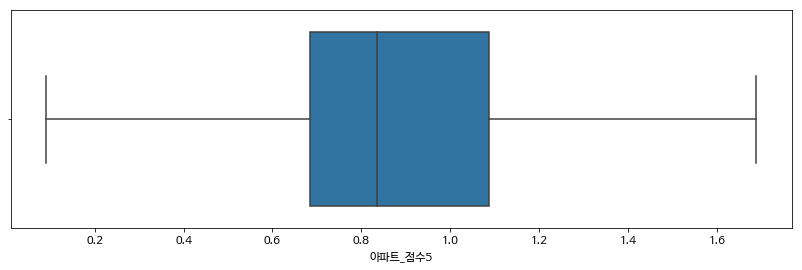

In [632]:
temp_df = outlier_make_one_value(temp_df, '아파트_점수5')

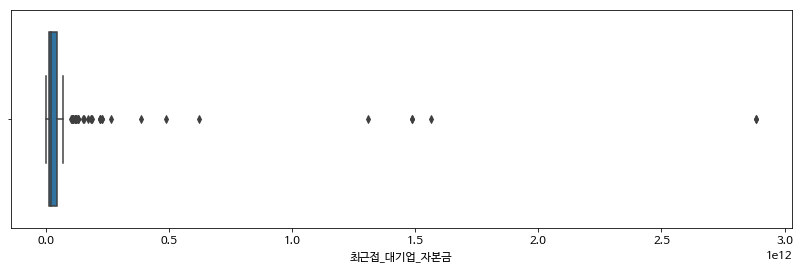

In [633]:
sns.boxplot(df['최근접_대기업_자본금'])

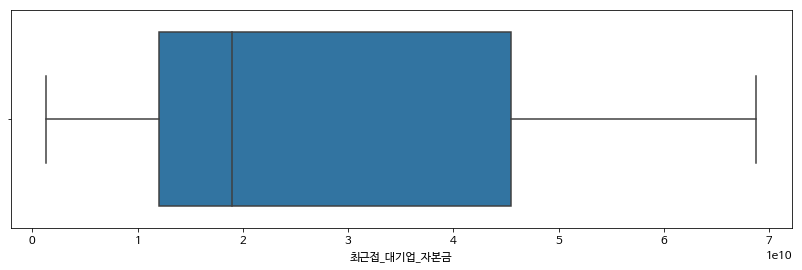

In [634]:
temp_df = outlier_make_one_value(temp_df, '최근접_대기업_자본금')

In [635]:
df['최근접_대기업_자본금2'] = df['최근접_대기업_자본금'].map(lambda x:np.log(x+1))
temp_df['최근접_대기업_자본금2'] = df['최근접_대기업_자본금'].map(lambda x:np.log(x+1))

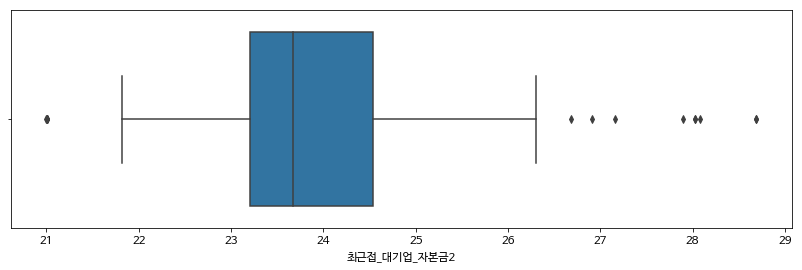

In [636]:
sns.boxplot(df['최근접_대기업_자본금2'])

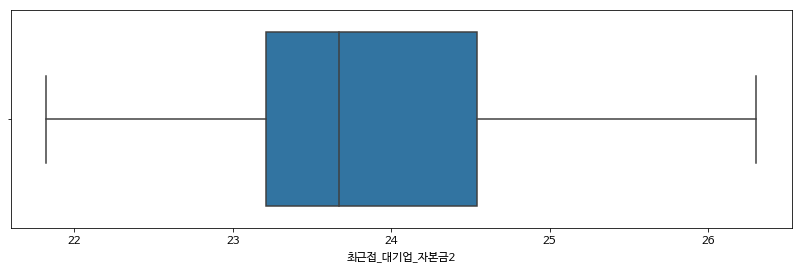

In [637]:
temp_df = outlier_make_one_value(temp_df, '최근접_대기업_자본금2')

In [638]:
df['최근접_대기업_자본금3'] = df['최근접_대기업_자본금'].map(lambda x:1/x)
temp_df['최근접_대기업_자본금3'] = df['최근접_대기업_자본금'].map(lambda x:1/x)

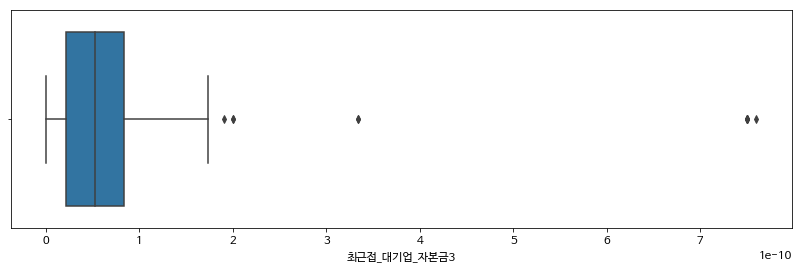

In [639]:
sns.boxplot(df['최근접_대기업_자본금3'])

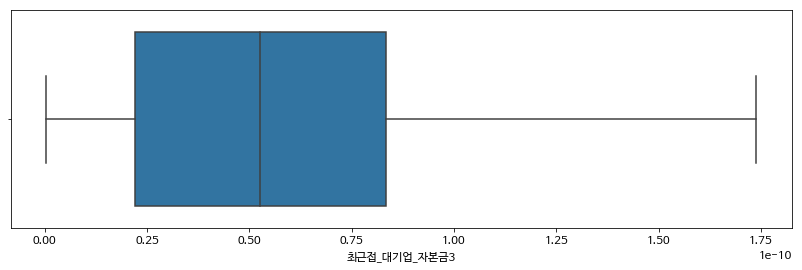

In [640]:
temp_df = outlier_make_one_value(temp_df, '최근접_대기업_자본금3')

In [642]:
df['최근접_대기업_자본금4'] = df['최근접_대기업_자본금'].map(lambda x:np.sqrt(x))
temp_df['최근접_대기업_자본금4'] = df['최근접_대기업_자본금'].map(lambda x:np.sqrt(x))

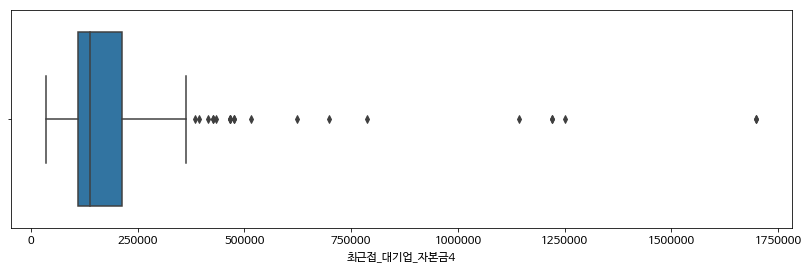

In [643]:
sns.boxplot(df['최근접_대기업_자본금4'])

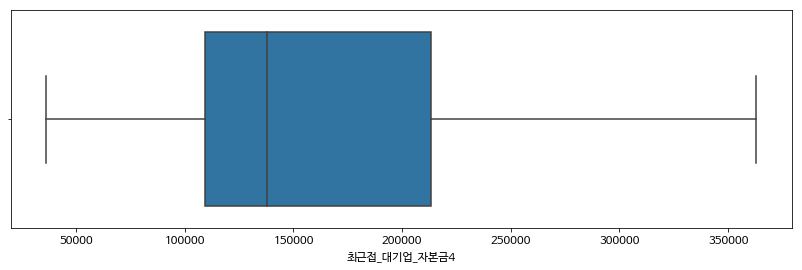

In [644]:
temp_df = outlier_make_one_value(temp_df, '최근접_대기업_자본금4')

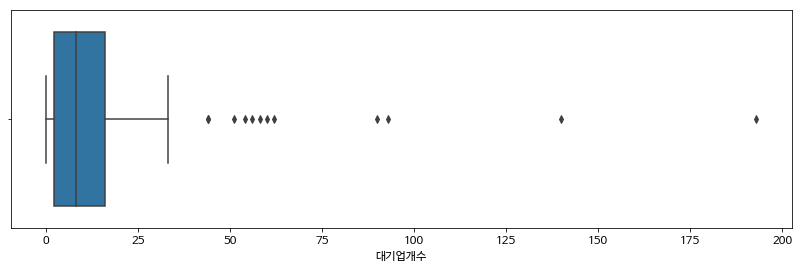

In [645]:
sns.boxplot(df['대기업개수'])

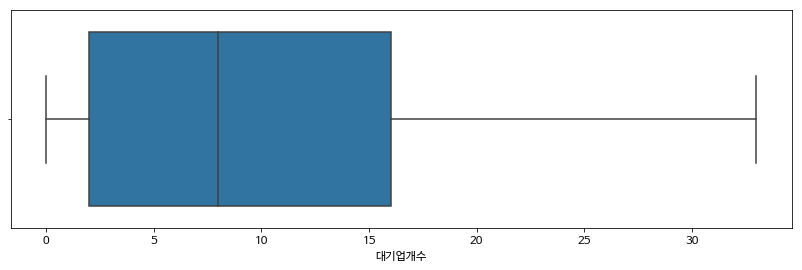

In [646]:
temp_df = outlier_make_one_value(temp_df, '대기업개수')

In [649]:
df['대기업개수_log'] = df['대기업개수'].map(lambda x:np.log(x+1))
temp_df['대기업개수_log'] = df['대기업개수'].map(lambda x:np.log(x+1))

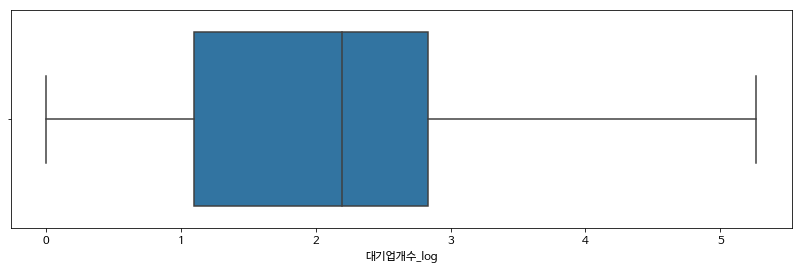

In [650]:
sns.boxplot(df['대기업개수_log'])

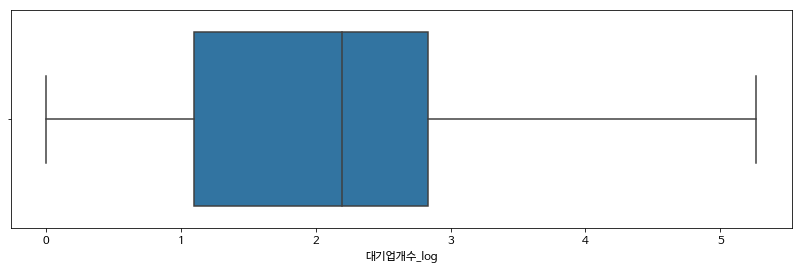

In [651]:
temp_df = outlier_make_one_value(temp_df, '대기업개수_log')

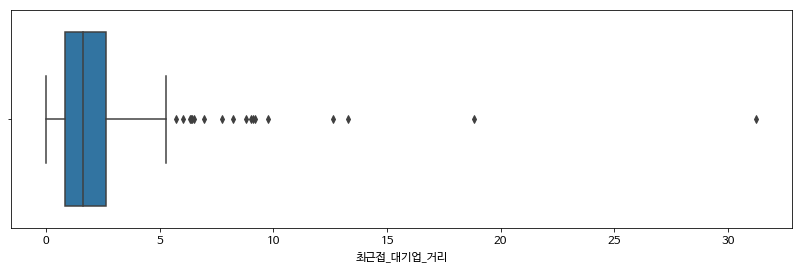

In [720]:
sns.boxplot(df['최근접_대기업_거리'])

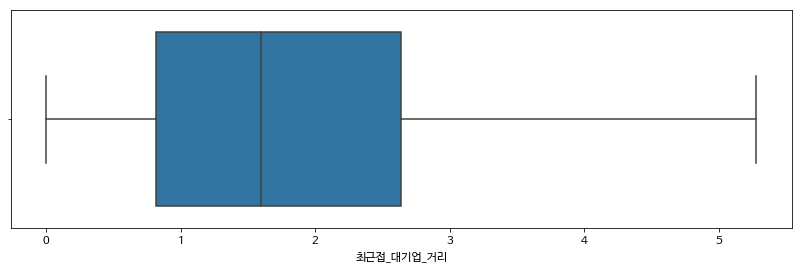

In [721]:
temp_df = outlier_make_one_value(temp_df, '최근접_대기업_거리')

In [723]:
df['최근접_대기업_거리_log'] = df['최근접_대기업_거리'].map(lambda x:np.log(x+1))
temp_df['최근접_대기업_거리_log'] = df['최근접_대기업_거리'].map(lambda x:np.log(x+1))

In [728]:
df['최근접_대기업_거리_역수'] = df['최근접_대기업_거리'].map(lambda x:1/(x+1))
temp_df['최근접_대기업_거리_역수'] = df['최근접_대기업_거리'].map(lambda x:1/(x+1))

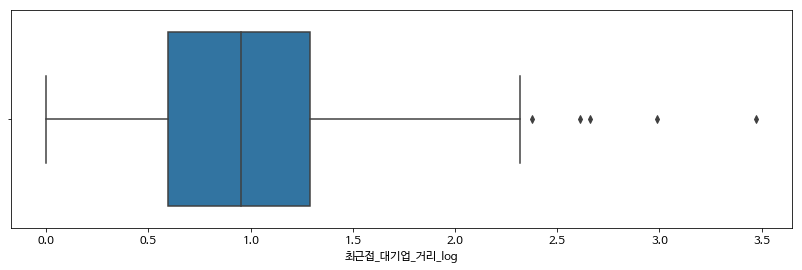

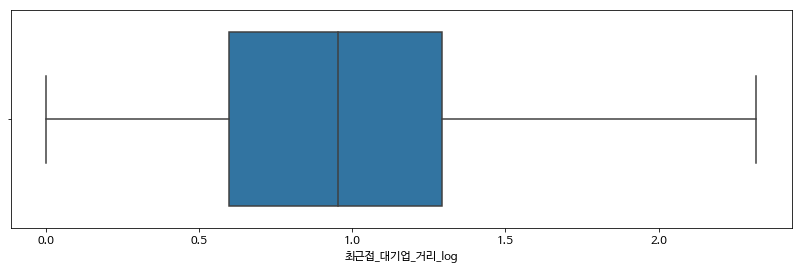

In [726]:
temp_df = check_box_plot(df, temp_df, '최근접_대기업_거리_log')

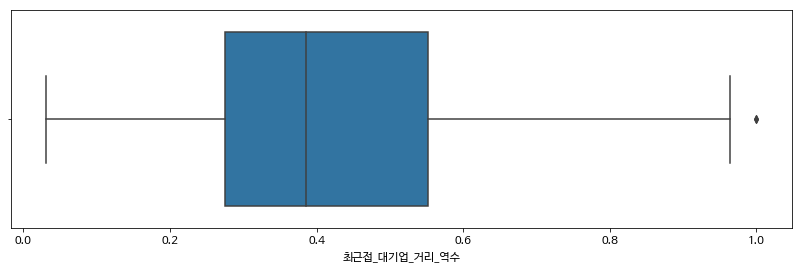

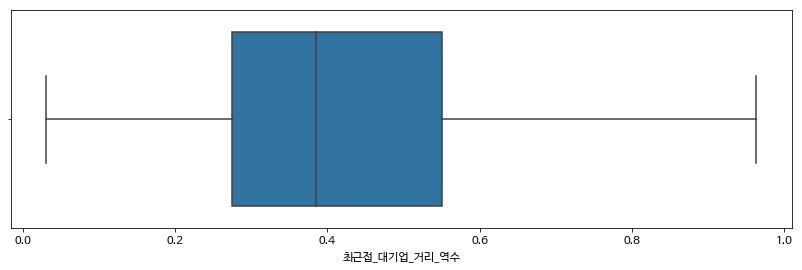

In [729]:
temp_df = check_box_plot(df, temp_df, '최근접_대기업_거리_역수')

In [47]:
def minmax_norm(df, row, col_name):
    return (row[col_name] - df[col_name].min())/(df[col_name].max() - df[col_name].min())

def upper_outliers_iqr(df, col_name, min_per, max_per):
    quartile_1, quartile_3 = np.percentile(df[col_name], [min_per, max_per])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    max_value = df.reset_index(drop=True).loc[np.where((df[col_name] <= upper_bound))][col_name].values.max()
    return np.concatenate(np.where((df[col_name] > upper_bound))), max_value

def down_outliers_iqr(df, col_name, min_per, max_per):
    quartile_1, quartile_3 = np.percentile(df[col_name], [min_per, max_per])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    min_value = df.reset_index(drop=True).loc[np.where((df[col_name] >= lower_bound))][col_name].values.min()
    return np.concatenate(np.where((df[col_name] < lower_bound))), min_value

def outlier_make_one_value(df, col_name, min_per=25, max_per=75):
    temp_df = df.copy()
    outlier_up_idx, one_max = upper_outliers_iqr(temp_df, col_name, min_per, max_per)
    temp_df = temp_df.reset_index(drop=True)
    temp_df.loc[outlier_up_idx, col_name] = one_max
    outlier_dw_idx, one_min = down_outliers_iqr(temp_df, col_name, min_per, max_per)
    temp_df.loc[outlier_dw_idx, col_name] = one_min
    sns.boxplot(temp_df[col_name])
    return temp_df

def check_box_plot(src_df, target_df, col_name):
    plt.figure(figsize=(14,4))
    sns.boxplot(df[col_name])
    plt.figure(figsize=(14,4))
    target_df = outlier_make_one_value(target_df, col_name)
    return target_df

In [731]:
df['대기업점수4'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수')*minmax_norm(df, row, '최근접_대기업_자본금4'), axis=1)
df['대기업점수3'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수')*minmax_norm(df, row, '최근접_대기업_자본금3'), axis=1)
df['대기업점수2'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수')*minmax_norm(df, row, '최근접_대기업_자본금2'), axis=1)
df['대기업점수1'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수')*minmax_norm(df, row, '최근접_대기업_자본금'), axis=1)
df['대기업점수8'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수_log')*minmax_norm(df, row, '최근접_대기업_자본금4'), axis=1)
df['대기업점수7'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수_log')*minmax_norm(df, row, '최근접_대기업_자본금3'), axis=1)
df['대기업점수6'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수_log')*minmax_norm(df, row, '최근접_대기업_자본금2'), axis=1)
df['대기업점수5'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수_log')*minmax_norm(df, row, '최근접_대기업_자본금'), axis=1)
df['대기업점수9'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수_log')*minmax_norm(df, row, '최근접_대기업_자본금4')*minmax_norm(df, row, '최근접_대기업_거리_역수'), axis=1)
df['대기업점수10'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수_log')*minmax_norm(df, row, '최근접_대기업_자본금3')*minmax_norm(df, row, '최근접_대기업_거리_역수'), axis=1)
df['대기업점수11'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수_log')*minmax_norm(df, row, '최근접_대기업_자본금2')*minmax_norm(df, row, '최근접_대기업_거리_역수'), axis=1)
df['대기업점수12'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수_log')*minmax_norm(df, row, '최근접_대기업_자본금')*minmax_norm(df, row, '최근접_대기업_거리_역수'), axis=1)
df['대기업점수13'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수_log')*minmax_norm(df, row, '최근접_대기업_자본금4')/(minmax_norm(df, row, '최근접_대기업_거리_log')+1e-7), axis=1)
df['대기업점수14'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수_log')*minmax_norm(df, row, '최근접_대기업_자본금3')/(minmax_norm(df, row, '최근접_대기업_거리_log')+1e-7), axis=1)
df['대기업점수15'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수_log')*minmax_norm(df, row, '최근접_대기업_자본금2')/(minmax_norm(df, row, '최근접_대기업_거리_log')+1e-7), axis=1)
df['대기업점수16'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수_log')*minmax_norm(df, row, '최근접_대기업_자본금')/(minmax_norm(df, row, '최근접_대기업_거리_log')+1e-7), axis=1)

In [732]:
temp_df['대기업점수4'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수')*minmax_norm(df, row, '최근접_대기업_자본금4'), axis=1)
temp_df['대기업점수3'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수')*minmax_norm(df, row, '최근접_대기업_자본금3'), axis=1)
temp_df['대기업점수2'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수')*minmax_norm(df, row, '최근접_대기업_자본금2'), axis=1)
temp_df['대기업점수1'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수')*minmax_norm(df, row, '최근접_대기업_자본금'), axis=1)
temp_df['대기업점수8'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수_log')*minmax_norm(df, row, '최근접_대기업_자본금4'), axis=1)
temp_df['대기업점수7'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수_log')*minmax_norm(df, row, '최근접_대기업_자본금3'), axis=1)
temp_df['대기업점수6'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수_log')*minmax_norm(df, row, '최근접_대기업_자본금2'), axis=1)
temp_df['대기업점수5'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수_log')*minmax_norm(df, row, '최근접_대기업_자본금'), axis=1)
temp_df['대기업점수9'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수_log')*minmax_norm(df, row, '최근접_대기업_자본금4')*minmax_norm(df, row, '최근접_대기업_거리_역수'), axis=1)
temp_df['대기업점수10'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수_log')*minmax_norm(df, row, '최근접_대기업_자본금3')*minmax_norm(df, row, '최근접_대기업_거리_역수'), axis=1)
temp_df['대기업점수11'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수_log')*minmax_norm(df, row, '최근접_대기업_자본금2')*minmax_norm(df, row, '최근접_대기업_거리_역수'), axis=1)
temp_df['대기업점수12'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수_log')*minmax_norm(df, row, '최근접_대기업_자본금')*minmax_norm(df, row, '최근접_대기업_거리_역수'), axis=1)
temp_df['대기업점수13'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수_log')*minmax_norm(df, row, '최근접_대기업_자본금4')/(minmax_norm(df, row, '최근접_대기업_거리_log')+1e-7), axis=1)
temp_df['대기업점수14'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수_log')*minmax_norm(df, row, '최근접_대기업_자본금3')/(minmax_norm(df, row, '최근접_대기업_거리_log')+1e-7), axis=1)
temp_df['대기업점수15'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수_log')*minmax_norm(df, row, '최근접_대기업_자본금2')/(minmax_norm(df, row, '최근접_대기업_거리_log')+1e-7), axis=1)
temp_df['대기업점수16'] = df.apply(lambda row:minmax_norm(df, row, '대기업개수_log')*minmax_norm(df, row, '최근접_대기업_자본금')/(minmax_norm(df, row, '최근접_대기업_거리_log')+1e-7), axis=1)

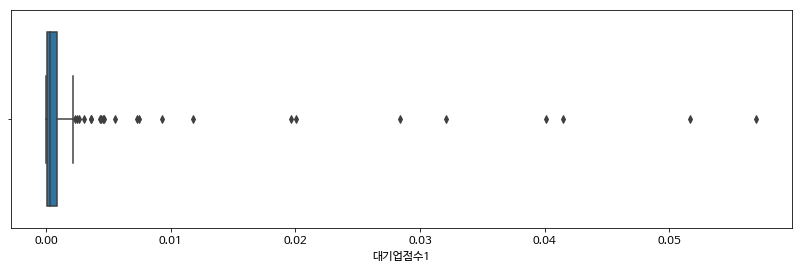

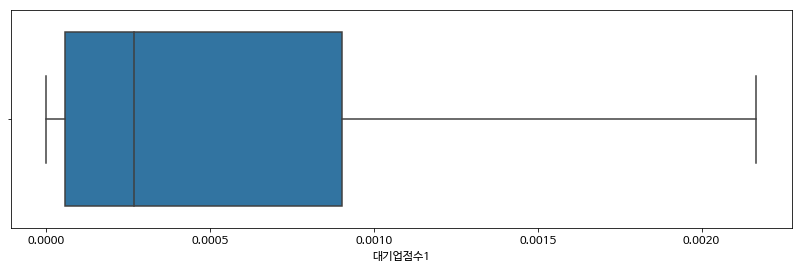

In [662]:
temp_df = check_box_plot(df, temp_df, '대기업점수1')

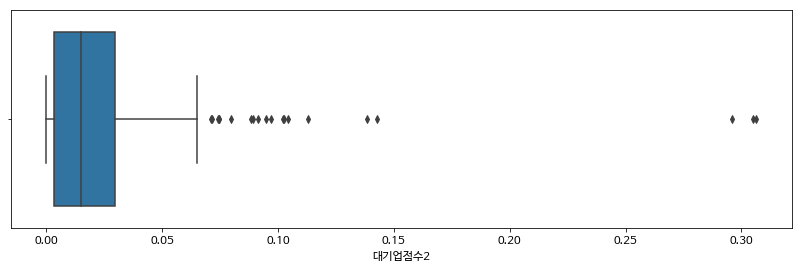

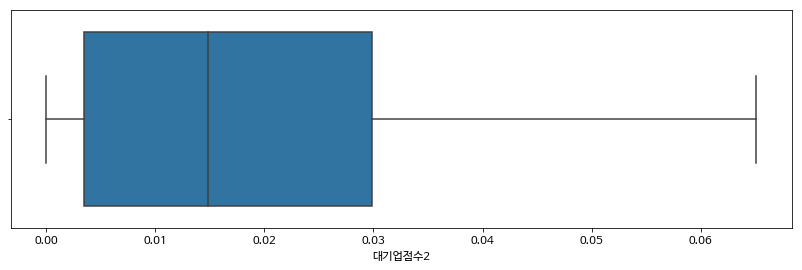

In [663]:
temp_df = check_box_plot(df, temp_df, '대기업점수2')

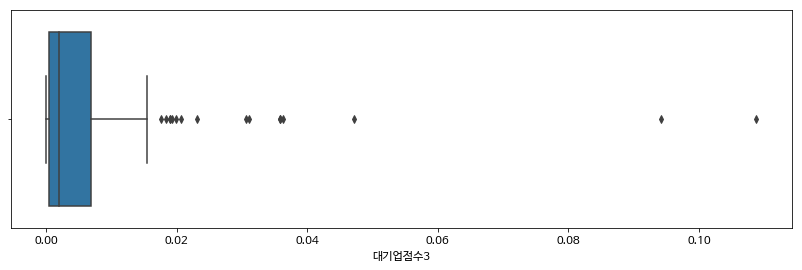

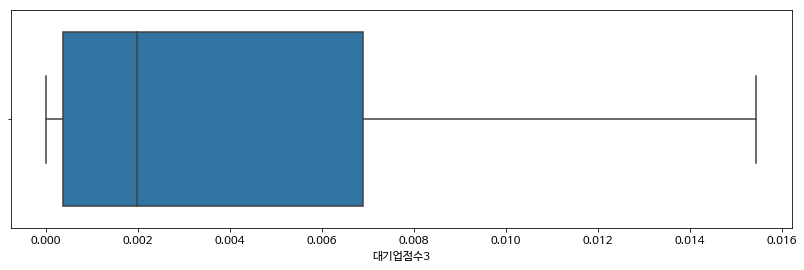

In [664]:
temp_df = check_box_plot(df, temp_df, '대기업점수3')

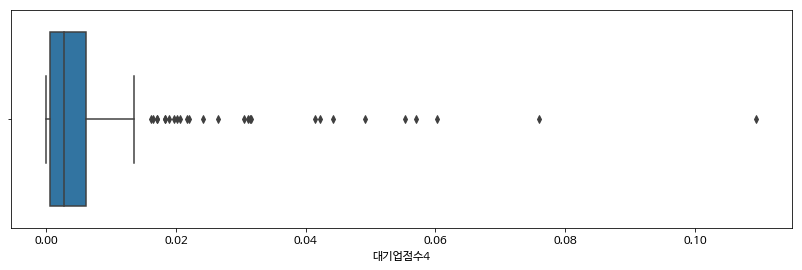

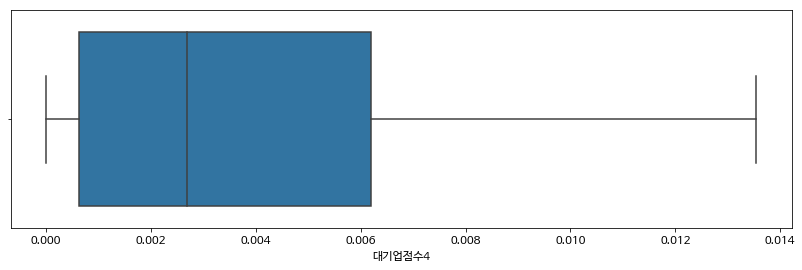

In [665]:
temp_df = check_box_plot(df, temp_df, '대기업점수4')

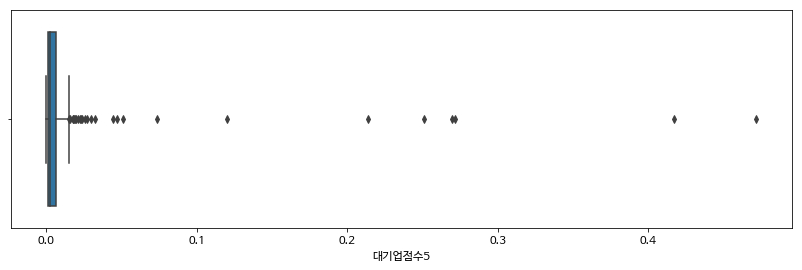

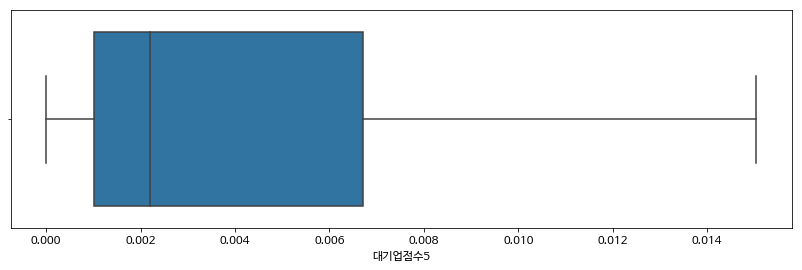

In [666]:
temp_df = check_box_plot(df, temp_df, '대기업점수5')

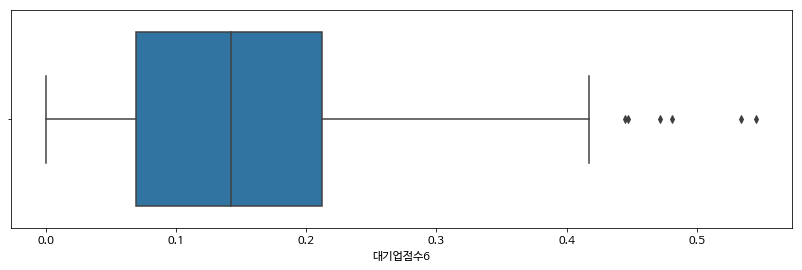

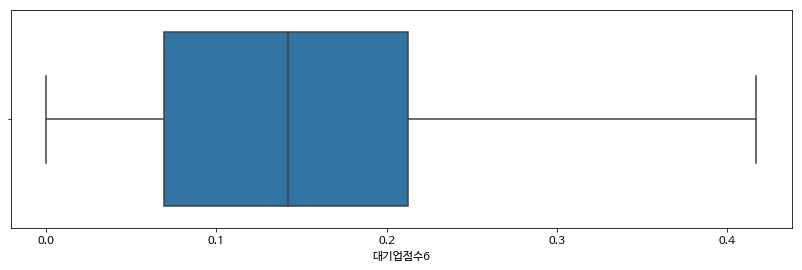

In [667]:
temp_df = check_box_plot(df, temp_df, '대기업점수6')

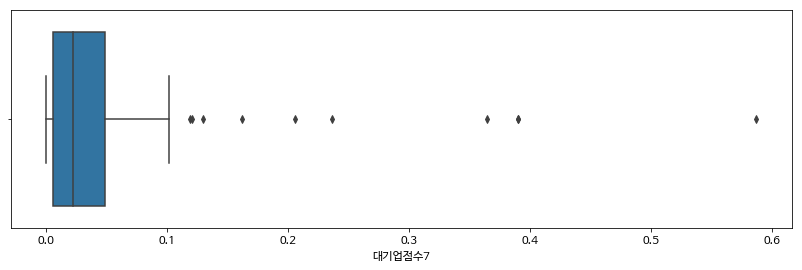

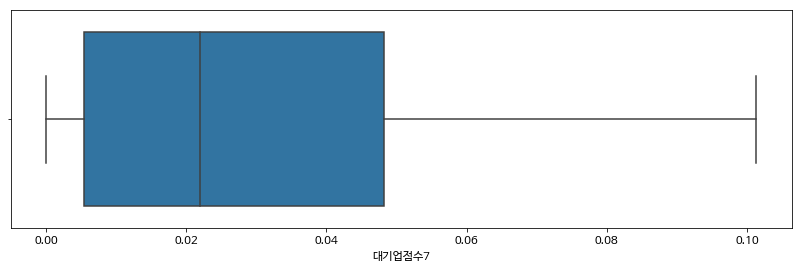

In [668]:
temp_df = check_box_plot(df, temp_df, '대기업점수7')

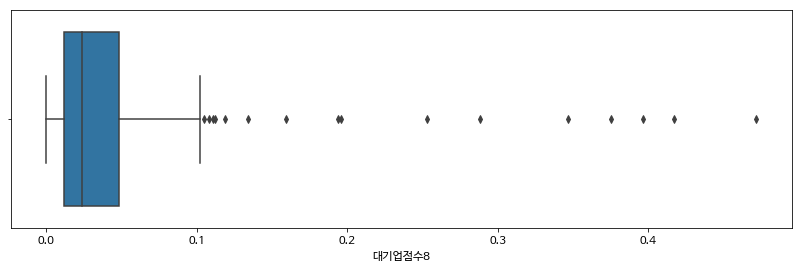

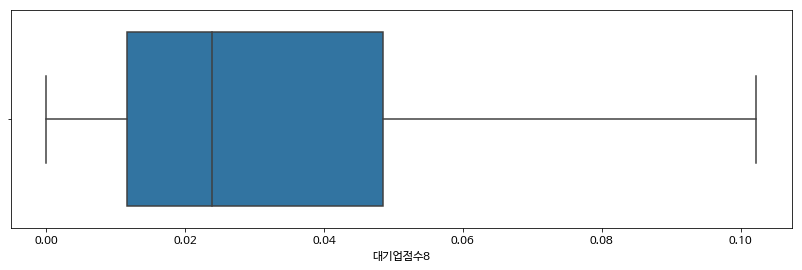

In [669]:
temp_df = check_box_plot(df, temp_df, '대기업점수8')

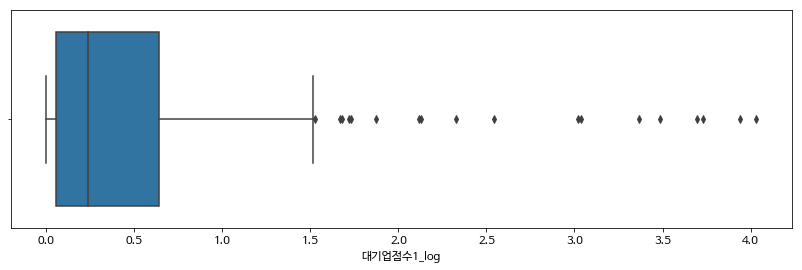

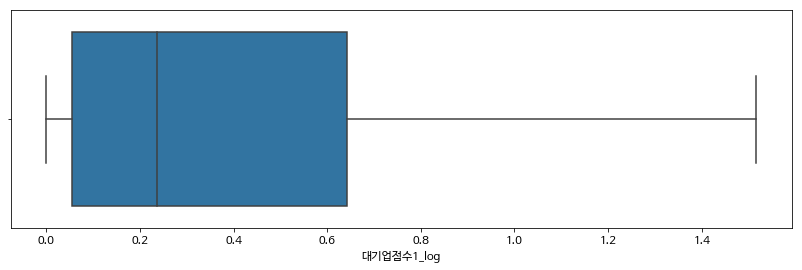

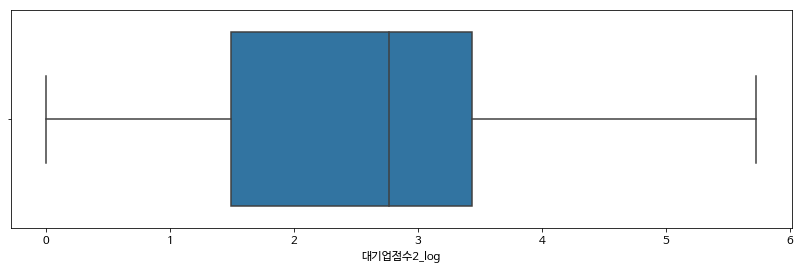

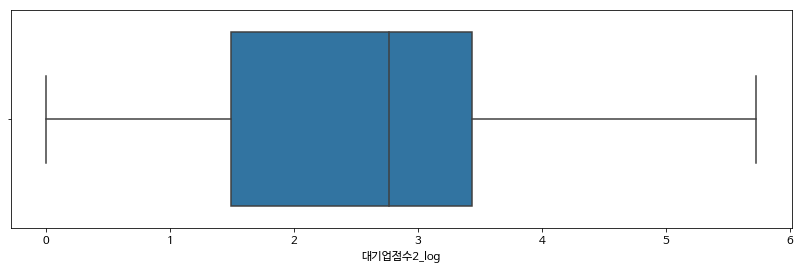

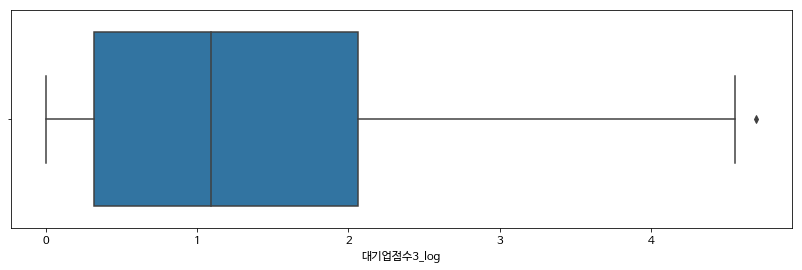

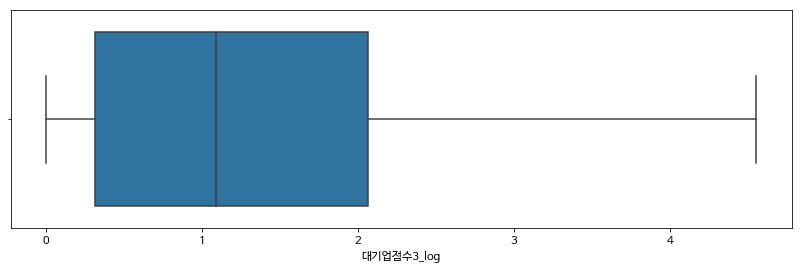

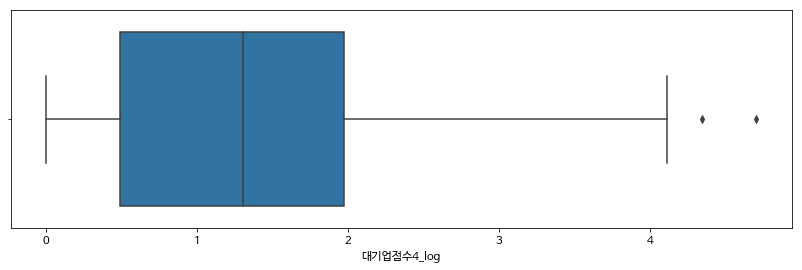

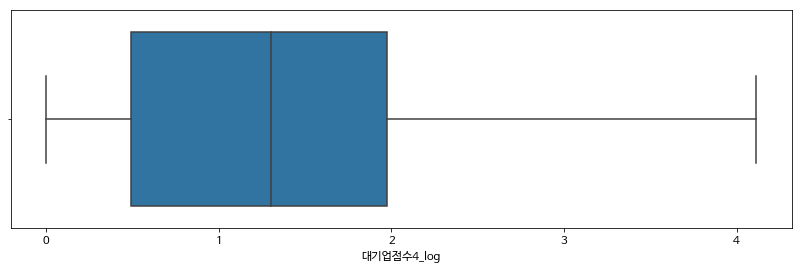

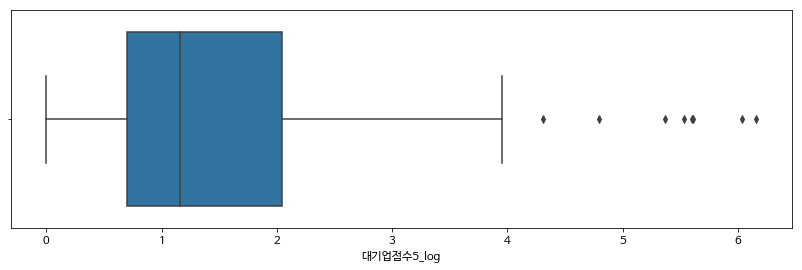

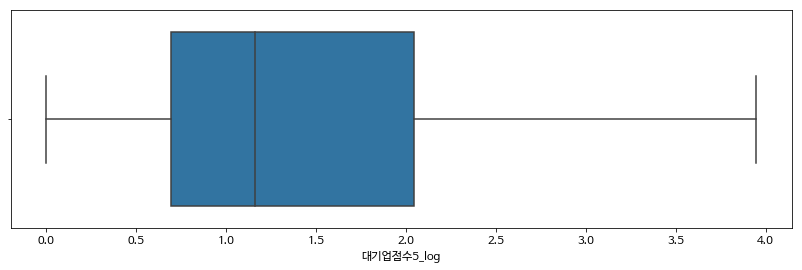

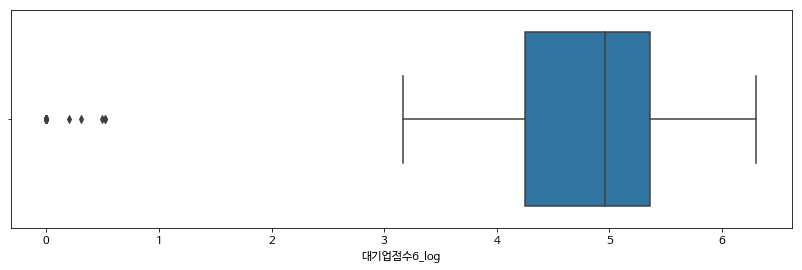

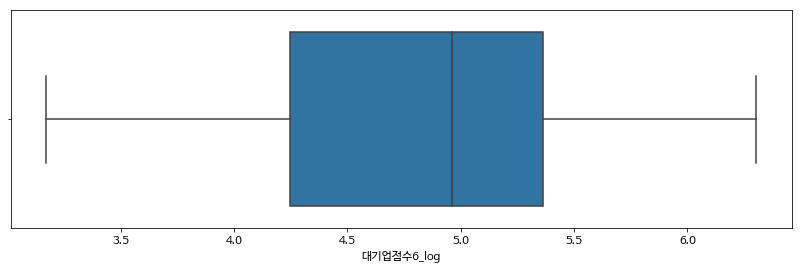

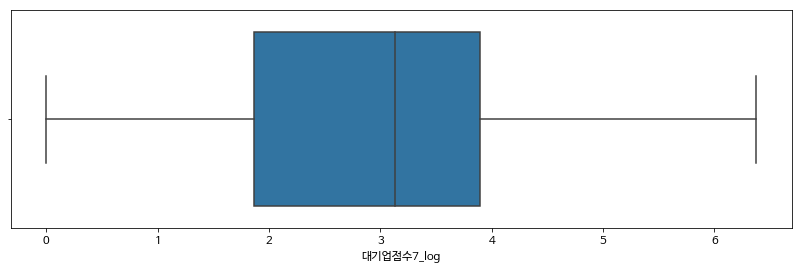

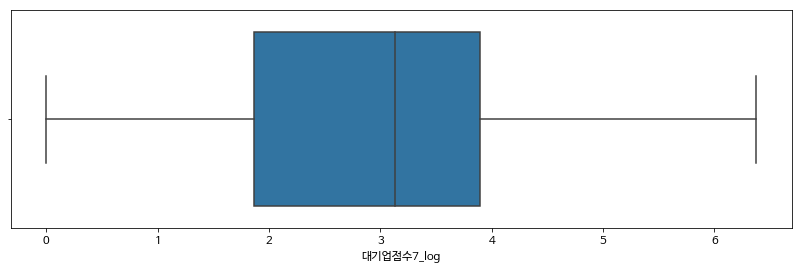

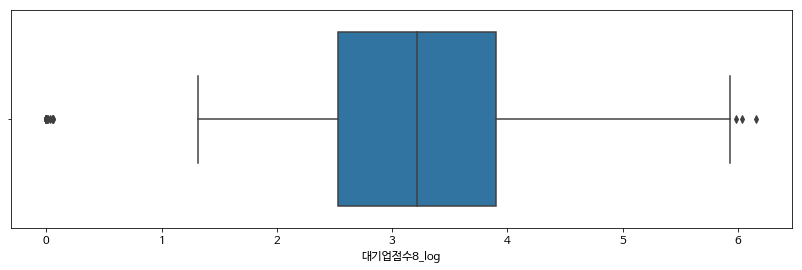

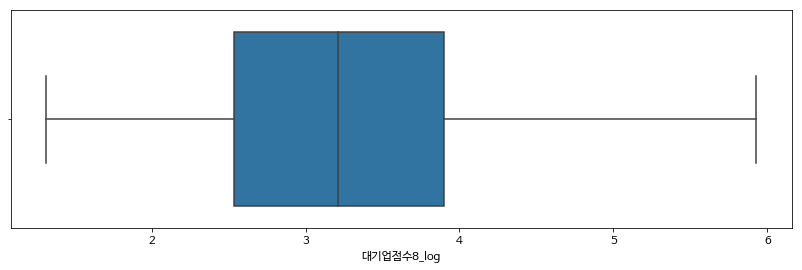

In [717]:
for i in range(1,9):
    col_name = f'대기업점수{i}'
    new_col_name = f'대기업점수{i}_log'
#     print(col_name, df[col_name])
    df[new_col_name] = df[col_name].map(lambda x:np.log(x*1000+1))
    temp_df[new_col_name] = df[col_name].map(lambda x:np.log(x*1000+1))
    temp_df = check_box_plot(df, temp_df, new_col_name)

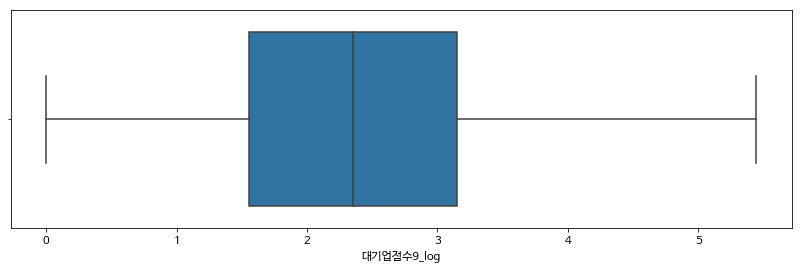

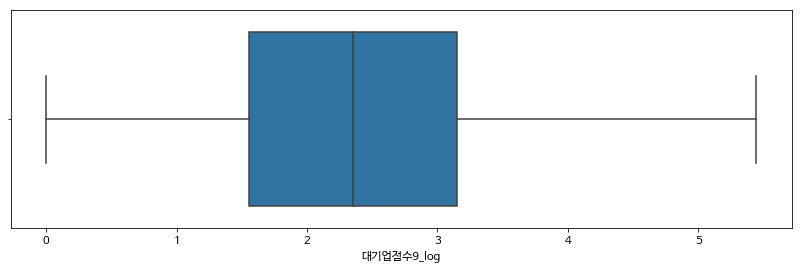

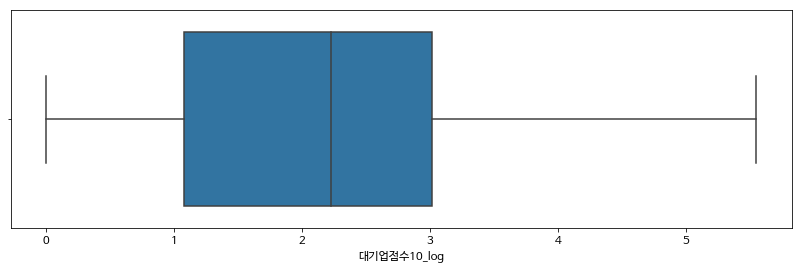

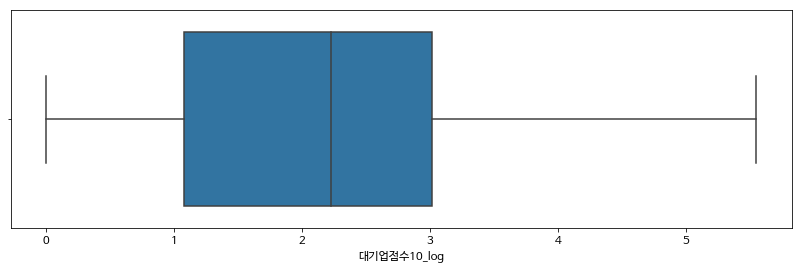

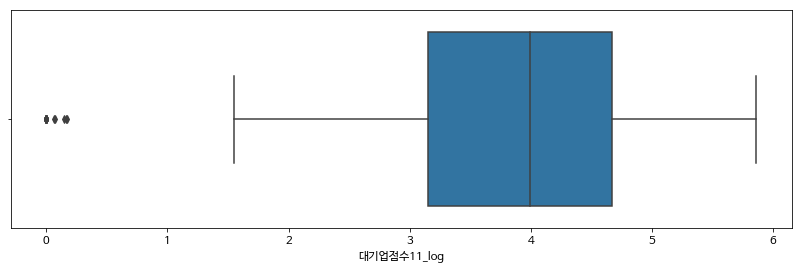

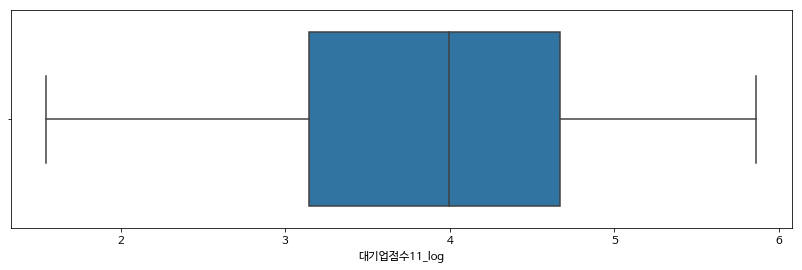

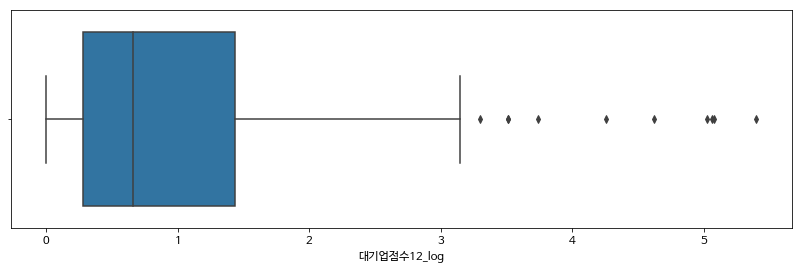

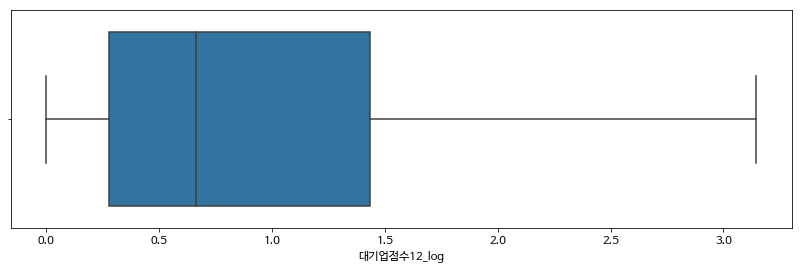

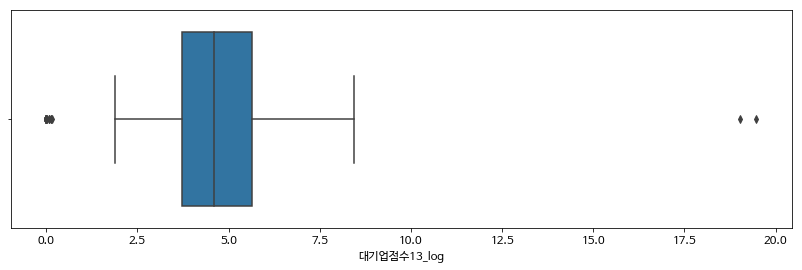

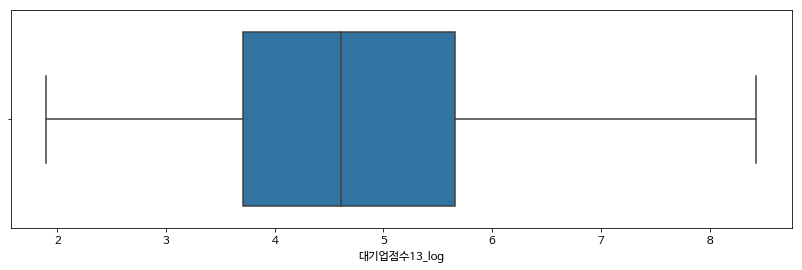

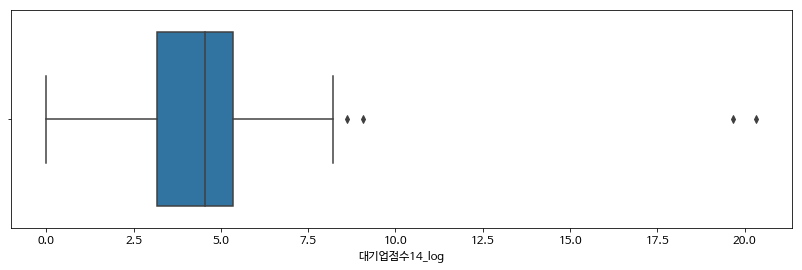

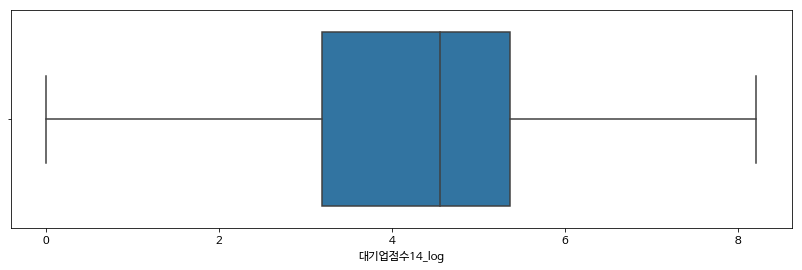

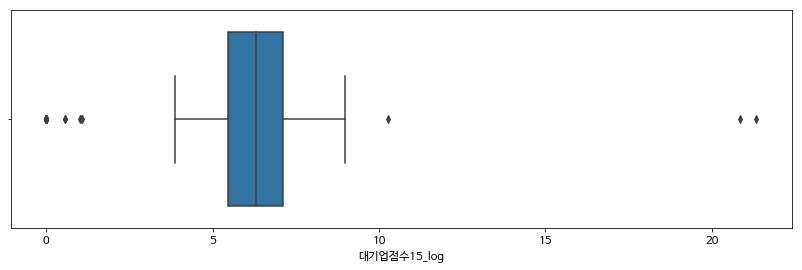

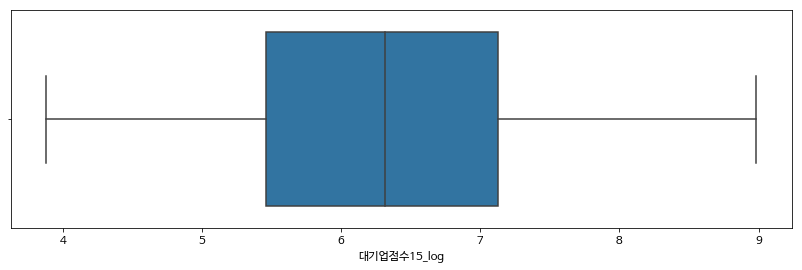

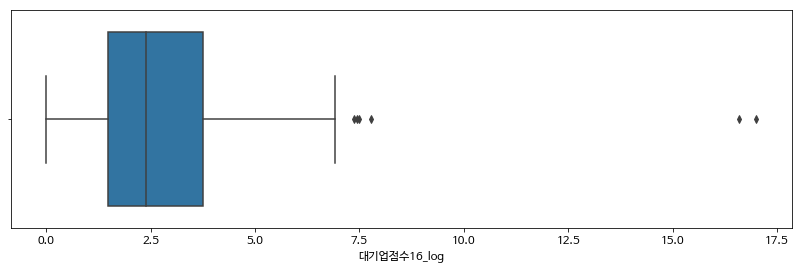

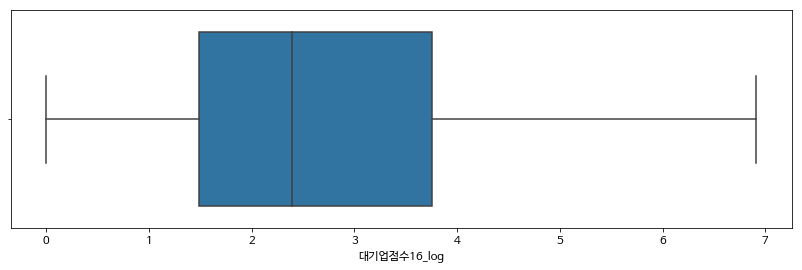

In [734]:
for i in range(9,17):
    col_name = f'대기업점수{i}'
    new_col_name = f'대기업점수{i}_log'
#     print(col_name, df[col_name])
    df[new_col_name] = df[col_name].map(lambda x:np.log(x*1000+1))
    temp_df[new_col_name] = df[col_name].map(lambda x:np.log(x*1000+1))
    temp_df = check_box_plot(df, temp_df, new_col_name)

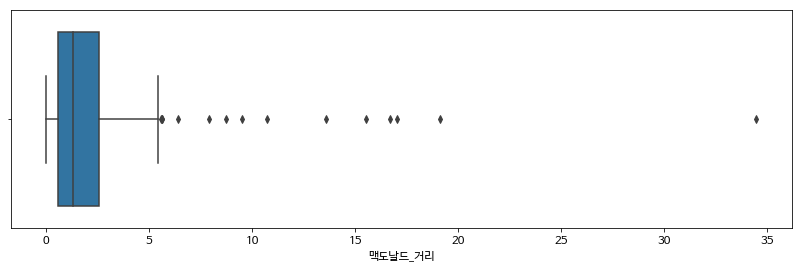

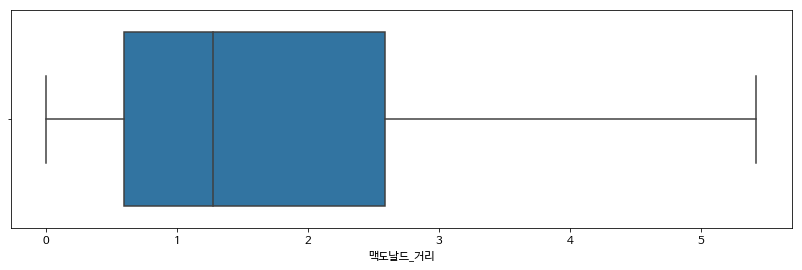

In [737]:
temp_df = check_box_plot(df, temp_df, '맥도날드_거리')

In [738]:
df['맥도날드_거리_log'] = df['맥도날드_거리'].map(lambda x:np.log(x+1))
temp_df['맥도날드_거리_log'] = df['맥도날드_거리'].map(lambda x:np.log(x+1))

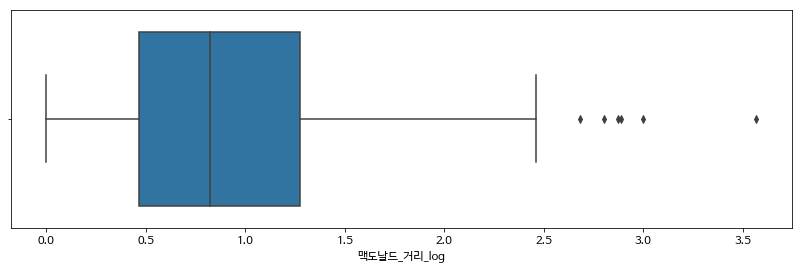

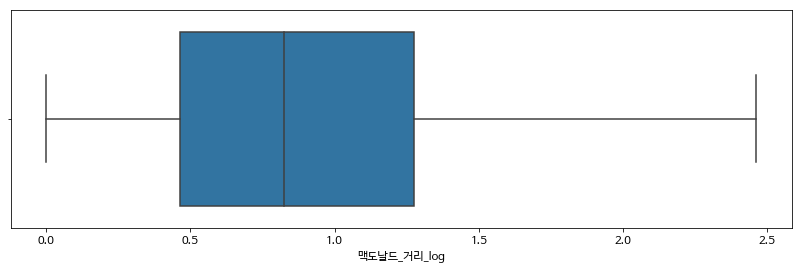

In [739]:
temp_df = check_box_plot(df, temp_df, '맥도날드_거리_log')

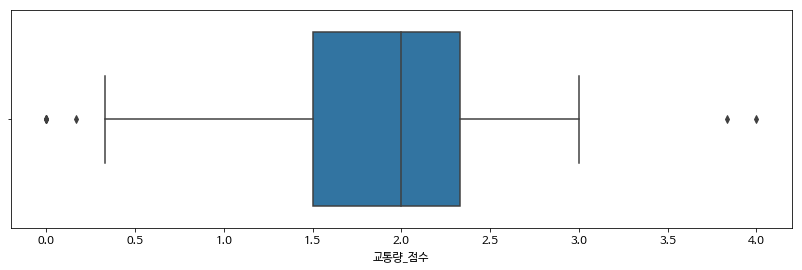

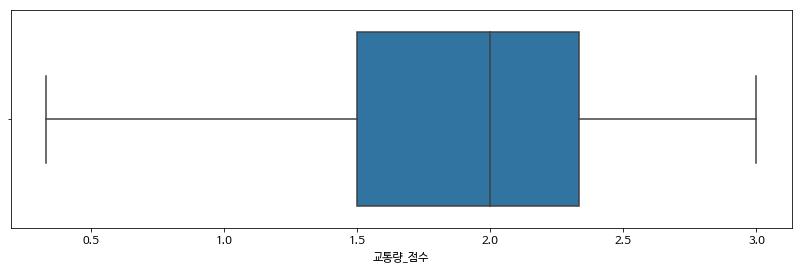

In [741]:
temp_df = check_box_plot(df, temp_df, '교통량_점수')

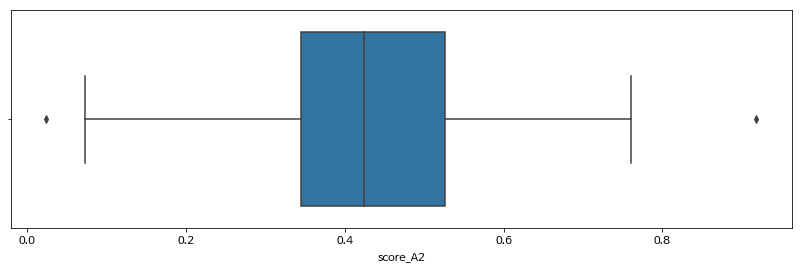

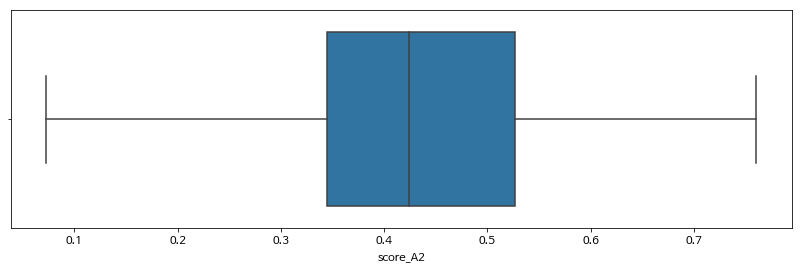

In [742]:
temp_df = check_box_plot(df, temp_df, 'score_A2')

In [744]:
temp_df.to_excel('../starbucksDT/postprocess/200717_feature_addeddata.xlsx', index=False)

In [783]:
traffic_info = pd.read_excel('/Users/dhkim/Downloads/Starbucks_DT_Traffics_postprocessed.xlsx')

In [785]:
traffic_info['평일점수'] = traffic_info.apply(lambda row:(row['score1'] + row['score2']+ row['score3'])/3.,axis=1)
traffic_info['주말점수'] = traffic_info.apply(lambda row:(row['score4'] + row['score5']+ row['score6'])/3.,axis=1)
traffic_info['아침점수'] = traffic_info.apply(lambda row:(row['score1'] + row['score4'])/2.,axis=1)
traffic_info['점심점수'] = traffic_info.apply(lambda row:(row['score2'] + row['score5'])/2.,axis=1)
traffic_info['저녁점수'] = traffic_info.apply(lambda row:(row['score3'] + row['score6'])/2.,axis=1)

In [792]:
for col in traffic_info.columns[-5:]:
    starbucks_feature_drop_smallreview[col] = 0
    starbucks_feature_smallreview[col] = 0

In [786]:
starbucks_feature_drop_smallreview = pd.read_excel('../starbucksDT/postprocess/Starbucks_Total_Feature_post_200713_최근지점제외_scoreA2_before_norm.xlsx')
starbucks_feature_smallreview = pd.read_excel('../starbucksDT/postprocess/Starbucks_Total_Feature_post_200713_최근지점만_scoreA2_before_norm.xlsx')

In [793]:

for idx, row in traffic_info.iterrows():
    if row['지점명'] in starbucks_feature_drop_smallreview['지점명'].values:
        for col in traffic_info.columns[-5:]:
            starbucks_feature_drop_smallreview.loc[starbucks_feature_drop_smallreview['지점명']==row['지점명'], col] = row[col]
    elif row['지점명'] in starbucks_feature_smallreview['지점명'].values:
        for col in traffic_info.columns[-5:]:
            starbucks_feature_smallreview.loc[starbucks_feature_smallreview['지점명']==row['지점명'], col] = row[col]

In [795]:
starbucks_feature_drop_smallreview = starbucks_feature_drop_smallreview.rename(columns={'평일점수':'교통량 점수 평일',
                                                                                       '주말점수':'교통량 점수 주말',
                                                                                       '아침점수':'교통량 점수 아침',
                                                                                       '점심점수':'교통량 점수 점심',
                                                                                       '저녁점수':'교통량 점수 저녁'})
starbucks_feature_smallreview = starbucks_feature_smallreview.rename(columns={'평일점수':'교통량 점수 평일',
                                                                                       '주말점수':'교통량 점수 주말',
                                                                                       '아침점수':'교통량 점수 아침',
                                                                                       '점심점수':'교통량 점수 점심',
                                                                                       '저녁점수':'교통량 점수 저녁'})

In [799]:
df = df.sort_values('지점명').reset_index(drop=True)
temp_df = temp_df.sort_values('지점명').reset_index(drop=True)

In [807]:
'_'.join('교통량 점수 평일'.split(' '))

'교통량_점수_평일'

In [800]:
starbucks_feature_drop_smallreview = starbucks_feature_drop_smallreview.sort_values('지점명').reset_index(drop=True)

In [809]:
for col in starbucks_feature_drop_smallreview.columns[-5:]:
    new_col = '_'.join(col.split(' '))
    df[new_col] = starbucks_feature_drop_smallreview[col]
    temp_df[new_col] = starbucks_feature_drop_smallreview[col]

In [797]:
#starbucks_feature_drop_smallreview.to_excel('../starbucksDT/postprocess/Starbucks_Total_Feature_post_200717_최근지점제외_scoreA2_before_norm_교통량추가.xlsx', index=False)
#starbucks_feature_smallreview.to_excel('../starbucksDT/postprocess/Starbucks_Total_Feature_post_200717_최근지점만_scoreA2_before_norm_교통량추가.xlsx', index=False)

/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/matplotlib-3.0.2-py3.7-macosx-10.15-x86_64.egg/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


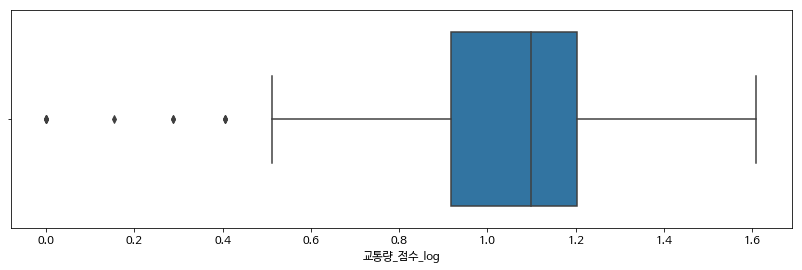

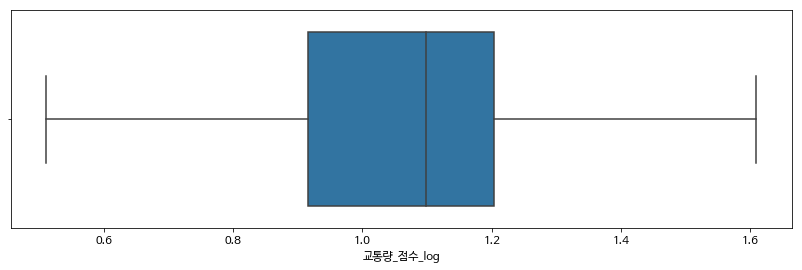

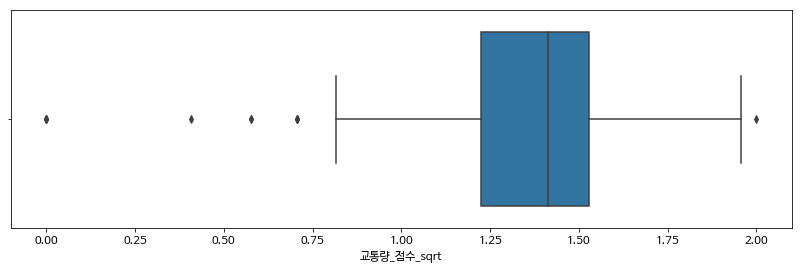

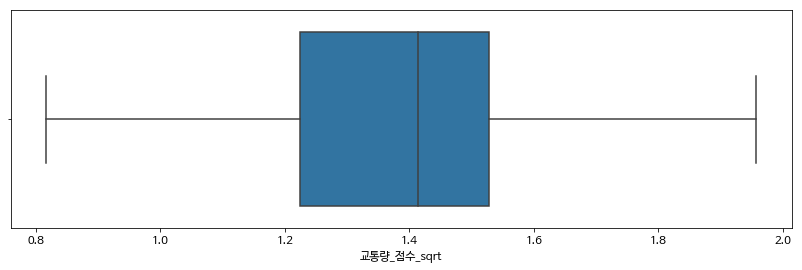

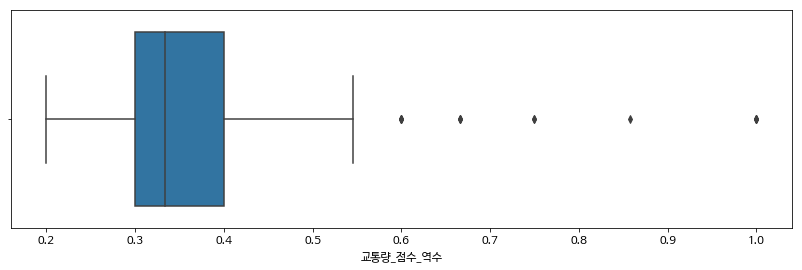

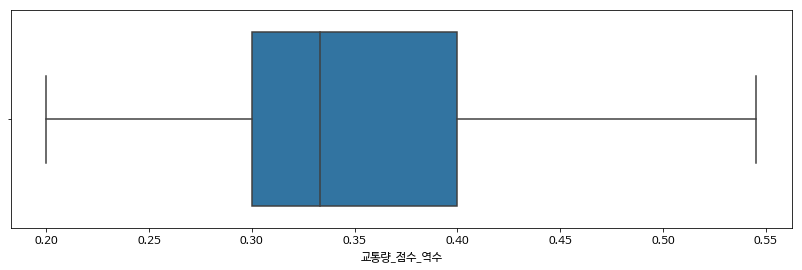

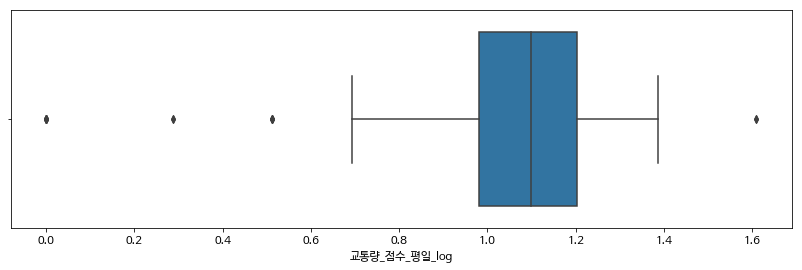

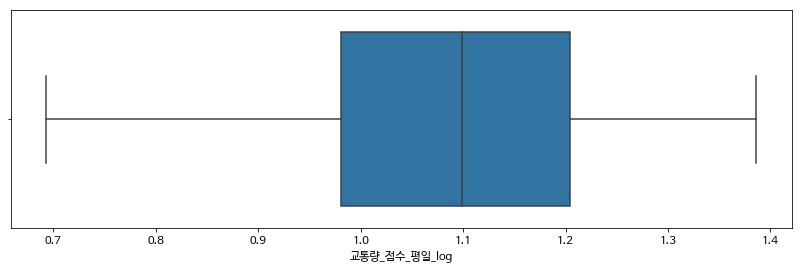

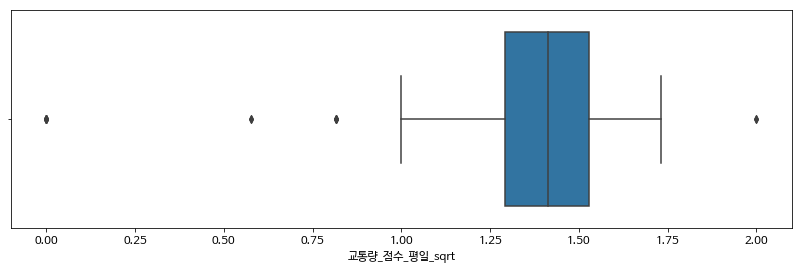

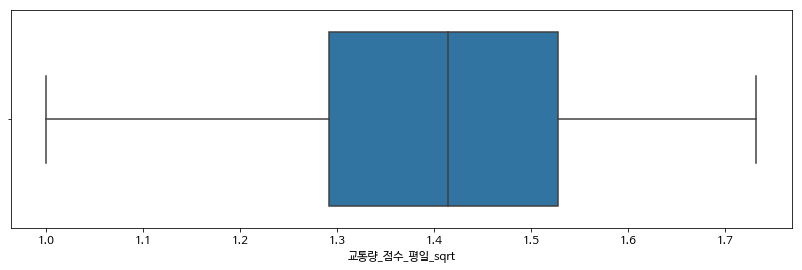

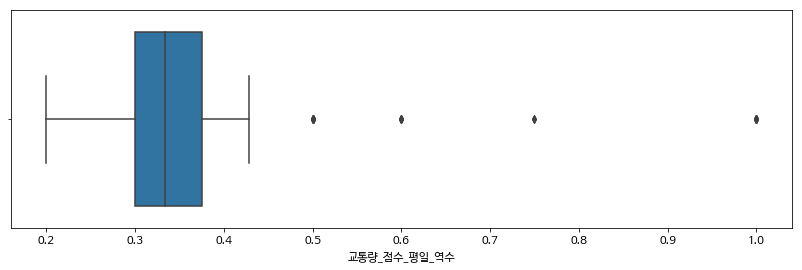

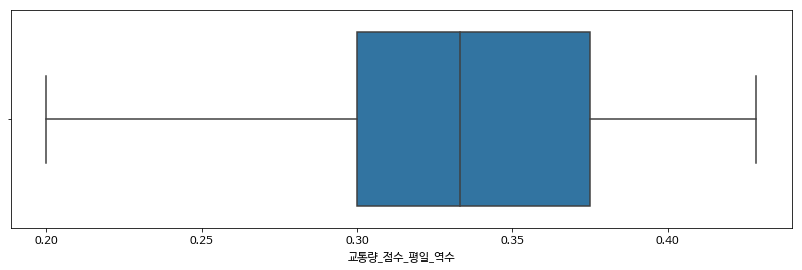

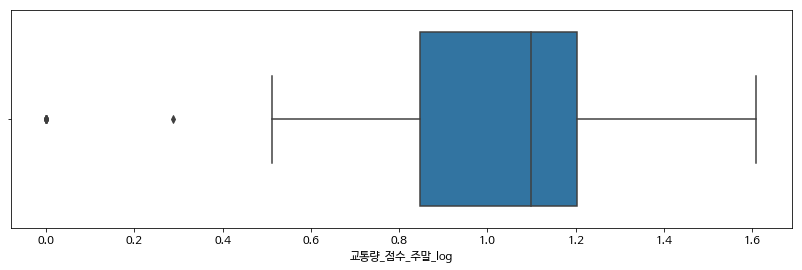

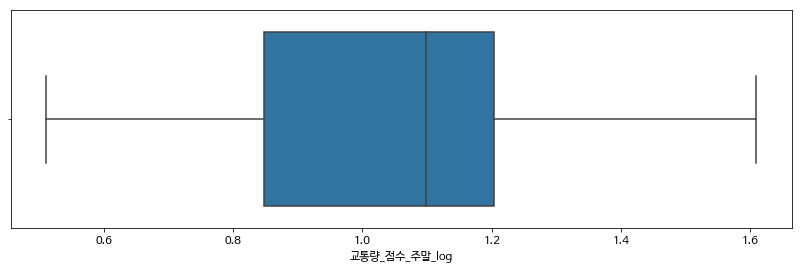

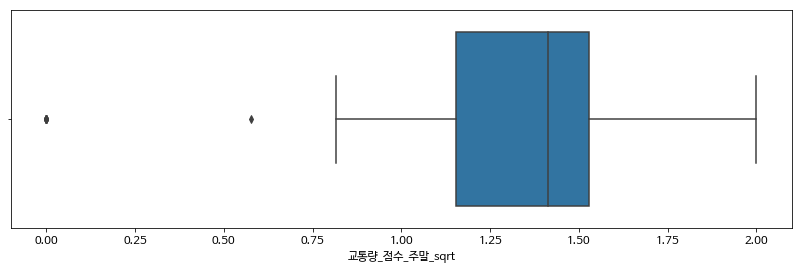

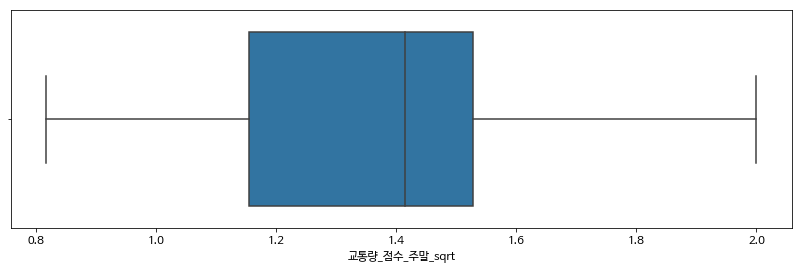

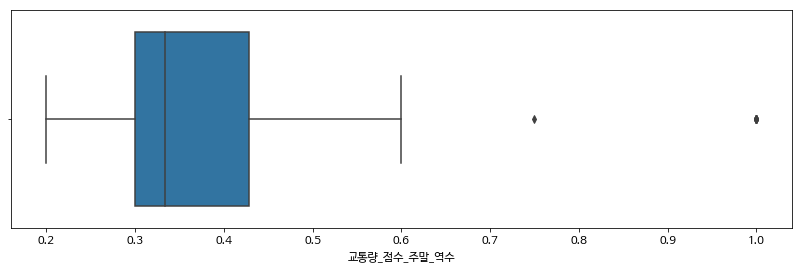

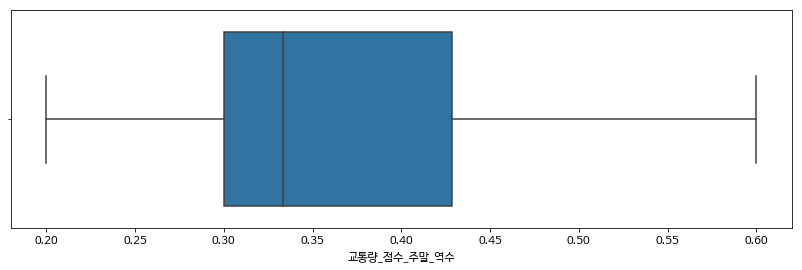

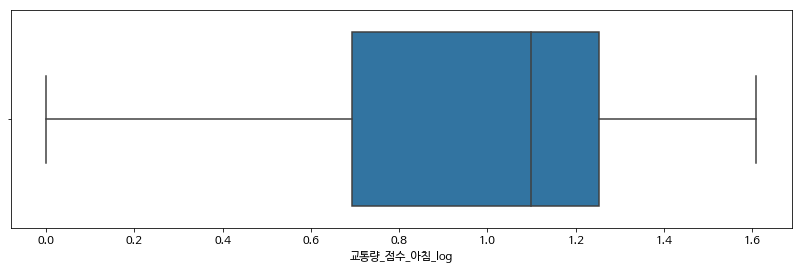

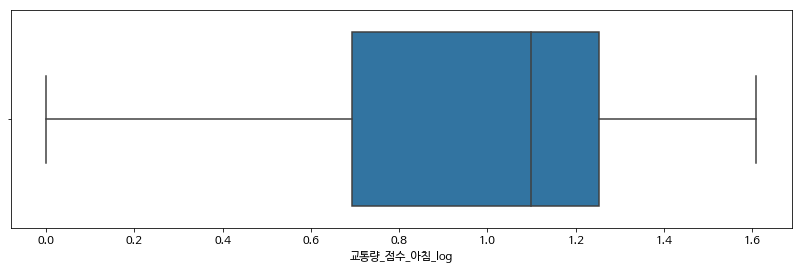

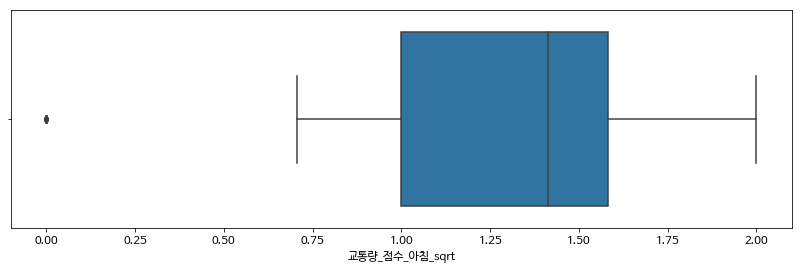

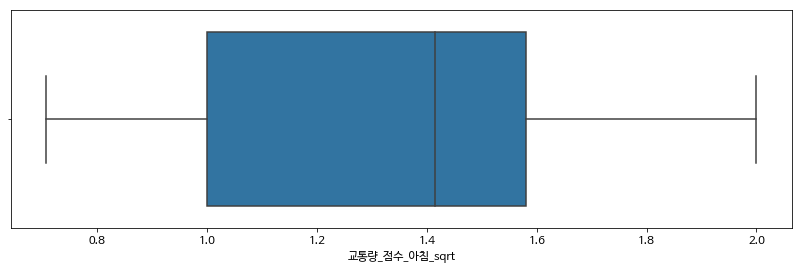

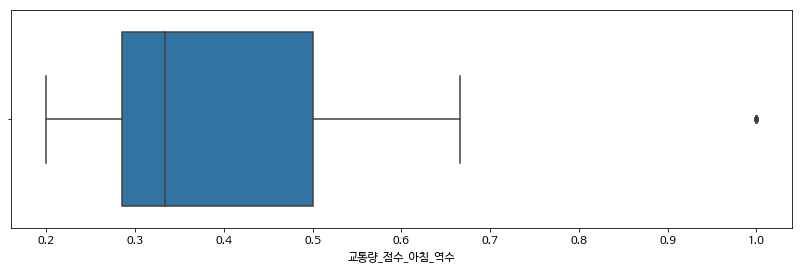

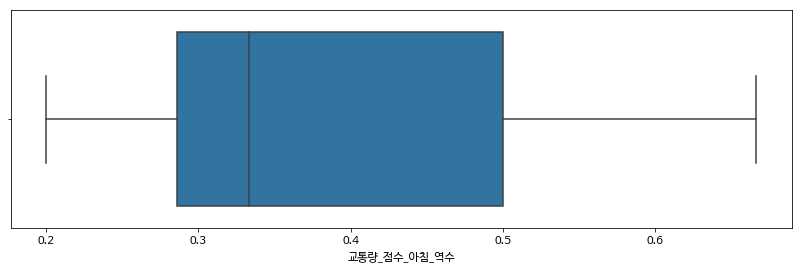

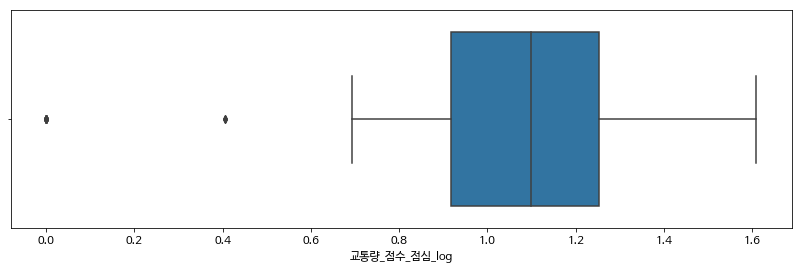

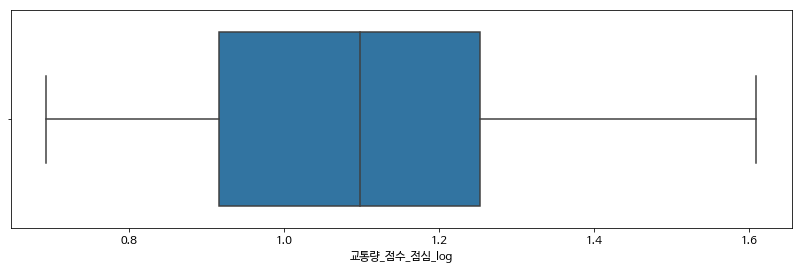

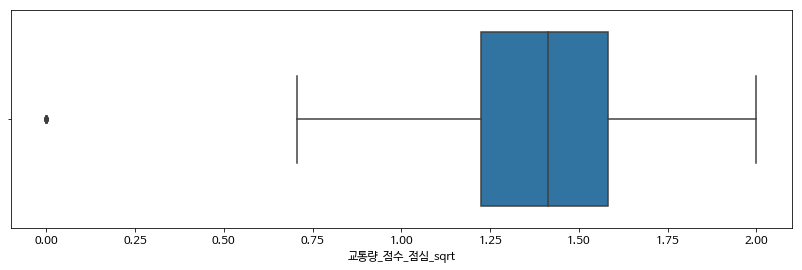

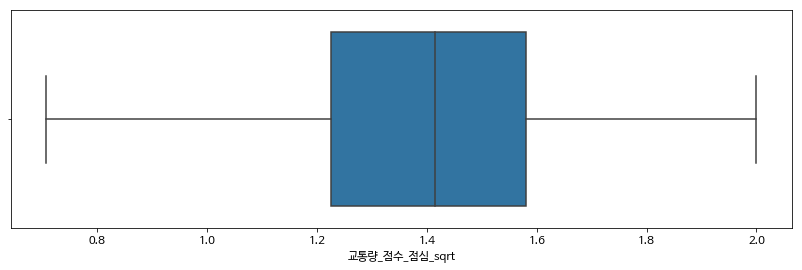

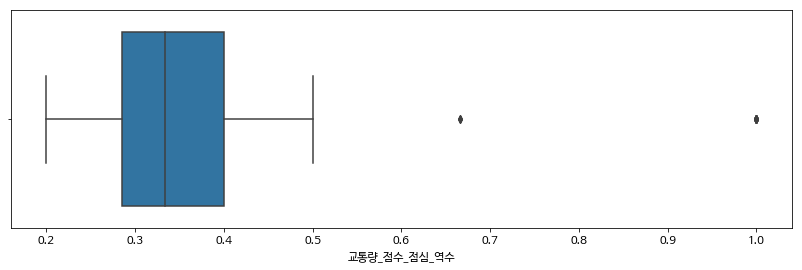

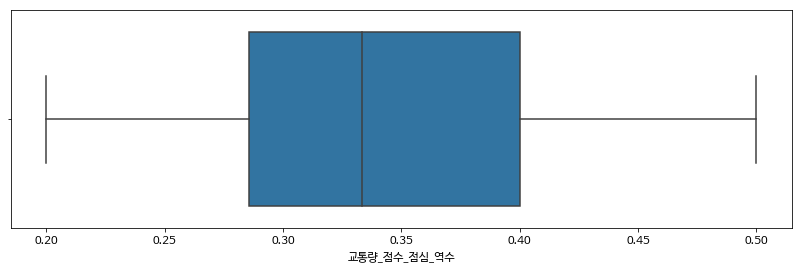

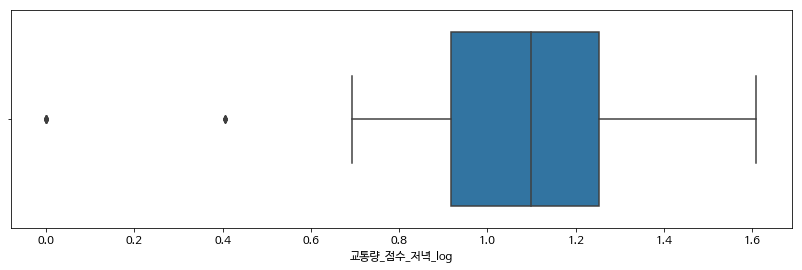

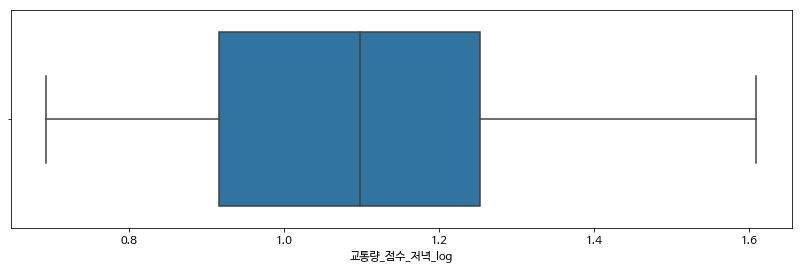

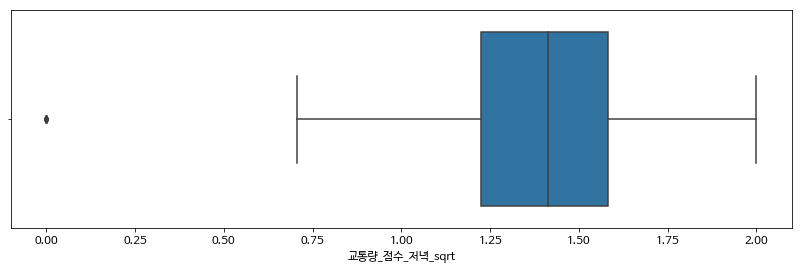

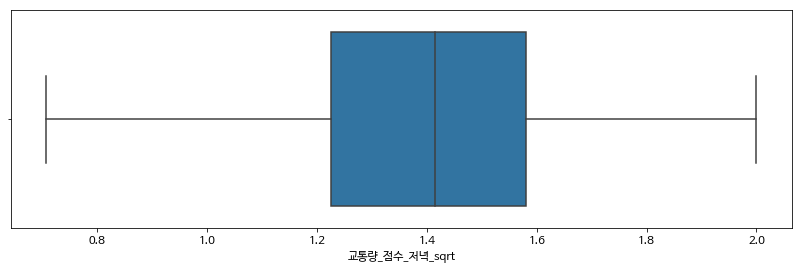

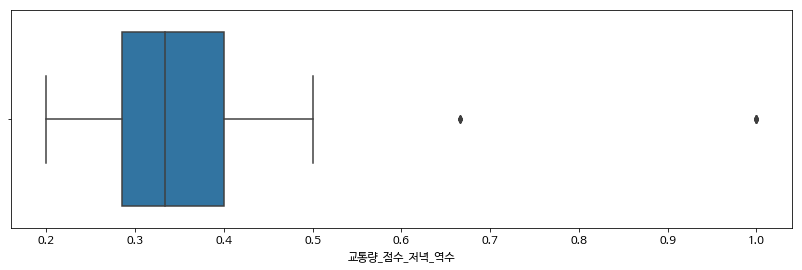

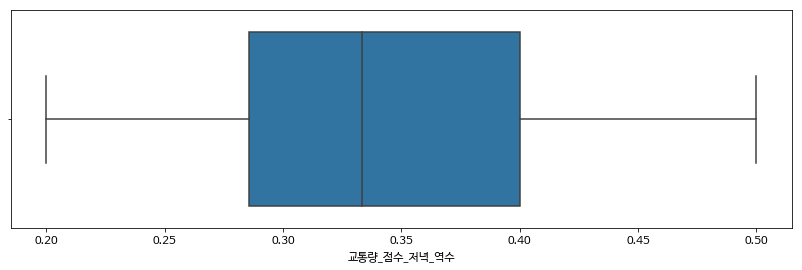

In [857]:
for col in ['교통량_점수'] + list(df.columns[-5:]):
    new_col_log = col+'_log'
    df[new_col_log] = df[col].map(lambda x:np.log(1+x))
    temp_df[new_col_log] = df[col].map(lambda x:np.log(1+x))
    temp_df = check_box_plot(df, temp_df, new_col_log)
    
    new_col_sqrt = col+'_sqrt'
    df[new_col_sqrt] = df[col].map(lambda x:np.sqrt(x))
    temp_df[new_col_sqrt] = df[col].map(lambda x:np.sqrt(x))
    temp_df = check_box_plot(df, temp_df, new_col_sqrt)
    
    new_col_reverse = col+'_역수'
    df[new_col_reverse] = df[col].map(lambda x:1/(x+1))
    temp_df[new_col_reverse] = df[col].map(lambda x:1/(1+x))
    temp_df = check_box_plot(df, temp_df, new_col_reverse)

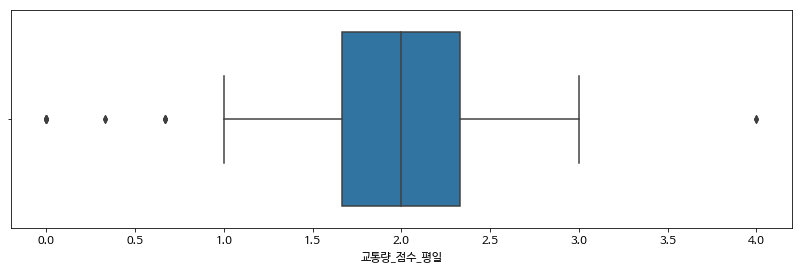

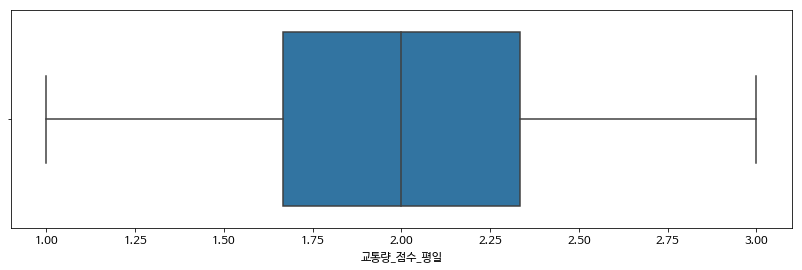

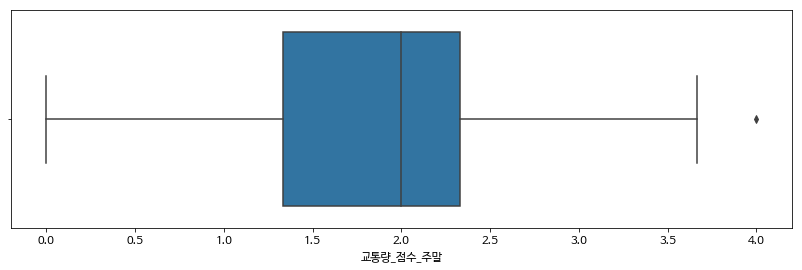

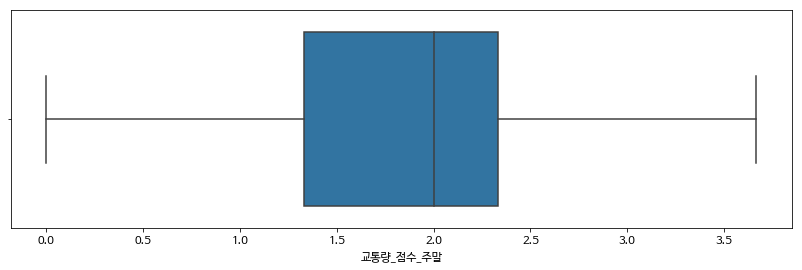

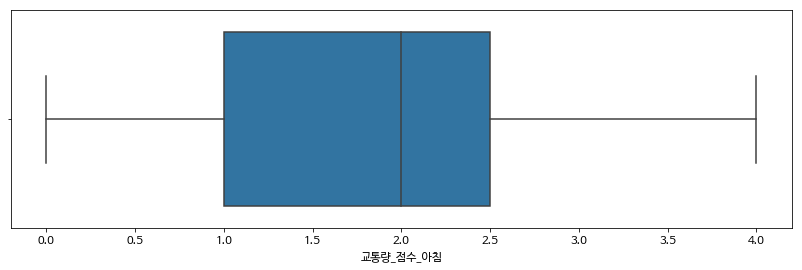

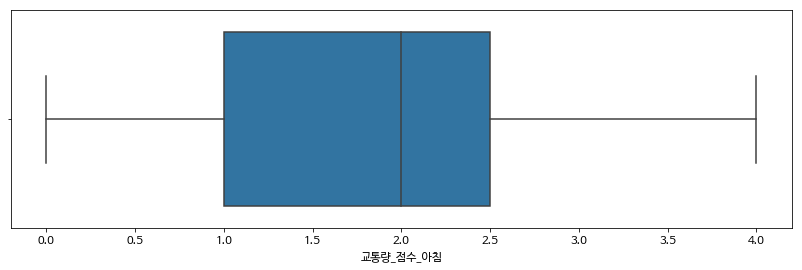

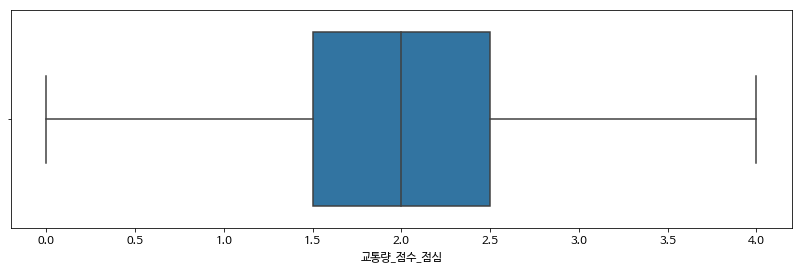

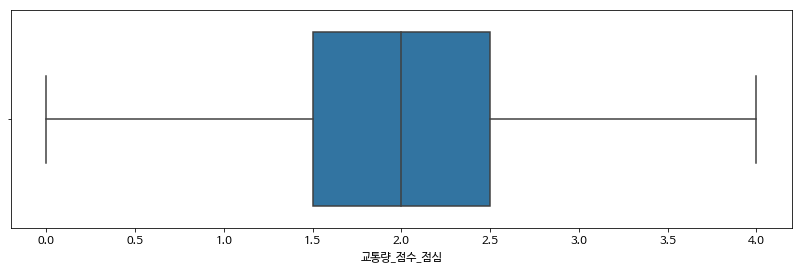

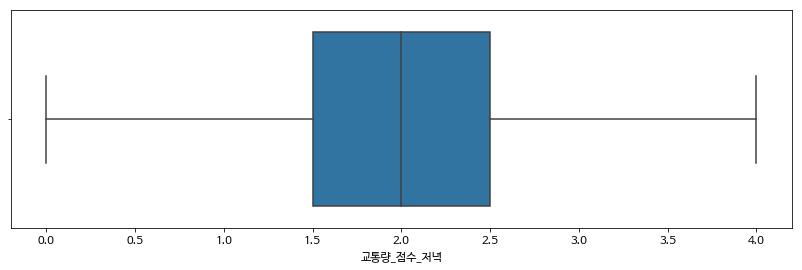

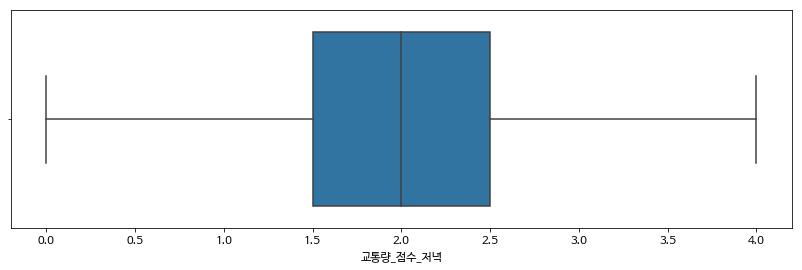

In [812]:
for col in df.columns[-5:]:
    temp_df = check_box_plot(df, temp_df, col)

In [746]:
import xai

/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/matplotlib-3.0.2-py3.7-macosx-10.15-x86_64.egg/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


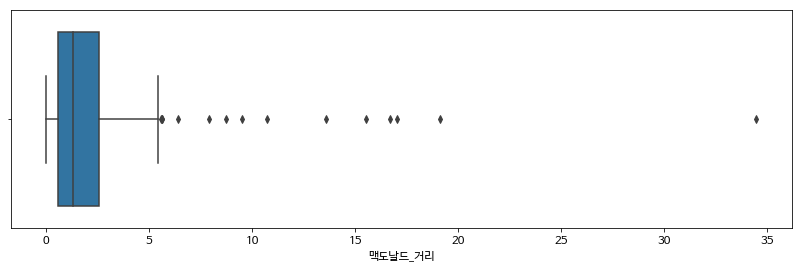

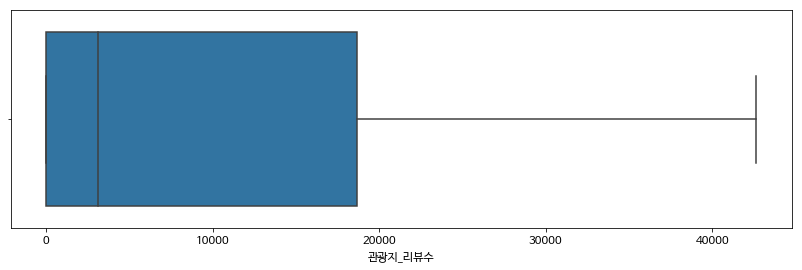

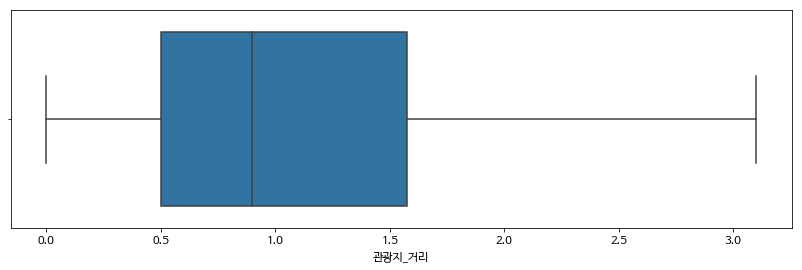

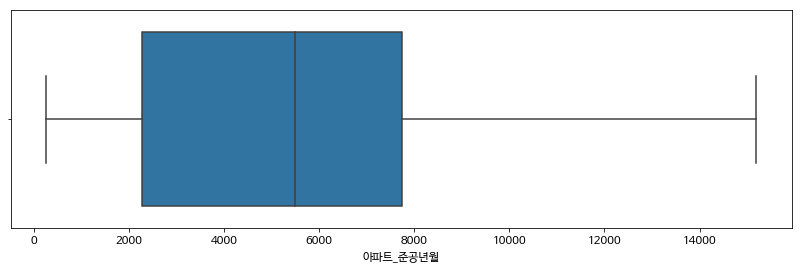

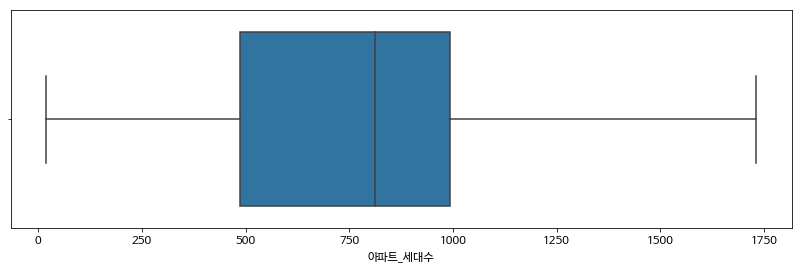

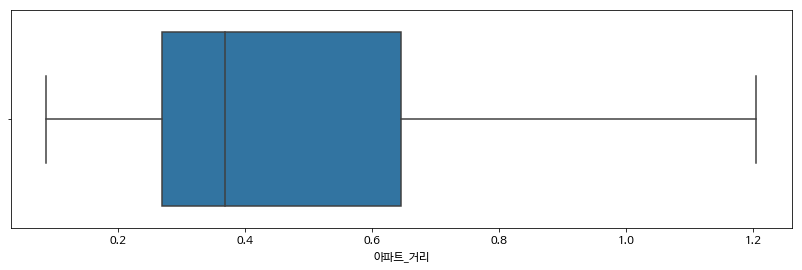

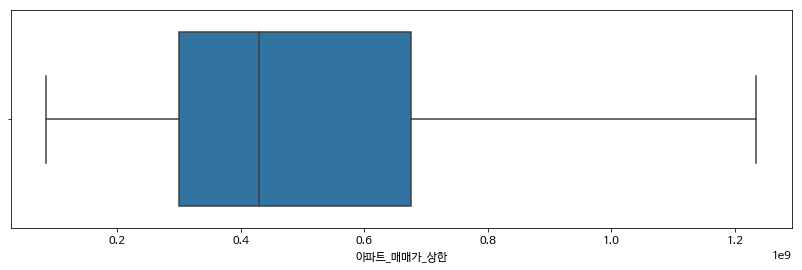

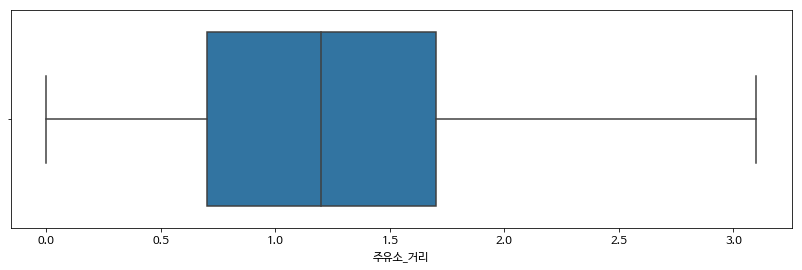

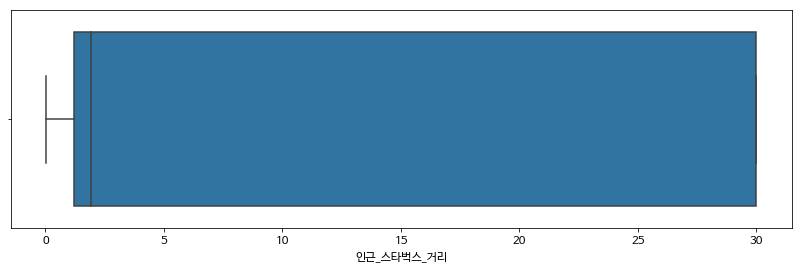

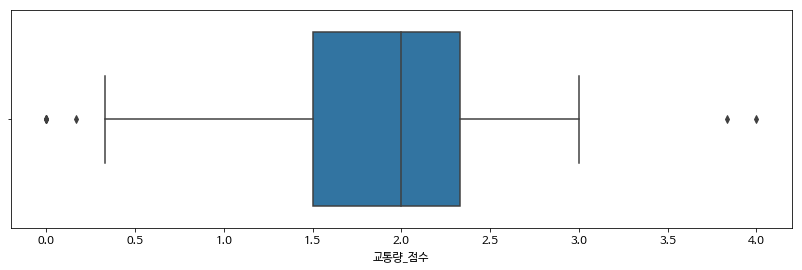

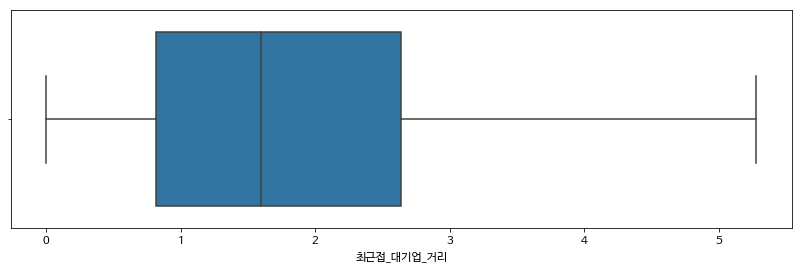

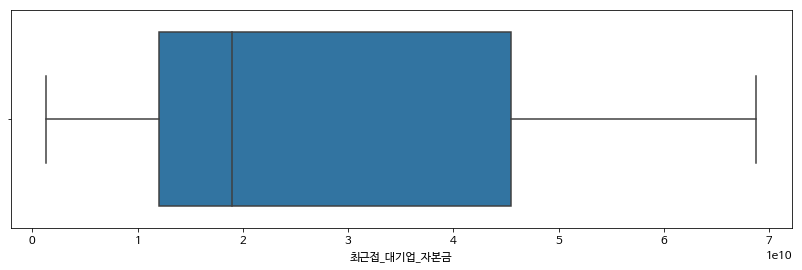

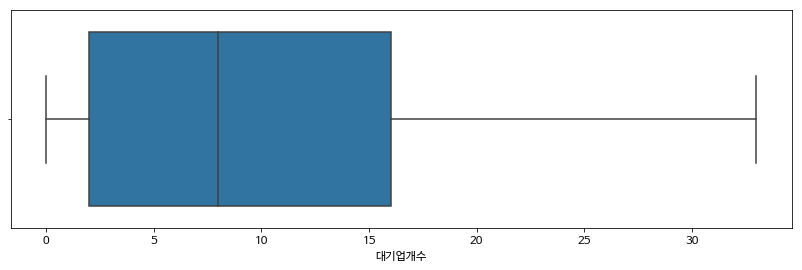

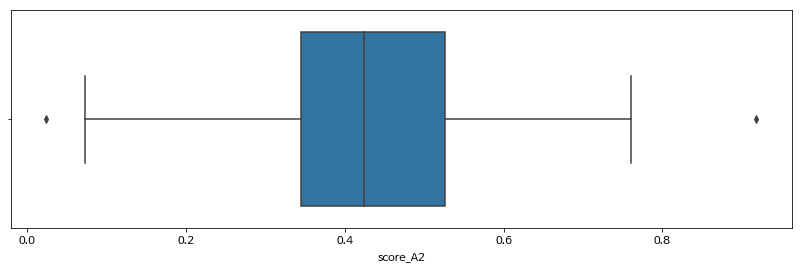

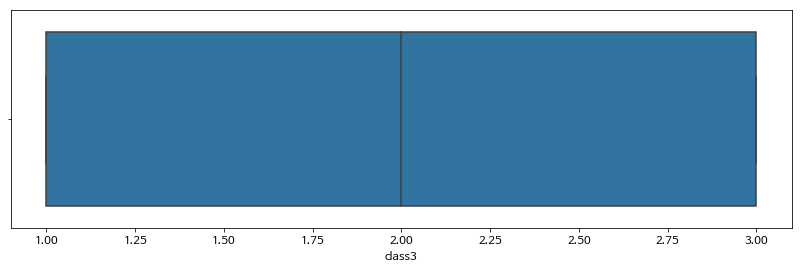

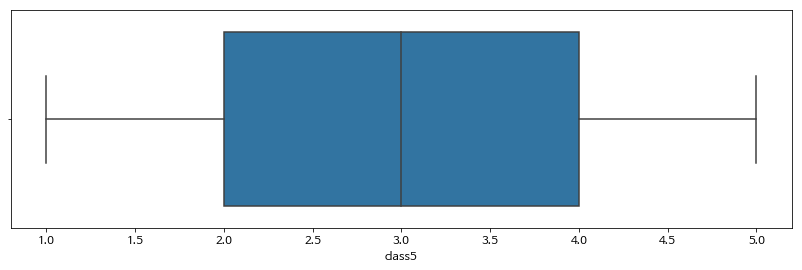

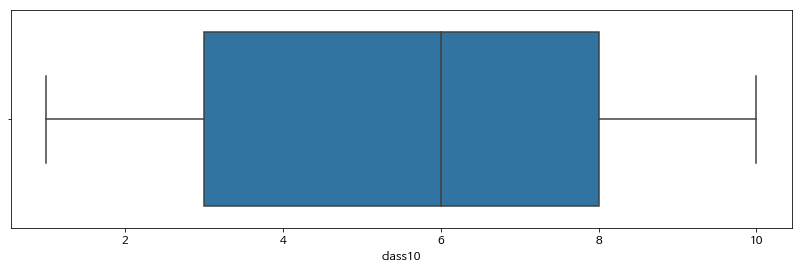

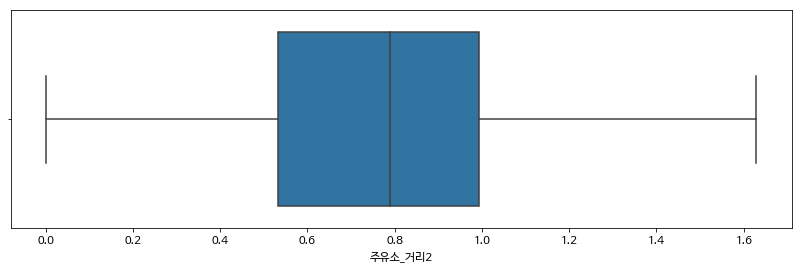

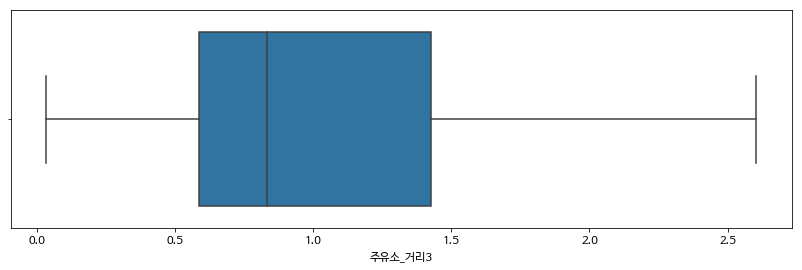

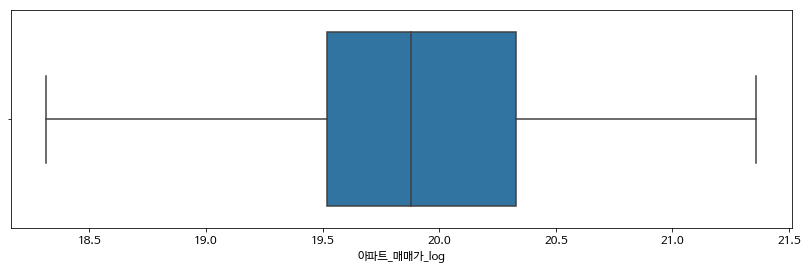

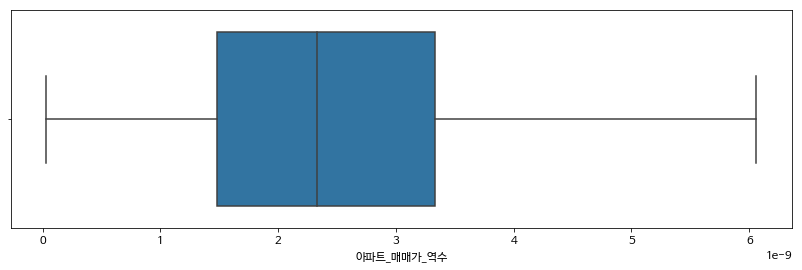

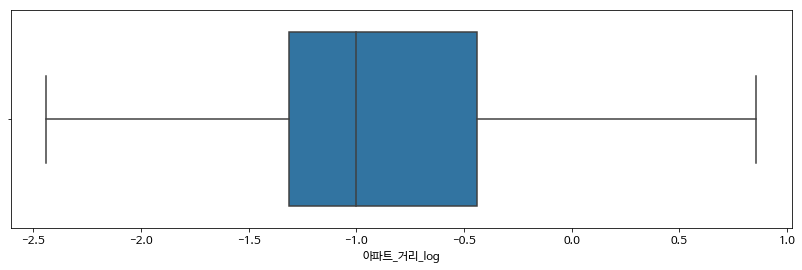

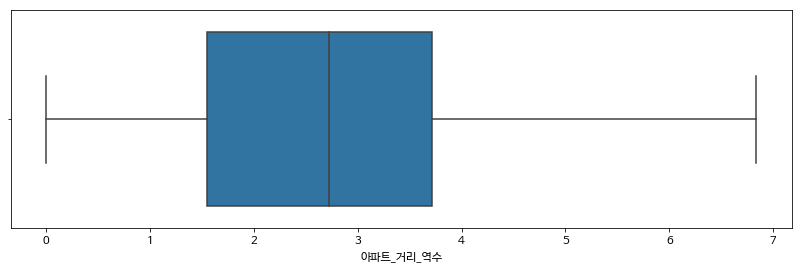

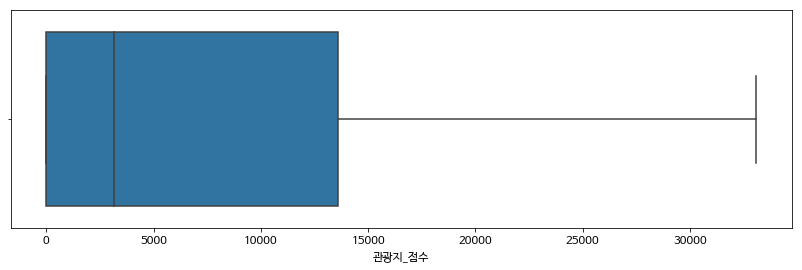

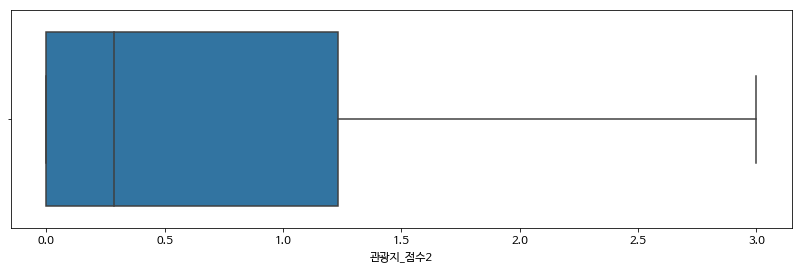

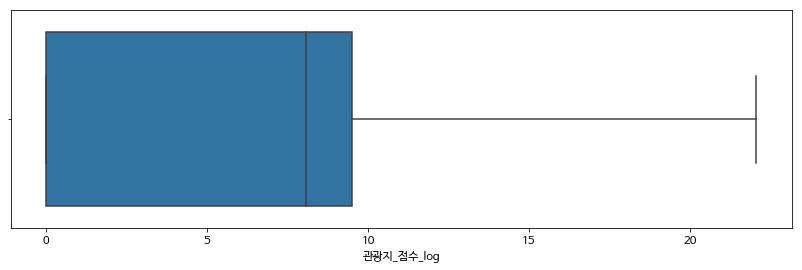

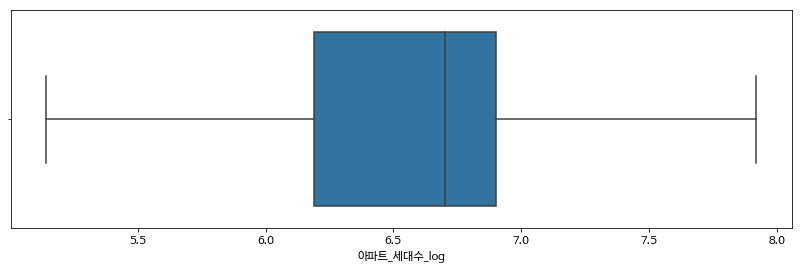

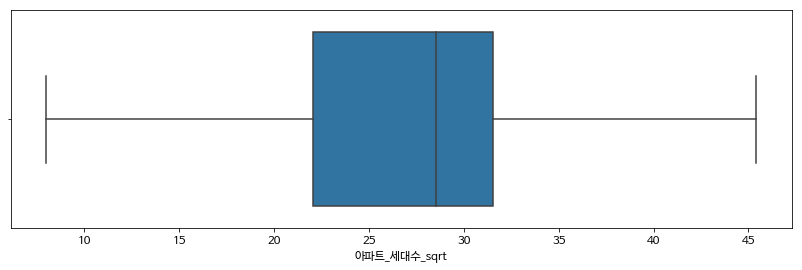

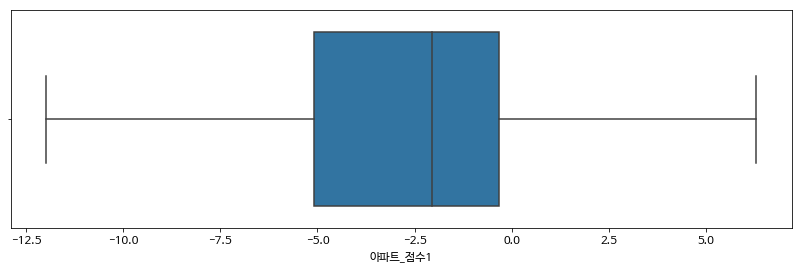

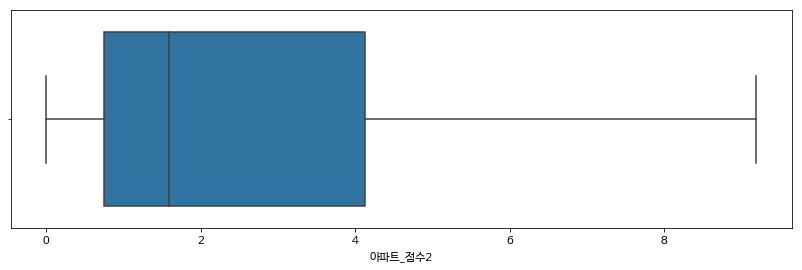

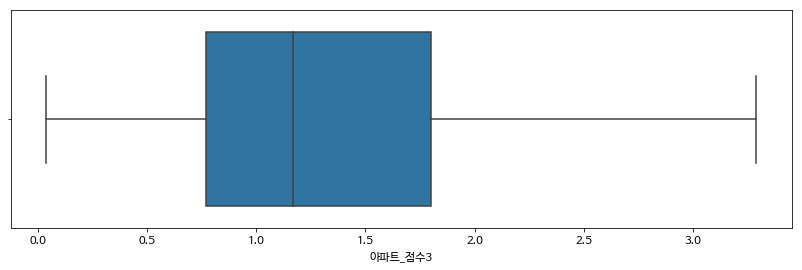

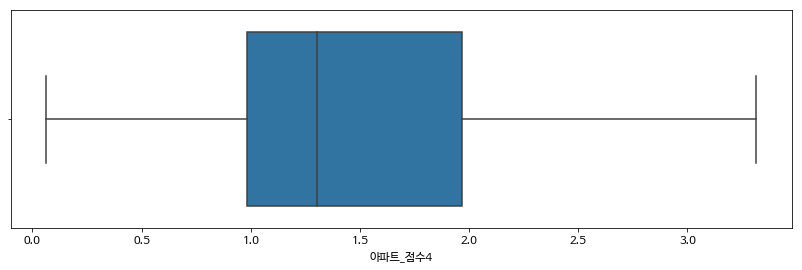

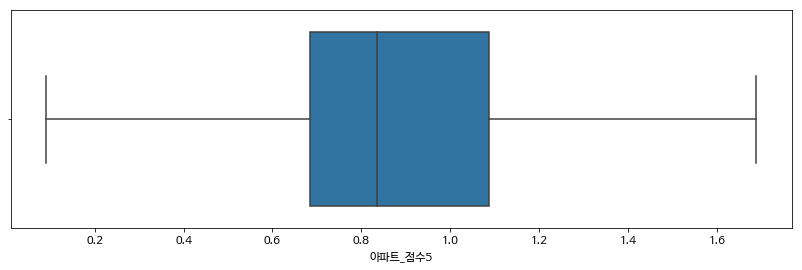

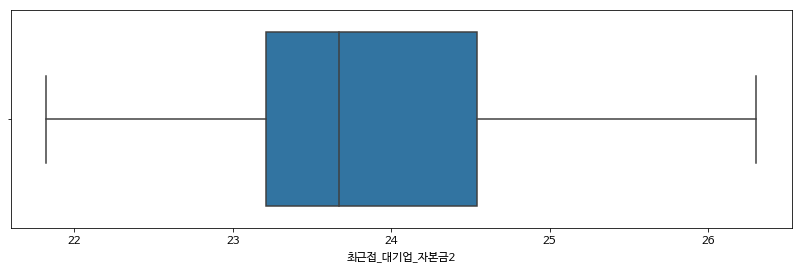

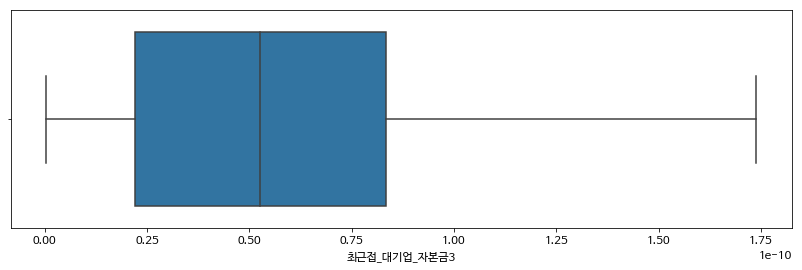

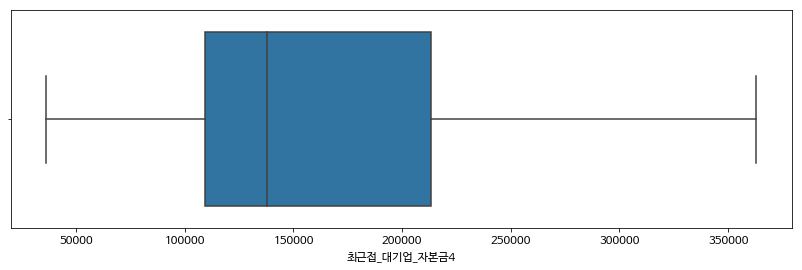

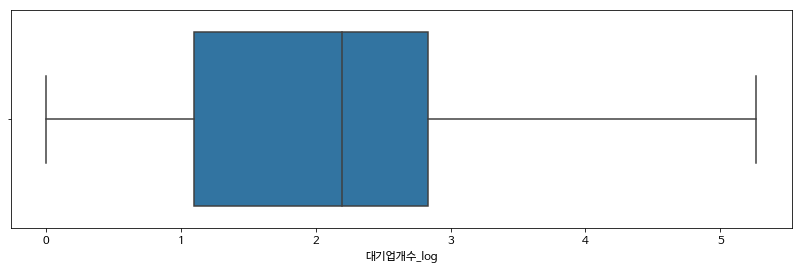

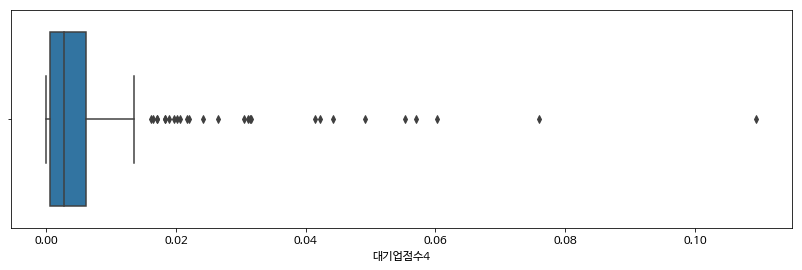

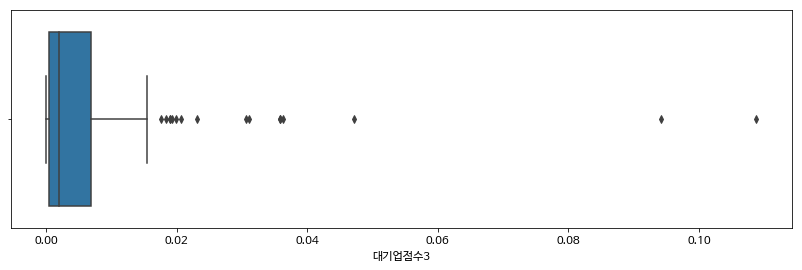

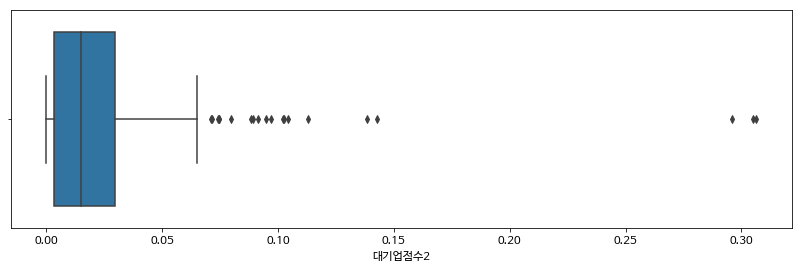

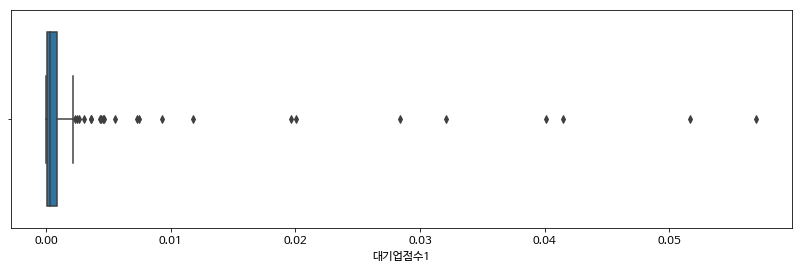

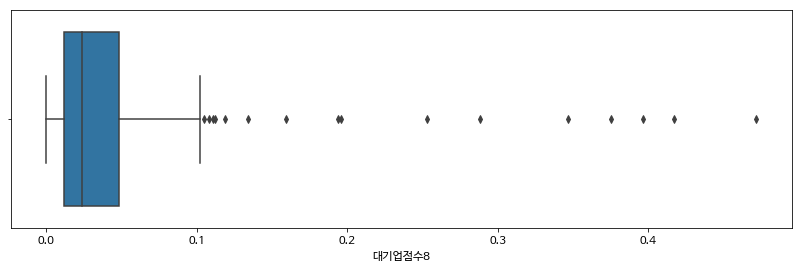

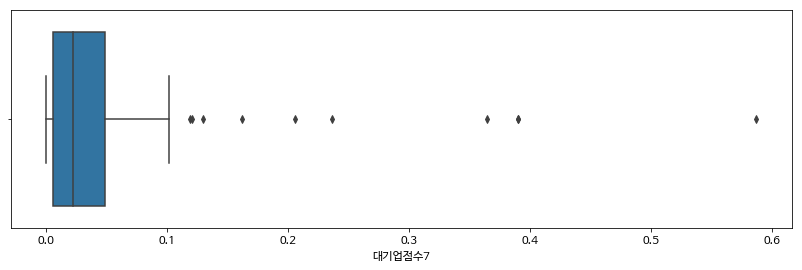

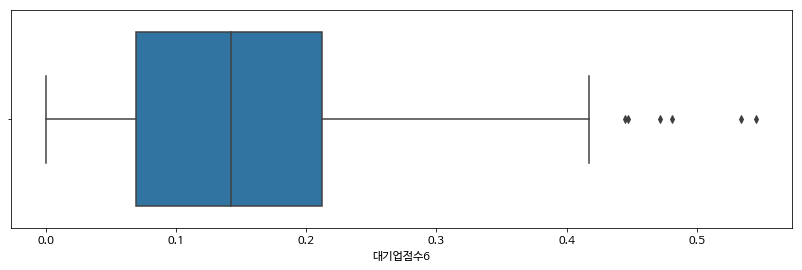

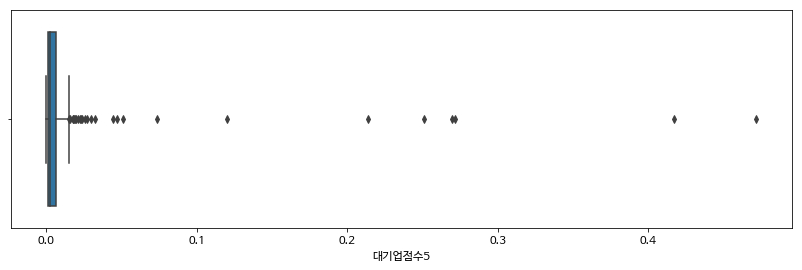

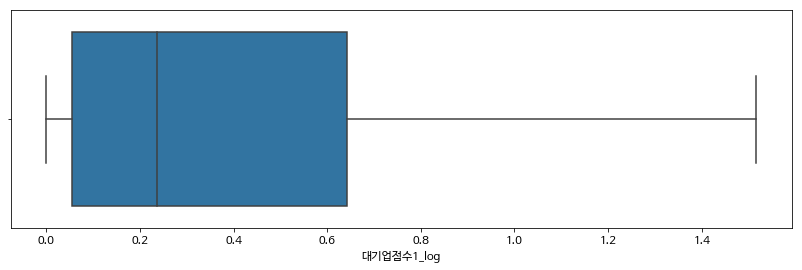

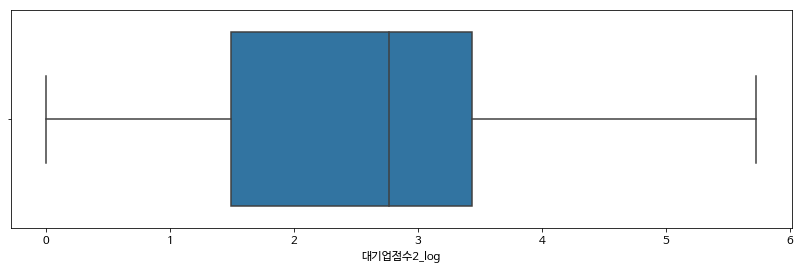

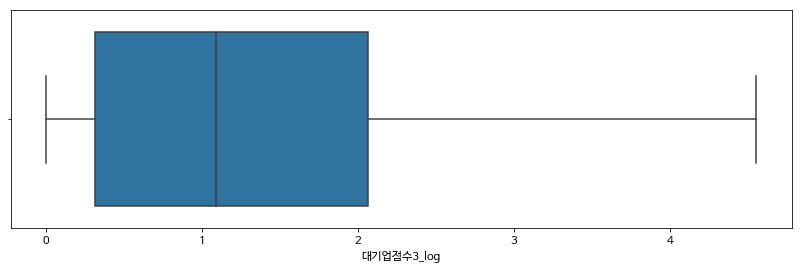

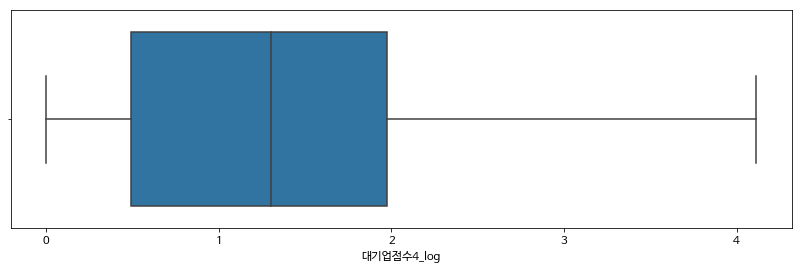

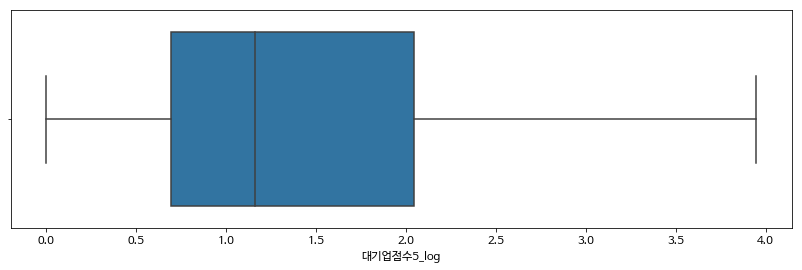

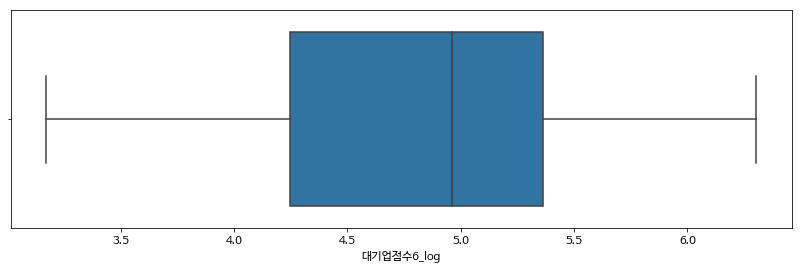

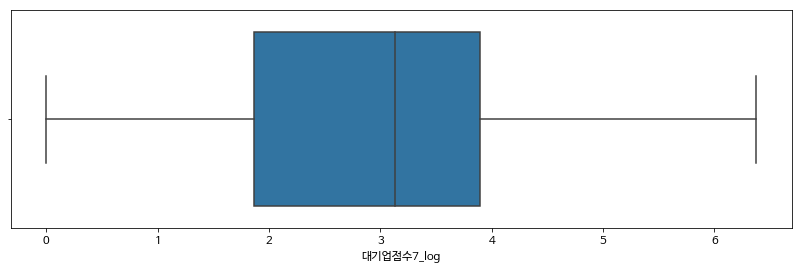

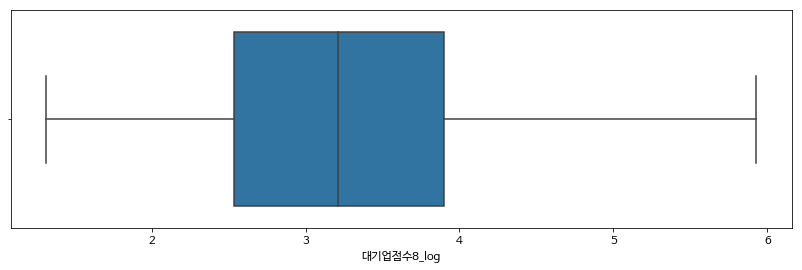

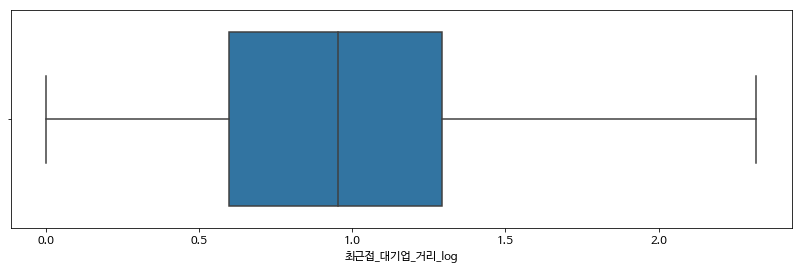

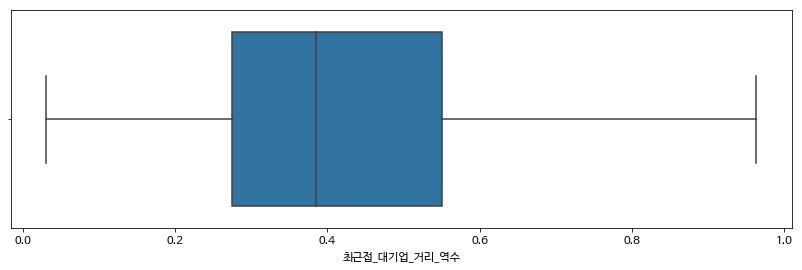

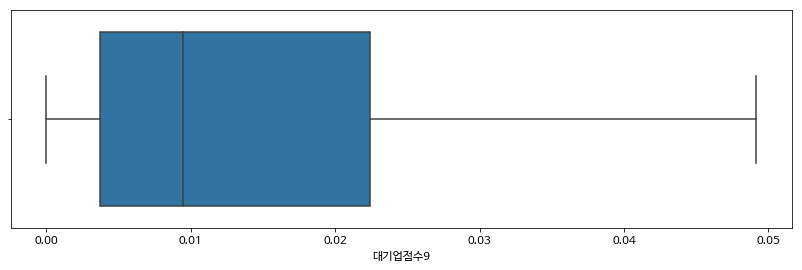

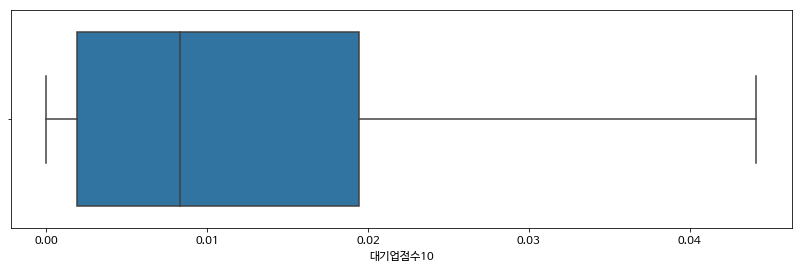

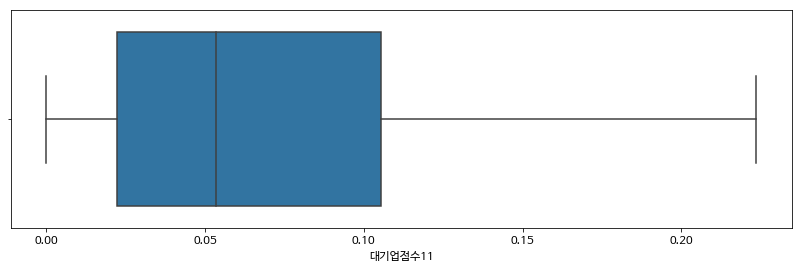

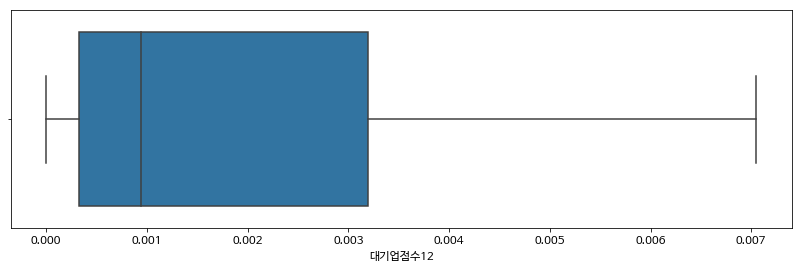

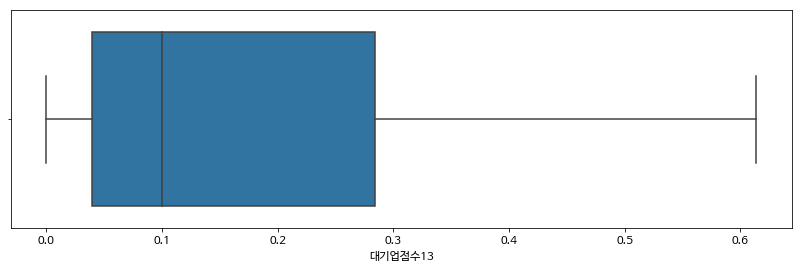

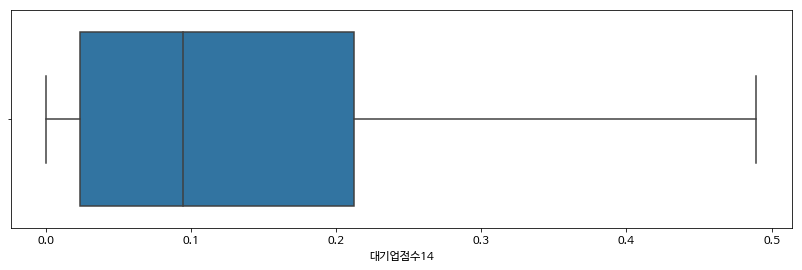

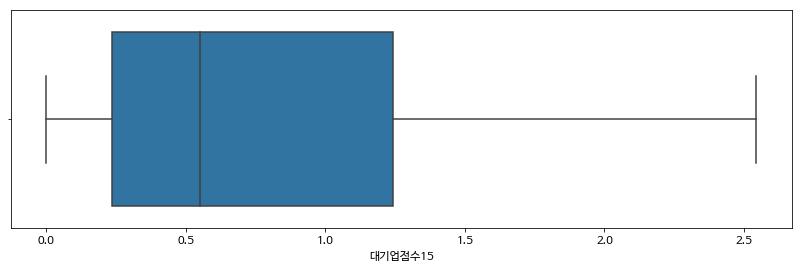

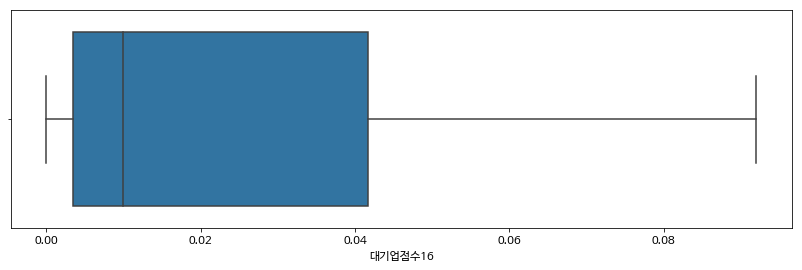

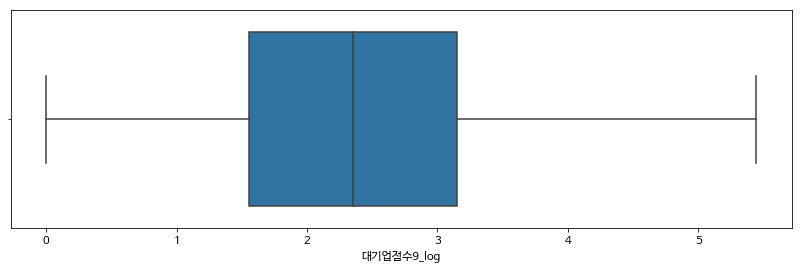

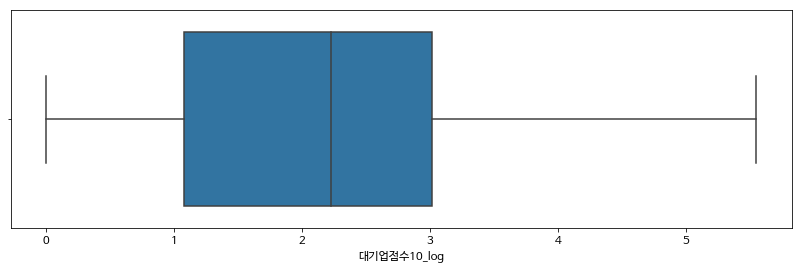

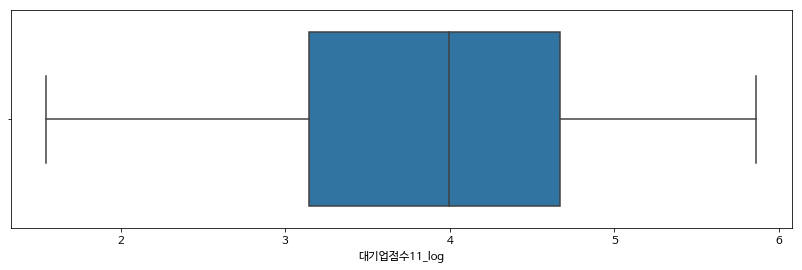

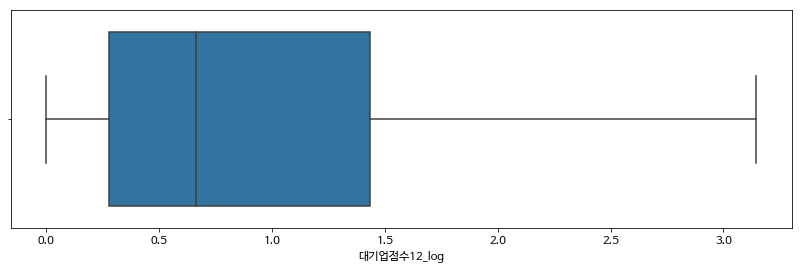

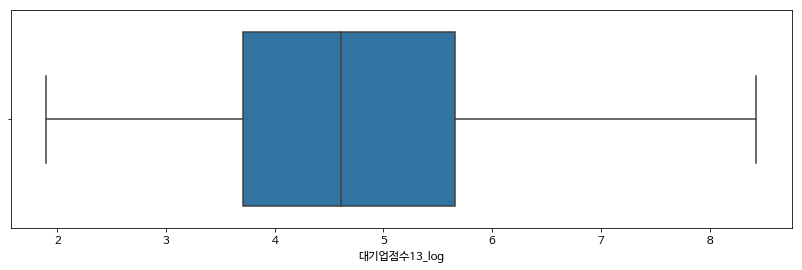

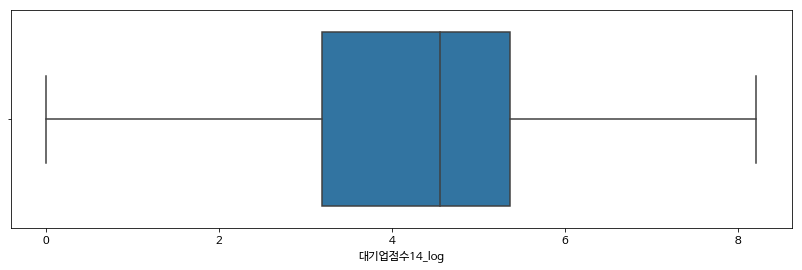

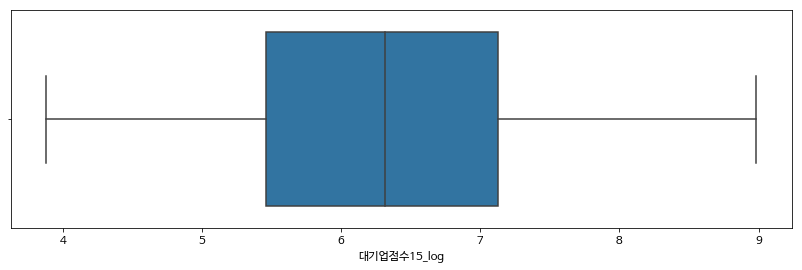

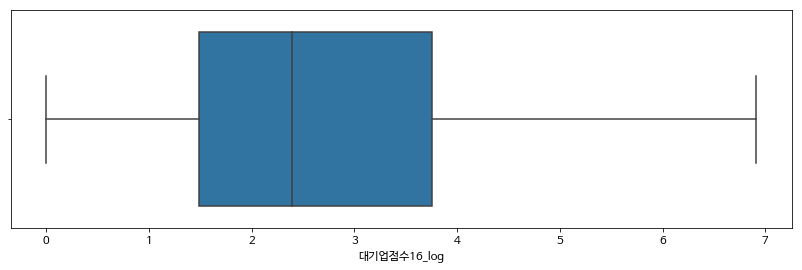

In [735]:
for col_ in temp_df.columns[1:]:
    plt.figure(figsize=(14,4))
    sns.boxplot(x=temp_df[col_])

In [858]:
corr_with_score = temp_df.corr()['score_A2'].sort_values(ascending=False)

In [859]:
select_feautres_names = corr_with_score[corr_with_score.map(lambda x:abs(x)>=0.1)].index

In [860]:
select_feature_df = temp_df[select_feautres_names]

In [862]:
select_corr = select_feature_df[['score_A2']+list(select_feature_df.columns[4:])].corr()

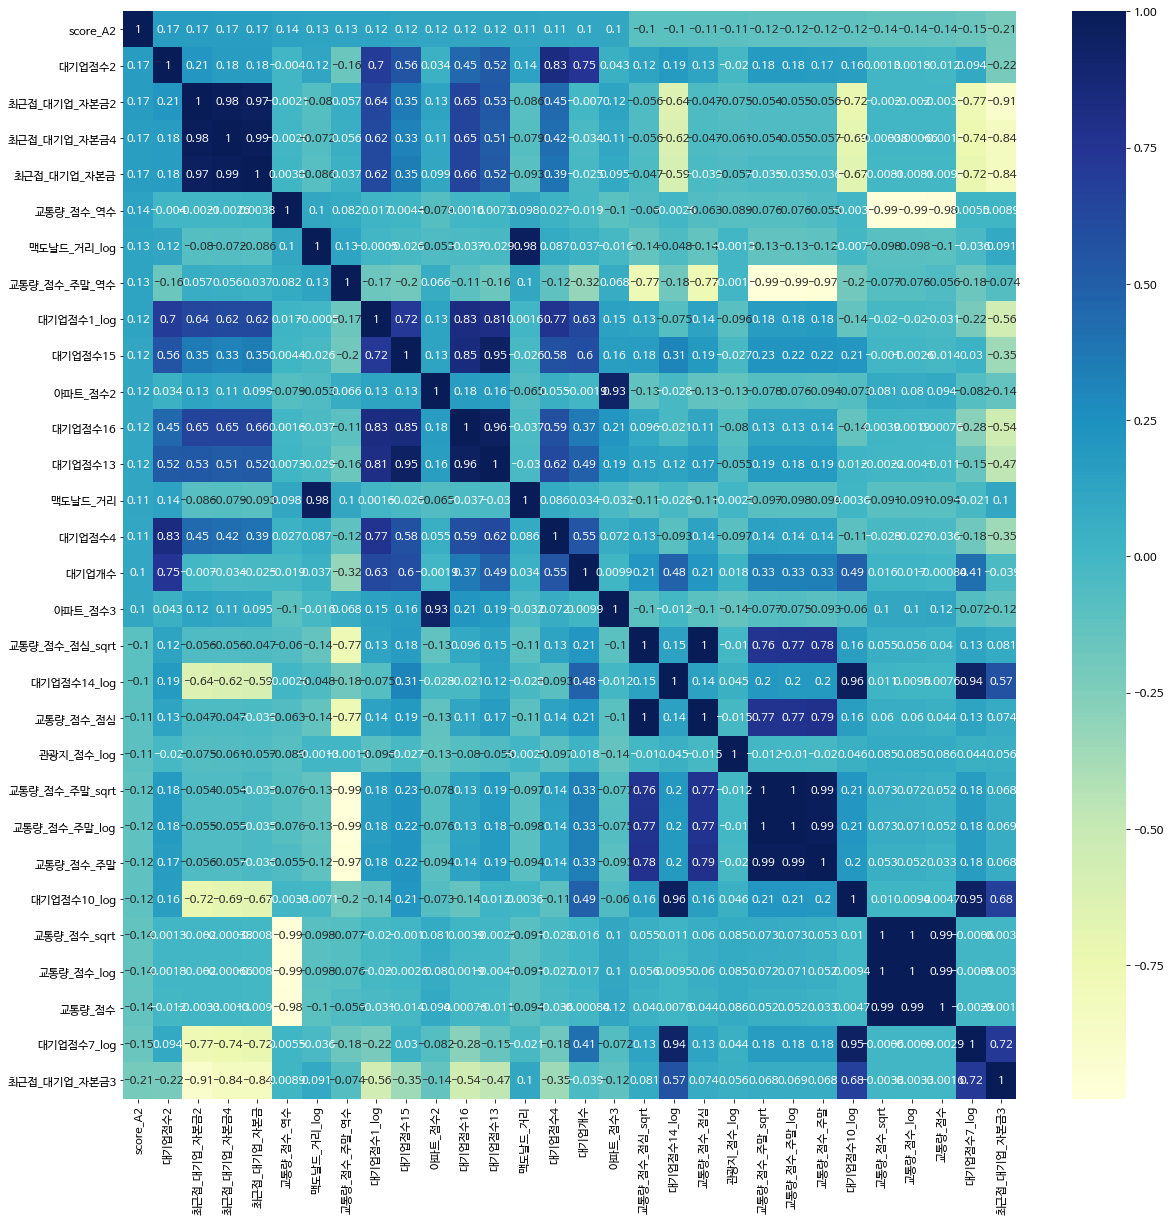

In [869]:
fig = plt.figure(figsize=(20,20))
sns.heatmap(select_corr, annot=True, cmap="YlGnBu")
fig.savefig('../starbucksDT/postprocess/200717_starbucksDt_all_feature_select_corr.png')

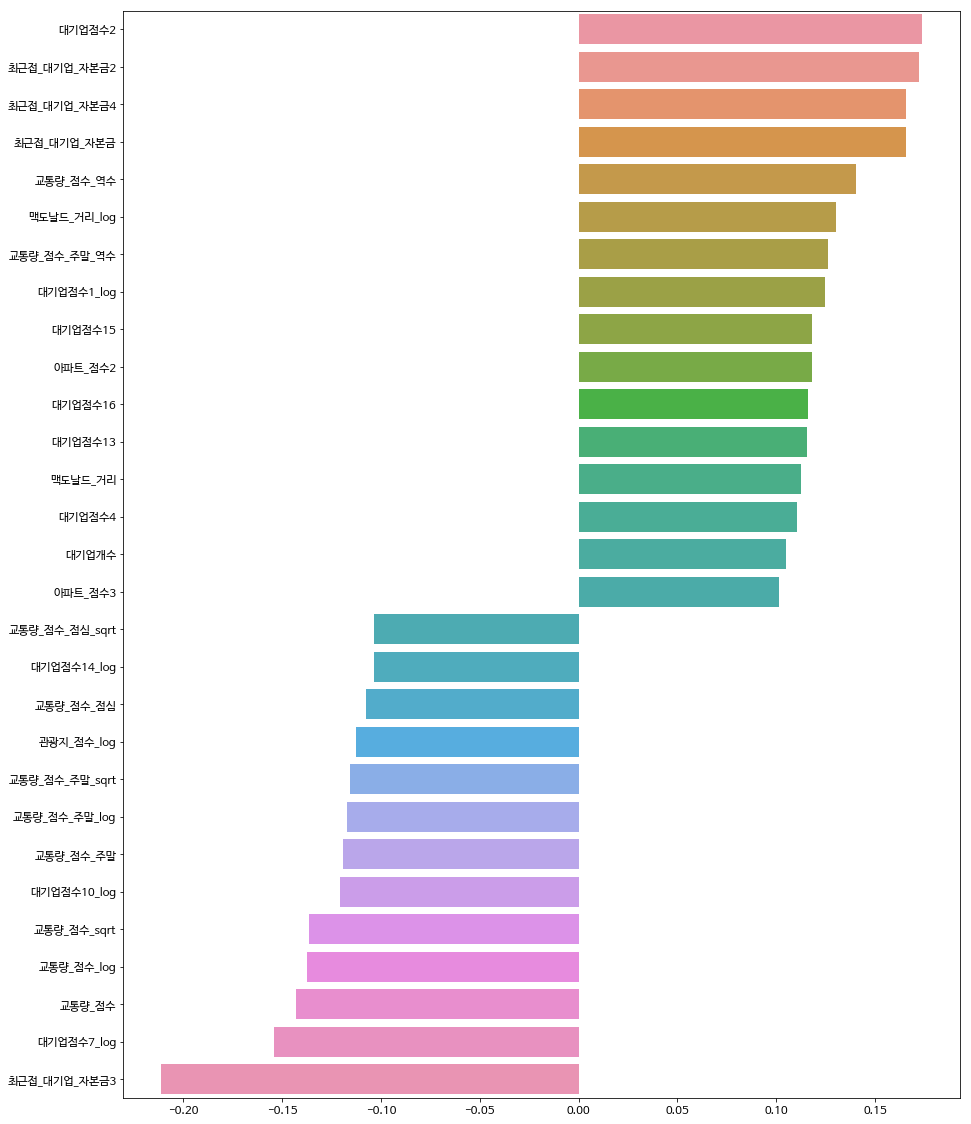

In [921]:
fig = plt.figure(figsize=(15,20))
sns.barplot(y=select_corr.index[1:],x= select_corr.score_A2.values[1:])
fig.savefig('../starbucksDT/postprocess/200717_starbucksDt_select_feature_importance_sort.png')

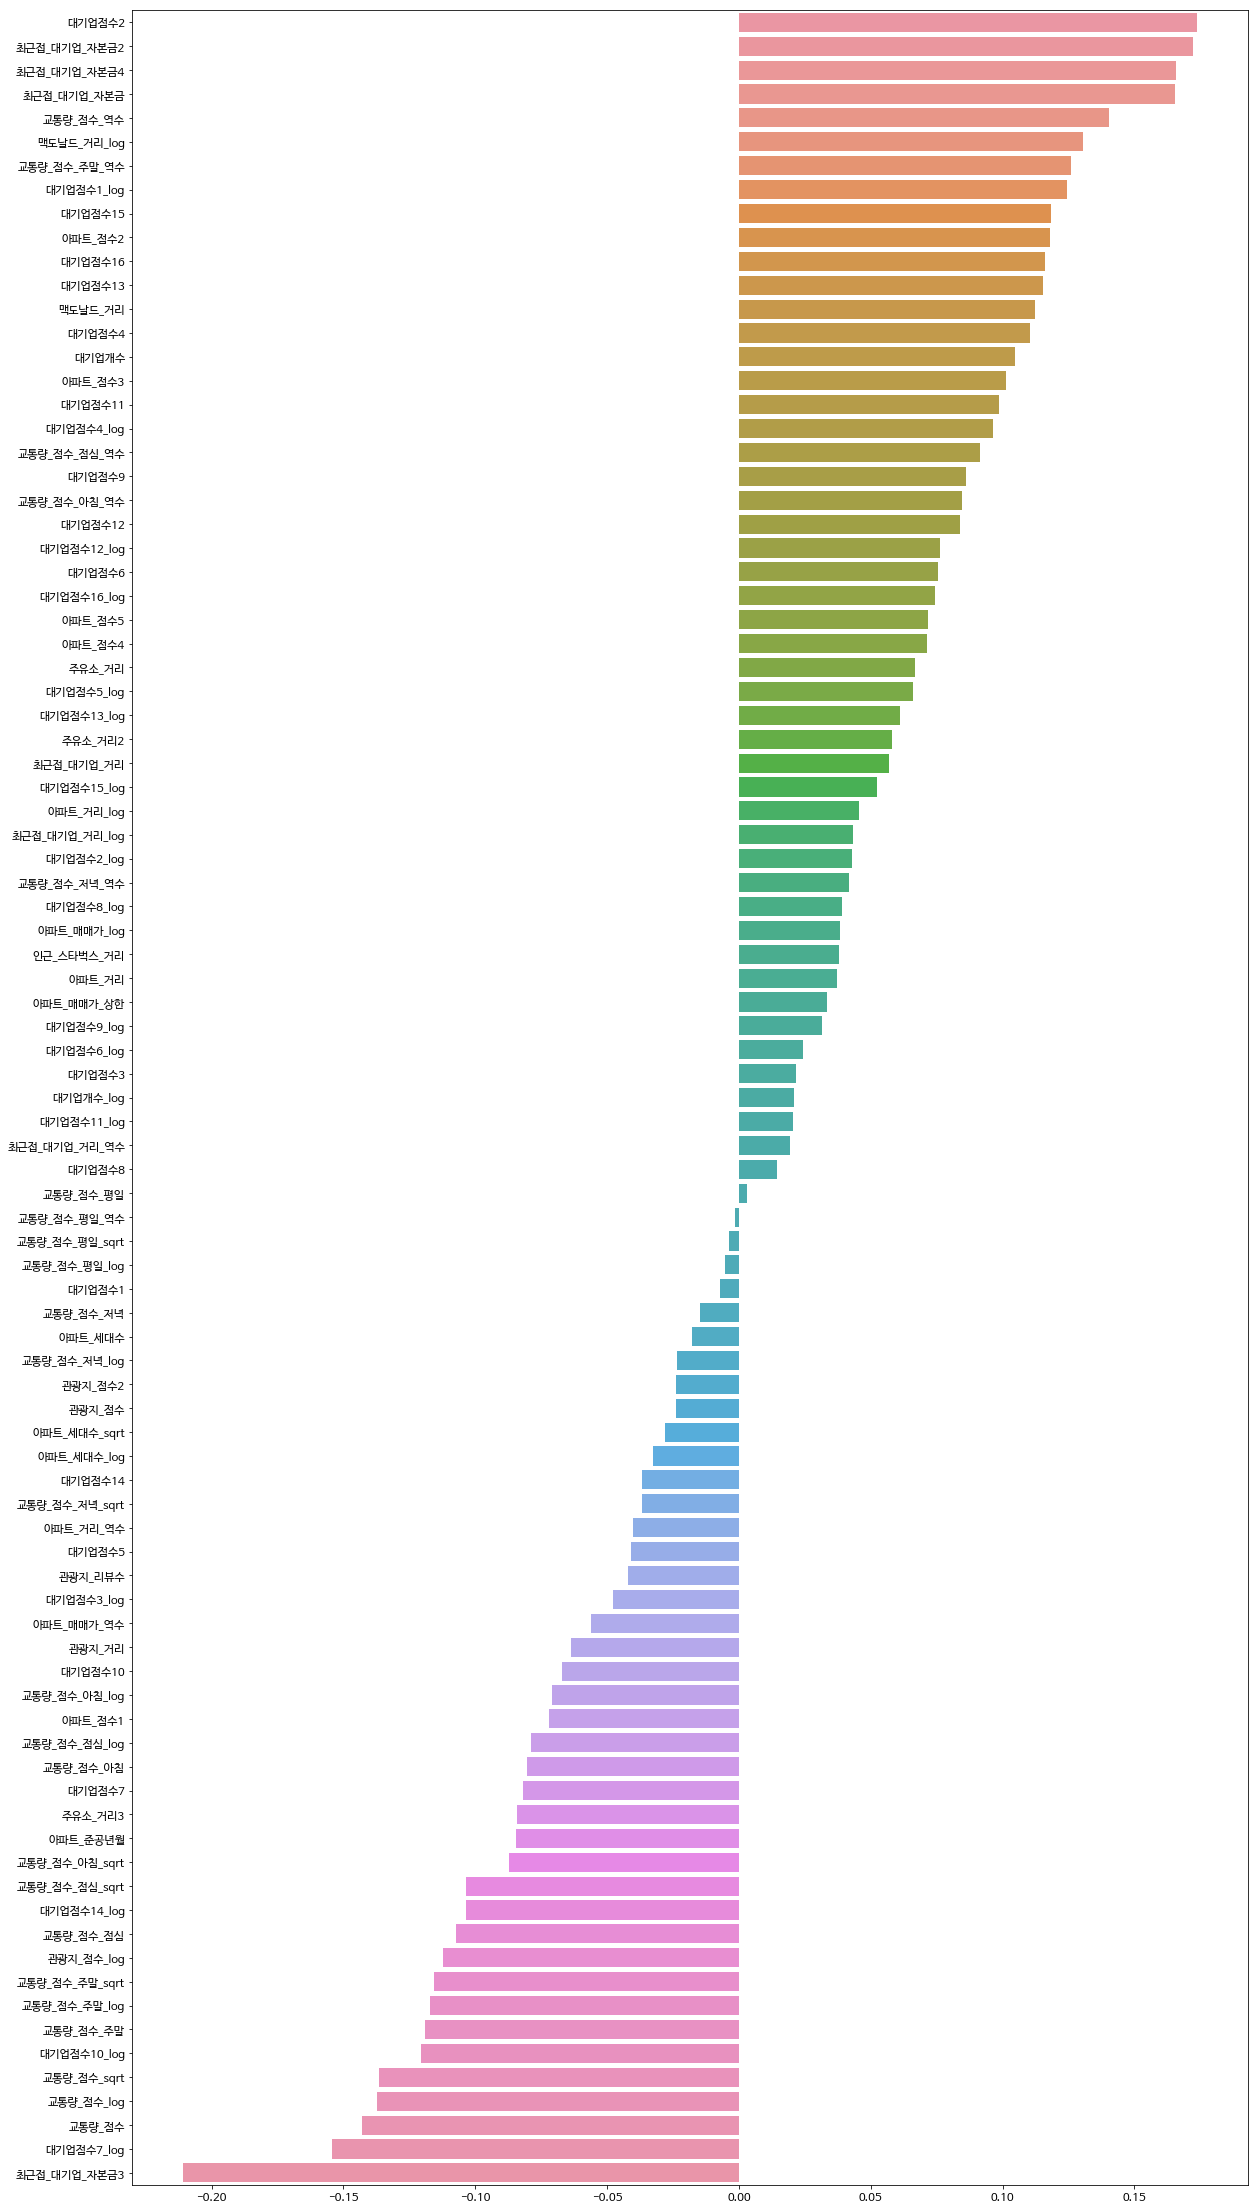

In [868]:
plt.figure(figsize=(20,40))
sns.barplot(y=corr_with_score.index[4:],x= corr_with_score.values[4:])
fig.savefig('../starbucksDT/postprocess/200717_starbucksDt_all_feature_corr.png')

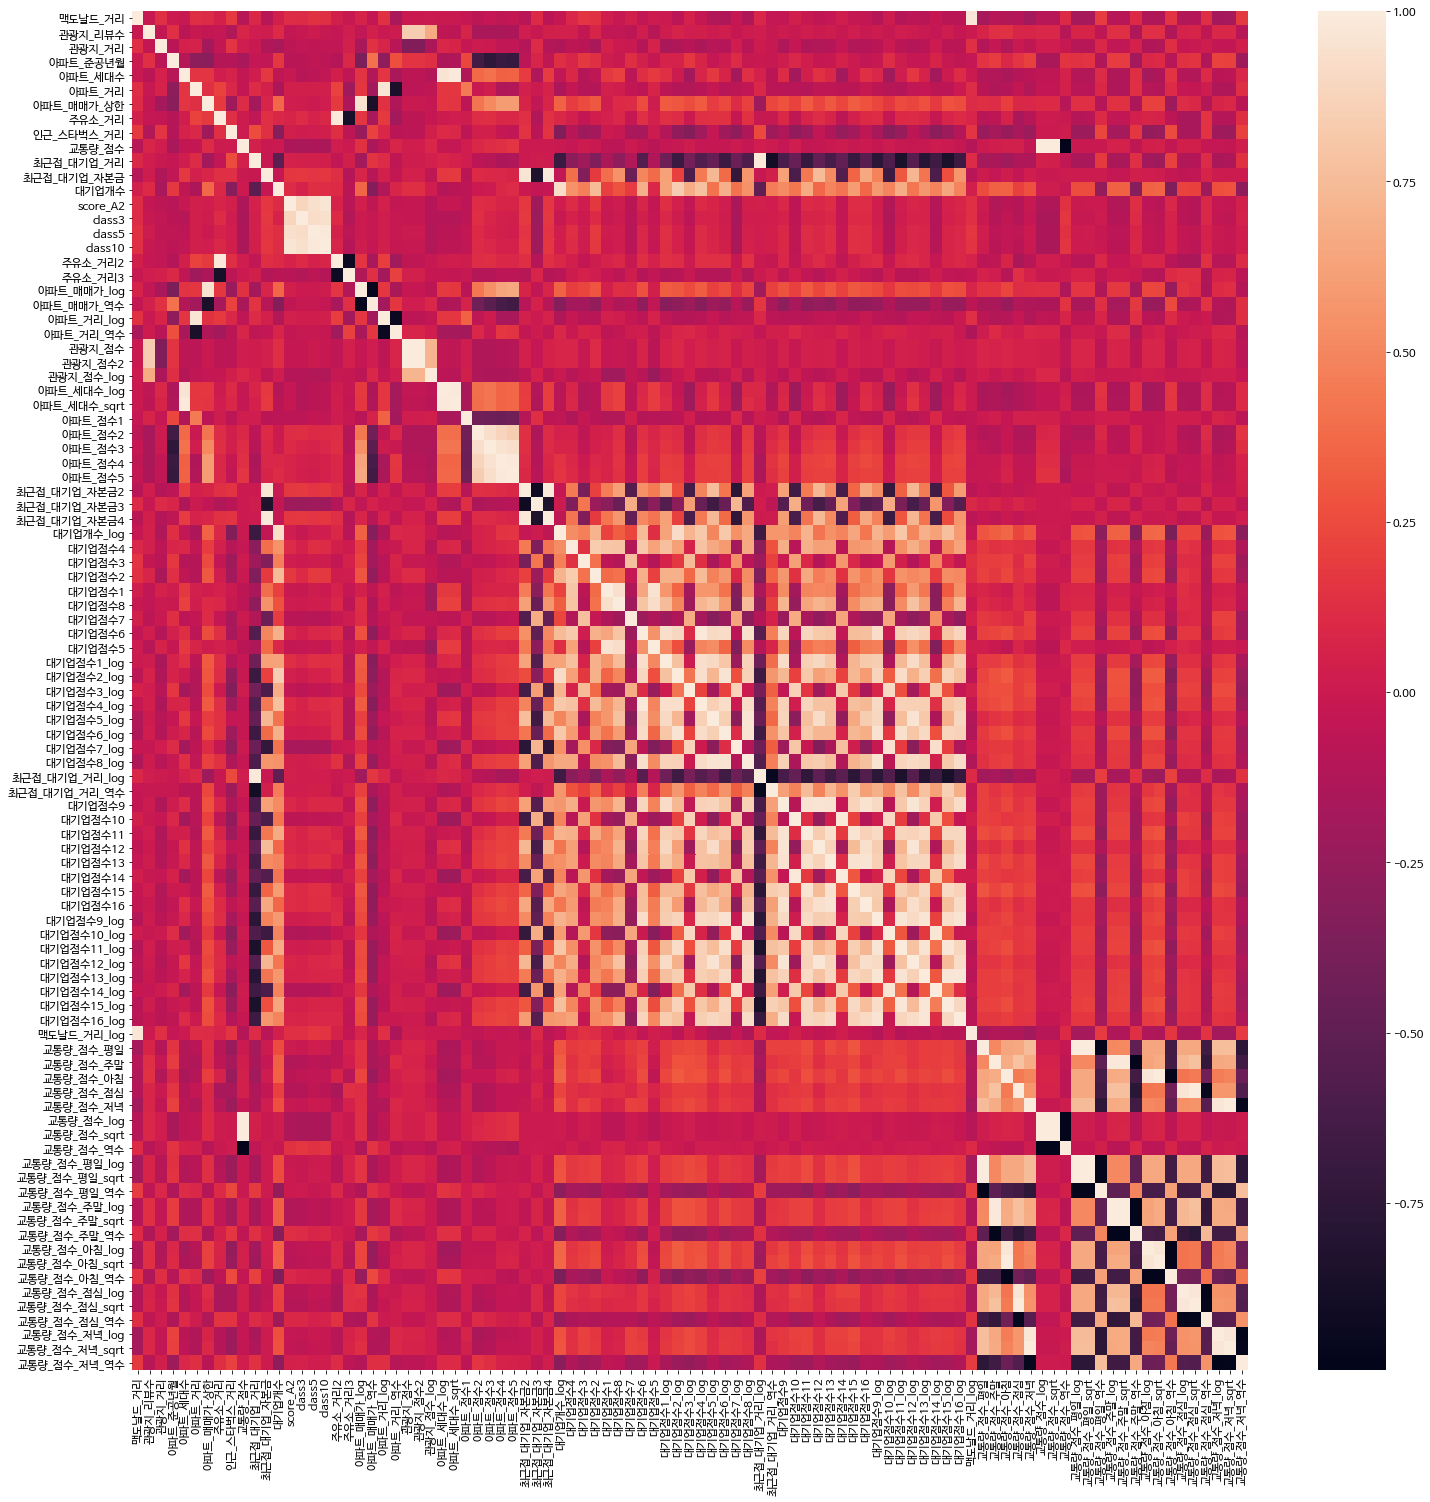

In [867]:
fig = plt.figure(figsize=(25,25))
sns.heatmap(temp_df.corr())
fig.savefig('../starbucksDT/postprocess/200717_starbucksDt_all_feature_corr.png')

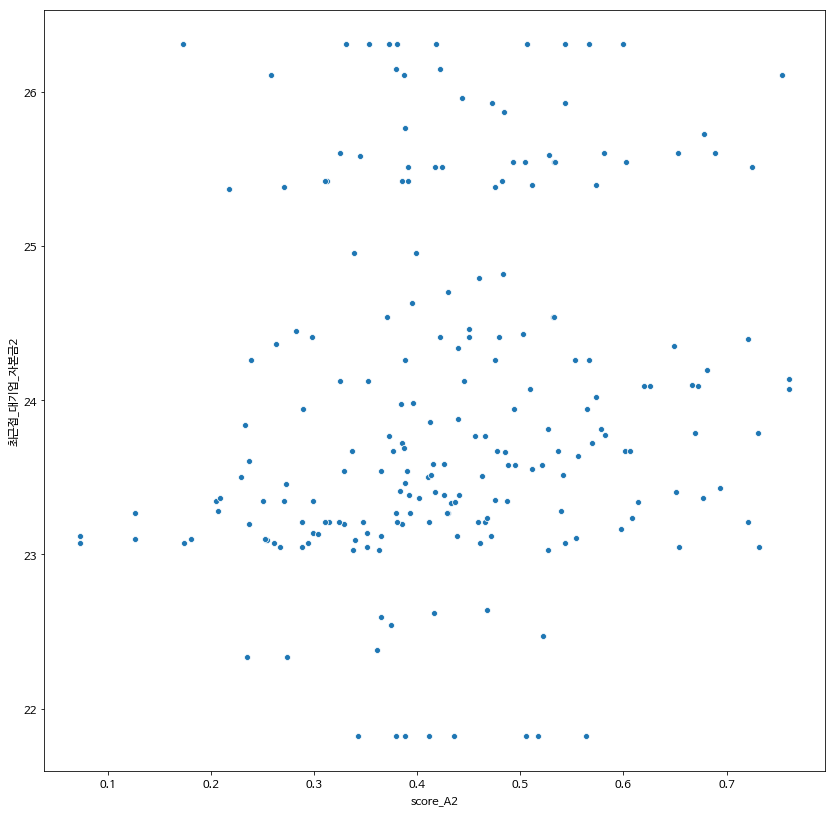

In [885]:
plt.figure(figsize=(14,14))
sns.scatterplot(y=temp_df['최근접_대기업_자본금2'], x=temp_df['score_A2'])

In [895]:
df_select_features = df.corr()['score_A2'][df.corr()['score_A2'].map(lambda x:abs(x)>=0.1)]

In [899]:
df_select_ = pd.DataFrame(df_select_features).sort_values('score_A2', ascending=False).iloc[4:,:]

In [907]:
df_select_feature = df[['score_A2']+list(df_select_.index)]

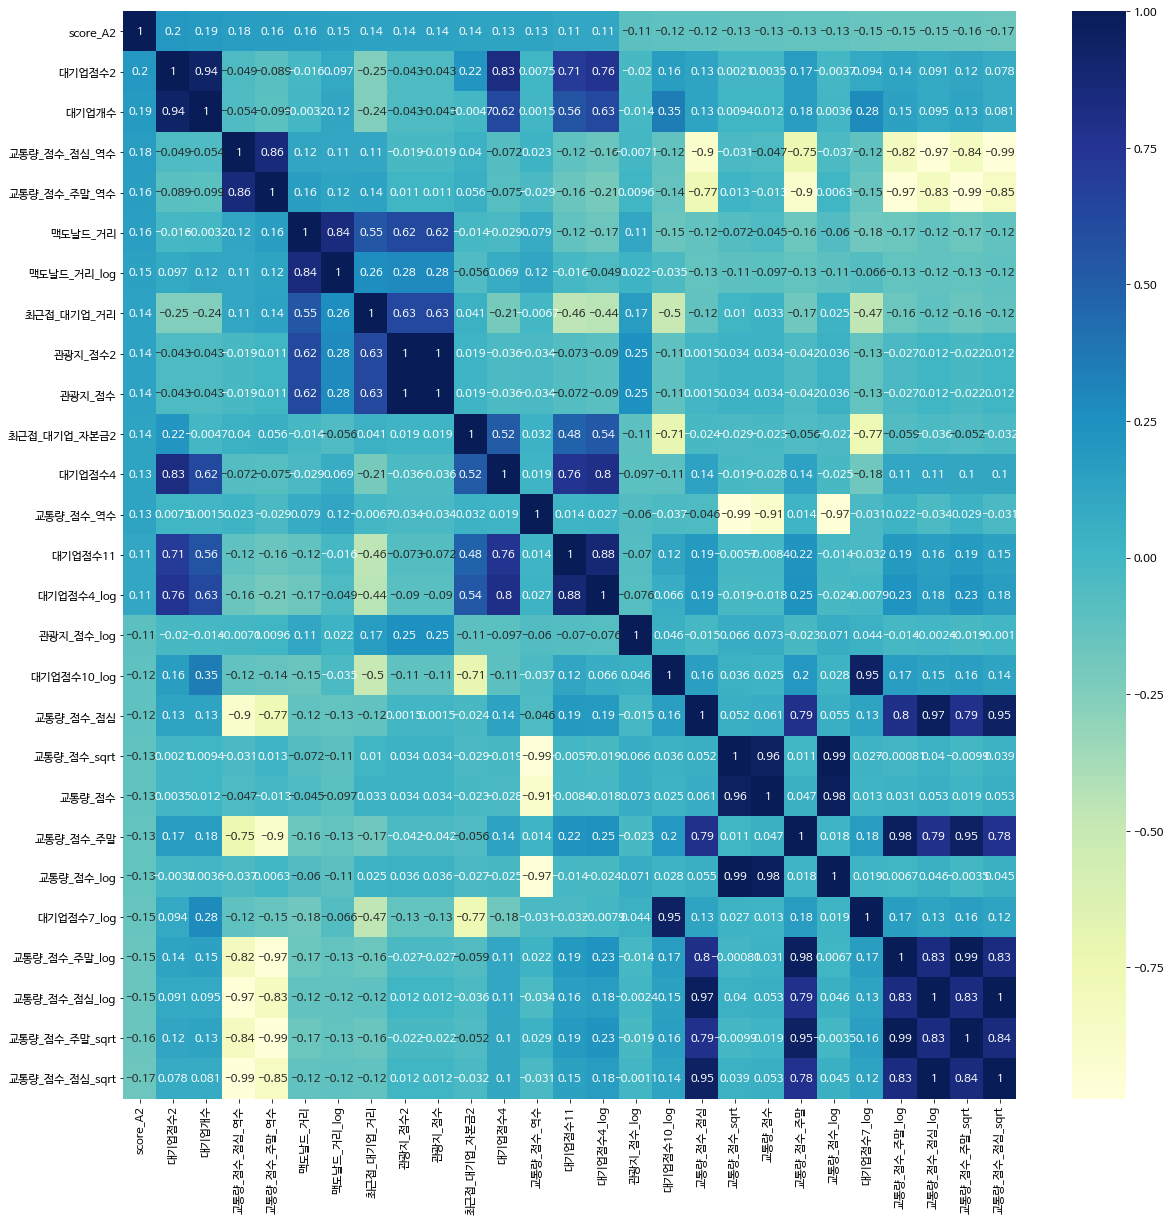

In [912]:
plt.figure(figsize=(20,20))
sns.heatmap(df_select_feature.corr(), cmap='YlGnBu', annot=True)

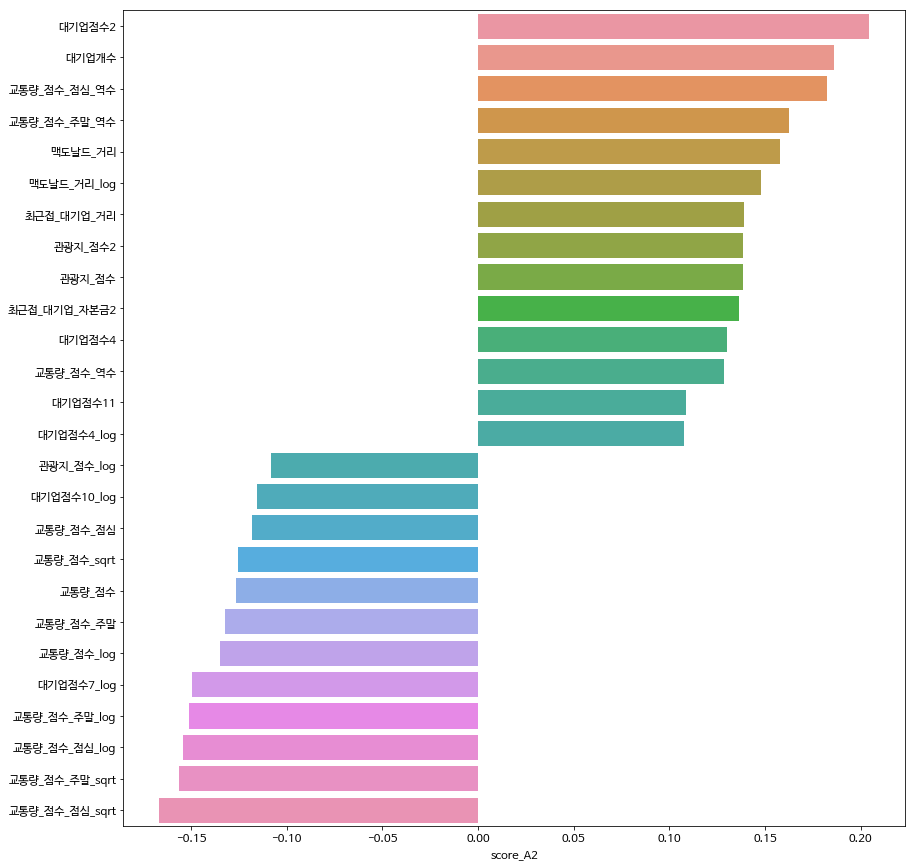

In [903]:
plt.figure(figsize=(14,15))
sns.barplot(y=df_select_.index, x= df_select_['score_A2'])

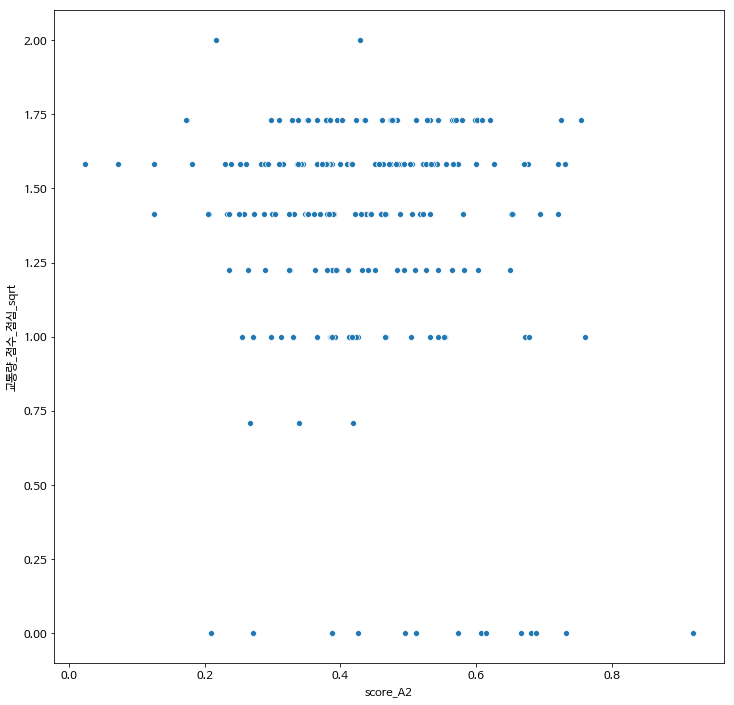

In [925]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df['score_A2'],y=df['교통량_점수_점심_sqrt'])

In [928]:
import statsmodels.api as sm

In [929]:
sm.OLS.from_formula()

statsmodels.regression.linear_model.OLS

In [937]:
df.drop('지점명',axis=1).values.shape

(213, 95)

In [978]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    select_feature_df.drop('지점명',axis=1).values, i) for i in range(select_feature_df.drop('지점명',axis=1).shape[1])]
vif["features"] = select_feature_df.drop('지점명',axis=1).columns
vif

VIF Factor        features
0      203.840222        score_A2
1      375.382750         class10
2      208.082631          class5
3       71.172034          class3
4       11.816350          대기업점수2
5    11346.065846    최근접_대기업_자본금2
6      295.606595    최근접_대기업_자본금4
7      127.814214     최근접_대기업_자본금
8     3148.202529       교통량_점수_역수
9       85.566899     맥도날드_거리_log
10    7209.672038    교통량_점수_주말_역수
11      33.270156      대기업점수1_log
12      85.159897         대기업점수15
13      17.621931         아파트_점수2
14      72.302885         대기업점수16
15     163.398822         대기업점수13
16      58.974598         맥도날드_거리
17      10.167670          대기업점수4
18      18.962089           대기업개수
19      33.066107         아파트_점수3
20    3244.474812  교통량_점수_점심_sqrt
21     381.310740     대기업점수14_log
22     984.312474       교통량_점수_점심
23       3.805170      관광지_점수_log
24  392329.641178  교통량_점수_주말_sqrt
25  336682.154092   교통량_점수_주말_log
26     345.486941       교통량_점수_주말
27     110.708326     대기업점수10_log
28  128879.083315     교통량_점수_sqrt
29  104429.669997      교통량_점수_log
30     917.274161          교통량_점수
31     292.209209      대기업점수7_log
32      29.145586    최근접_대기업_자본금3

In [987]:
except_cols = vif[vif['VIF Factor']>1e4].features.values

In [982]:
np.percentile(vif['VIF Factor'], 85)

8036.9507993986335

In [949]:
select_feature_df.shape

(213, 33)

In [955]:
select_feature_df['지점명'] = temp_df['지점명']

/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [957]:
select_feature_df = select_feature_df[['지점명'] + list(select_feature_df.columns[:-1])]

In [958]:
select_feature_df

지점명  score_A2  class10  class5  class3    대기업점수2  \
0       스타벅스 강동구청DT점  0.680499       10       5       3  0.094838   
1       스타벅스 강동암사DT점  0.482700        7       4       2  0.074608   
2     스타벅스 경기광주신현DT점  0.432452        6       3       2  0.022035   
3       스타벅스 경남사천DT점  0.380050        4       2       2  0.011950   
4       스타벅스 경산중방DT점  0.505294        8       4       3  0.000009   
5    스타벅스 경인교대입구역DT점  0.563726        9       5       3  0.008881   
6      스타벅스 경주보문로DT점  0.387270        4       2       2  0.000000   
7     스타벅스 경주보문호수DT점  0.257775        2       1       1  0.003443   
8      스타벅스 경주터미널DT점  0.753784       10       5       3  0.000000   
9       스타벅스 계룡대로DT점  0.425602        6       3       2  0.000000   
10        스타벅스 고양DT점  0.543313        9       5       3  0.000000   
11        스타벅스 공릉DT점  0.648995       10       5       3  0.015814   
12     스타벅스 공주동학사DT점  0.365057        3       2       1  0.001429   
13        스타벅스 과천DT점  0.282663        2       1       1  0.060389   
14      스타벅스 광명소하DT점  0.459136        6       3       2  0.046150   
15      스타벅스 광주금호DT점  0.270846        2       1       1  0.023615   
16      스타벅스 광주매곡DT점  0.328600        3       2       1  0.014825   
17      스타벅스 광주방림DT점  0.472925        7       4       2  0.036506   
18      스타벅스 광주산정DT점  0.252933        1       1       1  0.029609   
19      스타벅스 광주상무DT점  0.475176        7       4       2  0.026567   
20      스타벅스 광주수완DT점  0.206441        1       1       1  0.021504   
21      스타벅스 광주신가DT점  0.471396        7       4       2  0.028602   
22     스타벅스 광주신세계DT점  0.422507        6       3       2  0.032193   
23      스타벅스 광주신안DT점  0.554310        9       5       3  0.017047   
24      스타벅스 광주용두DT점  0.517577        8       4       3  0.003330   
25      스타벅스 광주운남DT점  0.339606        3       2       1  0.032429   
26      스타벅스 광주운암DT점  0.450600        6       3       2  0.027594   
27      스타벅스 광주월산DT점  0.430133        6       3       2  0.032411   
28      스타벅스 광주화정DT점  0.298150        2       1       1  0.029893   
29      스타벅스 광주흑석DT점  0.254651        1       1       1  0.029609   
..               ...       ...      ...     ...     ...       ...   
183       스타벅스 종암DT점  0.476909        7       4       2  0.104296   
184     스타벅스 진주칠암DT점  0.217498        1       1       1  0.011773   
185     스타벅스 진해자은DT점  0.505996        8       4       3  0.007150   
186      스타벅스 창원역DT점  0.731503       10       5       3  0.011051   
187     스타벅스 창원호계DT점  0.288388        2       1       1  0.002763   
188    스타벅스 천안IC DT점  0.338208        3       2       1  0.021318   
189     스타벅스 천안불당DT점  0.418031        5       3       2  0.041451   
190   스타벅스 천안서부대로DT점  0.173160        1       1       1  0.056995   
191     스타벅스 천안성정DT점  0.399288        5       3       2  0.026647   
192     스타벅스 청주봉명DT점  0.552823        9       5       3  0.010975   
193     스타벅스 청주사직DT점  0.566402        9       5       3  0.010975   
194     스타벅스 청주용담DT점  0.388000        4       2       2  0.002195   
195     스타벅스 청주용암DT점  0.475251        7       4       2  0.000000   
196     스타벅스 청주율량DT점  0.573209        9       5       3  0.006106   
197     스타벅스 춘천석사DT점  0.614059        9       5       3  0.003157   
198     스타벅스 춘천후평DT점  0.436877        6       3       2  0.003157   
199     스타벅스 충남보령DT점  0.379858        4       2       2  0.003466   
200     스타벅스 충주시청DT점  0.236496        1       1       1  0.012283   
201     스타벅스 충주호암DT점  0.666508       10       5       3  0.010444   
202       스타벅스 평내DT점  0.394959        5       3       2  0.002447   
203      스타벅스 평촌역DT점  0.527511        8       4       3  0.074170   
204     스타벅스 평택서정DT점  0.304226        2       1       1  0.005745   
205       스타벅스 포천DT점  0.337803        3       2       1  0.002732   
206     스타벅스 포항쌍용DT점  0.466174        7       4       2  0.031716   
207     스타벅스 포항장성DT점  0.372792        4       2       1  0.001866   
208      스타벅스 풍무역DT점  0.416858        5       3       2  0.015193   
209     스타벅스 하남

In [968]:
temp_df = temp_df.sort_values('지점명', ascending=False).reset_index(drop=True)

In [969]:
select_feature_df = select_feature_df.sort_values('지점명', ascending=False).reset_index(drop=True)

In [970]:
select_feature_df

지점명  score_A2  class10  class5  class3    대기업점수2  \
0       스타벅스 화성병점DT점  0.429184        6       3       2  0.019877   
1         스타벅스 화곡DT점  0.730365       10       5       3  0.112749   
2     스타벅스 해운대달맞이DT점  0.310229        2       1       1  0.005958   
3       스타벅스 하남미사DT점  0.401841        5       3       2  0.009555   
4        스타벅스 풍무역DT점  0.416858        5       3       2  0.015193   
5       스타벅스 포항장성DT점  0.372792        4       2       1  0.001866   
6       스타벅스 포항쌍용DT점  0.466174        7       4       2  0.031716   
7         스타벅스 포천DT점  0.337803        3       2       1  0.002732   
8       스타벅스 평택서정DT점  0.304226        2       1       1  0.005745   
9        스타벅스 평촌역DT점  0.527511        8       4       3  0.074170   
10        스타벅스 평내DT점  0.394959        5       3       2  0.002447   
11      스타벅스 충주호암DT점  0.666508       10       5       3  0.010444   
12      스타벅스 충주시청DT점  0.236496        1       1       1  0.012283   
13      스타벅스 충남보령DT점  0.379858        4       2       2  0.003466   
14      스타벅스 춘천후평DT점  0.436877        6       3       2  0.003157   
15      스타벅스 춘천석사DT점  0.614059        9       5       3  0.003157   
16      스타벅스 청주율량DT점  0.573209        9       5       3  0.006106   
17      스타벅스 청주용암DT점  0.475251        7       4       2  0.000000   
18      스타벅스 청주용담DT점  0.388000        4       2       2  0.002195   
19      스타벅스 청주사직DT점  0.566402        9       5       3  0.010975   
20      스타벅스 청주봉명DT점  0.552823        9       5       3  0.010975   
21      스타벅스 천안성정DT점  0.399288        5       3       2  0.026647   
22    스타벅스 천안서부대로DT점  0.173160        1       1       1  0.056995   
23      스타벅스 천안불당DT점  0.418031        5       3       2  0.041451   
24     스타벅스 천안IC DT점  0.338208        3       2       1  0.021318   
25      스타벅스 창원호계DT점  0.288388        2       1       1  0.002763   
26       스타벅스 창원역DT점  0.731503       10       5       3  0.011051   
27      스타벅스 진해자은DT점  0.505996        8       4       3  0.007150   
28      스타벅스 진주칠암DT점  0.217498        1       1       1  0.011773   
29        스타벅스 종암DT점  0.476909        7       4       2  0.104296   
..               ...       ...      ...     ...     ...       ...   
183     스타벅스 광주흑석DT점  0.254651        1       1       1  0.029609   
184     스타벅스 광주화정DT점  0.298150        2       1       1  0.029893   
185     스타벅스 광주월산DT점  0.430133        6       3       2  0.032411   
186     스타벅스 광주운암DT점  0.450600        6       3       2  0.027594   
187     스타벅스 광주운남DT점  0.339606        3       2       1  0.032429   
188     스타벅스 광주용두DT점  0.517577        8       4       3  0.003330   
189     스타벅스 광주신안DT점  0.554310        9       5       3  0.017047   
190    스타벅스 광주신세계DT점  0.422507        6       3       2  0.032193   
191     스타벅스 광주신가DT점  0.471396        7       4       2  0.028602   
192     스타벅스 광주수완DT점  0.206441        1       1       1  0.021504   
193     스타벅스 광주상무DT점  0.475176        7       4       2  0.026567   
194     스타벅스 광주산정DT점  0.252933        1       1       1  0.029609   
195     스타벅스 광주방림DT점  0.472925        7       4       2  0.036506   
196     스타벅스 광주매곡DT점  0.328600        3       2       1  0.014825   
197     스타벅스 광주금호DT점  0.270846        2       1       1  0.023615   
198     스타벅스 광명소하DT점  0.459136        6       3       2  0.046150   
199       스타벅스 과천DT점  0.282663        2       1       1  0.060389   
200    스타벅스 공주동학사DT점  0.365057        3       2       1  0.001429   
201       스타벅스 공릉DT점  0.648995       10       5       3  0.015814   
202       스타벅스 고양DT점  0.543313        9       5       3  0.000000   
203     스타벅스 계룡대로DT점  0.425602        6       3       2  0.000000   
204    스타벅스 경주터미널DT점  0.753784       10       5       3  0.000000   
205   스타벅스 경주보문호수DT점  0.257775        2       1       1  0.003443   
206    스타벅스 경주보문로DT점  0.387270        4       2       2  0.000000   
207  스타벅스 경인교대입구역DT점  0.563726        9       5       3  0.008881   
208     스타벅스 경산중방DT점  0.505294        8       4       3  0.000009   
209     스타벅스 경남

In [974]:
temp_df = temp_df[['지점명', 'score_A2']+list(set(temp_df.columns).difference({'지점명',' score_A2'}))]

In [975]:
temp_df

지점명  score_A2  관광지_리뷰수   주유소_거리2  대기업점수3_log   대기업점수10  \
0       스타벅스 화성병점DT점  0.429184    24681  0.640274    2.070644  0.044150   
1         스타벅스 화곡DT점  0.730365        0  0.875469    2.993728  0.024601   
2     스타벅스 해운대달맞이DT점  0.310229    42656  0.411447    0.113033  0.001073   
3       스타벅스 하남미사DT점  0.401841     4800  1.629241    1.363328  0.034567   
4        스타벅스 풍무역DT점  0.416858    18720  1.029619    0.241182  0.001442   
5       스타벅스 포항장성DT점  0.372792        0  0.557327    0.279489  0.001430   
6       스타벅스 포항쌍용DT점  0.466174        0  0.615186    1.868986  0.009075   
7         스타벅스 포천DT점  0.337803     7652  0.415415    0.858453  0.015985   
8       스타벅스 평택서정DT점  0.304226    18767  0.788457    1.237976  0.009582   
9        스타벅스 평촌역DT점  0.527511        0  0.656483    0.792185  0.004867   
10        스타벅스 평내DT점  0.394959        0  0.238229    0.126393  0.001229   
11      스타벅스 충주호암DT점  0.666508        0  1.193922    0.767455  0.002498   
12      스타벅스 충주시청DT점  0.236496     3138  1.629241    1.298566  0.010885   
13      스타벅스 충남보령DT점  0.379858     7247  0.671413    0.027416  0.000112   
14      스타벅스 춘천후평DT점  0.436877      518  0.053541    0.688391  0.006600   
15      스타벅스 춘천석사DT점  0.614059      439  0.955511    0.688391  0.005013   
16      스타벅스 청주율량DT점  0.573209     9532  1.335001    0.559883  0.008486   
17      스타벅스 청주용암DT점  0.475251     1214  0.402126    0.000000  0.000000   
18      스타벅스 청주용담DT점  0.388000     2066  0.464363    0.179668  0.000932   
19      스타벅스 청주사직DT점  0.566402    28189  0.955511    0.685165  0.002703   
20      스타벅스 청주봉명DT점  0.552823    28189  0.741937    0.685165  0.004759   
21      스타벅스 천안성정DT점  0.399288      356  0.955511    0.677022  0.006636   
22    스타벅스 천안서부대로DT점  0.173160        0  0.670902    0.000000  0.000000   
23      스타벅스 천안불당DT점  0.418031        0  0.916291    0.000000  0.000000   
24     스타벅스 천안IC DT점  0.338208      356  0.491643    0.573466  0.007017   
25      스타벅스 창원호계DT점  0.288388     1399  0.832909    0.845281  0.009694   
26       스타벅스 창원역DT점  0.731503     1725  0.875469    1.842853  0.044150   
27      스타벅스 진해자은DT점  0.505996        0  0.185649    0.045573  0.000175   
28      스타벅스 진주칠암DT점  0.217498        0  0.832909    0.225413  0.001840   
29        스타벅스 종암DT점  0.476909    22472  0.875469    3.076662  0.028078   
..               ...       ...      ...       ...         ...       ...   
183     스타벅스 광주흑석DT점  0.254651    16808  0.832909    2.665061  0.032154   
184     스타벅스 광주화정DT점  0.298150     1718  1.098612    1.158960  0.009014   
185     스타벅스 광주월산DT점  0.430133     1718  0.875469    0.967955  0.004260   
186     스타벅스 광주운암DT점  0.450600        0  1.064711    1.104732  0.005635   
187     스타벅스 광주운남DT점  0.339606    16808  1.064711    2.749962  0.023894   
188     스타벅스 광주용두DT점  0.517577    17256  0.681075    2.682949  0.044150   
189     스타벅스 광주신안DT점  0.554310        0  1.223775    2.142260  0.028545   
190    스타벅스 광주신세계DT점  0.422507     1718  1.163151    1.210397  0.011777   
191     스타벅스 광주신가DT점  0.471396    16808  0.250759    2.591881  0.019247   
192     스타벅스 광주수완DT점  0.206441    16808  1.098612    2.126531  0.024830   
193     스타벅스 광주상무DT점  0.475176        0  0.650240    0.445601  0.003113   
194     스타벅스 광주산정DT점  0.252933    16808  0.202124    2.665061  0.037975   
195     스타벅스 광주방림DT점  0.472925       16  0.788457    0.327208  0.002293   
196     스타벅스 광주매곡DT점  0.328600        0  0.456792    1.904100  0.014934   
197     스타벅스 광주금호DT점  0.270846    17609  0.788457    0.404830  0.003948   
198     스타벅스 광명소하DT점  0.459136        0  1.629241    2.920367  0.022952   
199       스타벅스 과천DT점  0.282663      294  1.131402    1.653102  0.009185   
200    스타벅스 공주동학사DT점  0.365057     1103  0.345715    0.481835  0.002315   
201       스타벅스 공릉DT점  0.648995        0  0.741937    0.811446  0.004584   
202       스타벅스 고양DT점  0.543313      119  0.741937    0.000000  0.000000   
203     스타벅스 계룡대로DT점  0.425602    25998  0.502592    0.000000  0.000000   
204    스타벅스 경주터미널DT점  0.753784        0  0

In [976]:
select_feature_df.to_excel('../starbucksDT/postprocess/select_feature_df_200720.xlsx', index=False)
temp_df.to_excel('../starbucksDT/postprocess/all_feature_200720.xlsx', index=False)

In [989]:
select_feature_df[list(set(select_feature_df.columns).difference(set(except_cols)))].to_excel('../starbucksDT/postprocess/select_feature_df_vif_delete_200720.xlsx', index=False)

In [1004]:
df7 = pd.read_excel('/Users/dhkim/PycharmProjects/starbucksDT/total/20200720_starbucksDT_beformNorm2.xlsx')

In [1008]:
select_feature_df = select_feature_df.sort_values('지점명').reset_index(drop=True)
temp_df = temp_df.sort_values('지점명').reset_index(drop=True)
df7 = df7.sort_values('지점명').reset_index(drop=True)

In [1020]:
select_feature_df = pd.read_excel('../starbucksDT/postprocess/select_feature_df_200720.xlsx')

In [1022]:
select_feature_df.columns

Index(['지점명', 'score_A2', 'class10', 'class5', 'class3', '대기업점수2',
       '최근접_대기업_자본금2', '최근접_대기업_자본금4', '최근접_대기업_자본금', '교통량_점수_역수',
       '맥도날드_거리_log', '교통량_점수_주말_역수', '대기업점수1_log', '대기업점수15', '아파트_점수2',
       '대기업점수16', '대기업점수13', '맥도날드_거리', '대기업점수4', '대기업개수', '아파트_점수3',
       '교통량_점수_점심_sqrt', '대기업점수14_log', '교통량_점수_점심', '관광지_점수_log',
       '교통량_점수_주말_sqrt', '교통량_점수_주말_log', '교통량_점수_주말', '대기업점수10_log',
       '교통량_점수_sqrt', '교통량_점수_log', '교통량_점수', '대기업점수7_log', '최근접_대기업_자본금3'],
      dtype='object')

In [1014]:
col_map = {}
for col in df7.columns:
    col_map[col] = '_'.join(col.split(' '))

In [1016]:
df7 = df7.rename(columns=col_map)

In [1023]:
for col in ['대기업점수2', '최근접_대기업_자본금2', '최근접_대기업_자본금3', '최근접_대기업_자본금4', '대기업점수7_log',
       '대기업점수1_log', '대기업점수15', '대기업점수16', '대기업점수13', '대기업점수4', '대기업점수14_log', '대기업점수10_log', 
       '관광지_점수_log', '맥도날드_거리_log', 
       '아파트_점수2', '아파트_점수3',
       '교통량_점수_점심_sqrt', '교통량_점수_주말_역수', 
       '교통량_점수_역수', '교통량_점수_주말_sqrt', '교통량_점수_주말_log',
       '교통량_점수_sqrt', '교통량_점수_log']:
    df7[col] = select_feature_df[col]

In [1025]:
df7.to_excel('/Users/dhkim/PycharmProjects/starbucksDT/total/20200720_starbucksDT_beformNorm_transfromAdd.xlsx', index=False)